In [6]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [7]:
import os
import random
import itertools
import jax
from src.utils.preprocess_dataset import get_adult_train_raw, get_adult_train_low_discretization, clean_adult_with_discretization
from src.napsu_mq.napsu_mq import NapsuMQModel
from pprint import pprint
import matplotlib.pyplot as plt

In [8]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [9]:
adult_df = get_adult_train_raw(DATASETS_FOLDER)
adult_df = clean_adult_with_discretization(adult_df, bucket_size = 5, 
                                           columns = ['age', 'workclass', 'education-num', 'marital-status',
                                                    'occupation', 'relationship', 'race', 'sex',
                                                     'hours-per-week', 'native-country', 'had-capital-gains', 
                                                      'had-capital-losses', 'compensation']
                                          )
columns = adult_df.columns
print(columns)

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'had-capital-gains', 'had-capital-losses', 'compensation'],
      dtype='object')


In [13]:
rng = jax.random.PRNGKey(23865823582)

model_metas = []

for i in range(2, len(columns)+1):
    columns_subset = random.sample(list(columns), i)
    
    queries = list(itertools.combinations(columns_subset, 2))
    
    dataset_subset = adult_df[columns_subset]
    
    n, d = dataset_subset.shape
    
    print(n)
    print(d)
    
    model = NapsuMQModel()

    meta = model.fit(
        data=dataset_subset,
        dataset_name="adult",
        rng=rng,
        epsilon=1,
        delta=(n ** (-2)),
        column_feature_set=queries,
        MCMC_algo="NUTS",
        use_laplace_approximation=False,
        dry_run=True
    )
    
    print(meta)
    
    model_metas.append({**meta, 'n_columns': i})

30162
2
No experiment_id found: <ContextVar name='experiment_id' at 0x7fa71f1c2400>
Setting experiment_id to O3R54479
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 1
Weights: {('sex', 'hours-per-week'): 5519.878215734601}
Sorted weights: [(('sex', 'hours-per-week'), 5519.878215734601)]
Cliques: [('sex', 'hours-per-week')]
T edges: [('sex', 'hours-per-week')]
Recording:  Calculating full marginal query
Recording:  Calculating canonical query set


  0%|                                                                                                                | 0/4 [00:00<?, ?it/s]
2it [00:00, 8388.61it/s]

20it [00:00, 38764.36it/s]

40it [00:00, 20003.83it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21873.81it/s]

Canonical queries: 39
Domain d: 2
Nodes after elimination: {('hours-per-week', 'sex'), ('sex',)}
Edges after elimination: {(('hours-per-week', 'sex'), ('sex',)): {'sex'}}
Nodes after removing: {('hours-per-week', 'sex')}
Edges after removing: {}
Suff stat d: 39
Lambda d: 39
[]
0
Junction tree width: 0


{'original_queries': [('sex', 'hours-per-week')], 'canonical_query_number': 39, 'tree_width': 0, 'sigma_DP': 7.749195614014839, 'suff_stat_dim': (39,)}
30162
3
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 3
Weights: {('marital-status', 'had-capital-losses'): 1027.5898609897774, ('marital-status', 'relationship'): 31043.57952044603, ('had-capital-losses', 'relationship'): 963.5819945346518}
Sorted weights: [(('had-capital-losses', 'relationship'), 963.5819945346518), (('marital-status', 'had-capital-losses'), 1027.5898609897774), (('marital-status', 'relationship'), 31043.57952044603)]
Cliques: [('marital-status', 'had-capital-losses'), ('marital-status', 'relationship'), ('had-capital-losses', 'relationship')]
T edges: [('marital-status', 'had-capital-losses'), ('marital-status', 'relationship'), ('had-capital-losses', 'relationship')]
Recording:  Calculating full marginal query
Recording:  Calculating canonical query set


  0%|                                                                                                                | 0/7 [00:00<?, ?it/s]
14it [00:00, 11415.29it/s]

6it [00:00, 9049.20it/s]

12it [00:00, 10375.52it/s]

2it [00:00, 6369.48it/s]

42it [00:00, 19766.69it/s]

7it [00:00, 26886.56it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23130.35it/s]

Canonical queries: 53
Domain d: 3
Nodes after elimination: {('relationship',), ('marital-status', 'had-capital-losses', 'relationship'), ('had-capital-losses', 'relationship')}
Edges after elimination: {(('marital-status', 'had-capital-losses', 'relationship'), ('had-capital-losses', 'relationship')): {'had-capital-losses', 'relationship'}, (('had-capital-losses', 'relationship'), ('relationship',)): {'relationship'}}
Nodes after removing: {('marital-status', 'had-capital-losses', 'relationship')}
Edges after removing: {}
Suff stat d: 53
Lambda d: 53
[]
0
Junction tree width: 0


{'original_queries': [('marital-status', 'had-capital-losses'), ('marital-status', 'relationship'), ('had-capital-losses', 'relationship')], 'canonical_query_number': 53, 'tree_width': 0, 'sigma_DP': 13.422000521263602, 'suff_stat_dim': (53,)}
30162
4
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 6
Weights: {('relationship', 'sex'): 16188.781486949343, ('relationship', 'hours-per-week'): 7108.300694385996, ('relationship', 'native-country'): 1397.2090180828538, ('sex', 'hours-per-week'): 5529.719407052156, ('sex', 'native-country'): 688.6374237058656, ('hours-per-week', 'native-country'): 1465.005152827792}
Sorted weights: [(('sex', 'native-country'), 688.6374237058656), (('relationship', 'native-country'), 1397.2090180828538), (('hours-per-week', 'native-country'), 1465.005152827792), (('sex', 'hours-per-week'), 5529.719407052156), (('relationship', 'hours-per-week'), 7108.300694385996), (('relationship', 'sex'), 16188.781486949343)]
Cliques: [('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'native-country'), ('sex', 'hours-per-week'), ('sex', 'native-country'), ('hours-per-week', 'native-country')]
T edges: [('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'native-country'), ('sex', 'hours-per-week'), ('s

  0%|                                                                                                               | 0/11 [00:00<?, ?it/s]
12it [00:00, 15119.15it/s]

82it [00:00, 30310.47it/s]

20it [00:00, 24520.92it/s]

40it [00:00, 27121.27it/s]

246it [00:00, 37889.20it/s]

820it [00:00, 44734.59it/s]

2it [00:00, 4578.93it/s]

120it [00:00, 35701.27it/s]

6it [00:00, 11705.03it/s]

41it [00:00, 29446.31it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 33753.84it/s]

Canonical queries: 1184
Domain d: 4
Nodes after elimination: {('sex', 'relationship', 'native-country'), ('hours-per-week', 'sex', 'relationship', 'native-country'), ('relationship', 'native-country'), ('native-country',)}
Edges after elimination: {(('hours-per-week', 'sex', 'relationship', 'native-country'), ('sex', 'relationship', 'native-country')): {'sex', 'relationship', 'native-country'}, (('sex', 'relationship', 'native-country'), ('relationship', 'native-country')): {'relationship', 'native-country'}, (('relationship', 'native-country'), ('native-country',)): {'native-country'}}
Nodes after removing: {('hours-per-week', 'sex', 'relationship', 'native-country')}
Edges after removing: {}
Suff stat d: 1184
Lambda d: 1184
[]
0
Junction tree width: 0


{'original_queries': [('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'native-country'), ('sex', 'hours-per-week'), ('sex', 'native-country'), ('hours-per-week', 'native-country')], 'canonical_query_number': 1184, 'tree_width': 0, 'sigma_DP': 18.98157517134974, 'suff_stat_dim': (1184,)}
30162
5
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 10
Weights: {('had-capital-losses', 'education-num'): 879.2730646121167, ('had-capital-losses', 'had-capital-gains'): 469.61559811758895, ('had-capital-losses', 'workclass'): 516.8387516175459, ('had-capital-losses', 'race'): 256.0517573360418, ('education-num', 'had-capital-gains'): 1754.1499932512897, ('education-num', 'workclass'): 4028.9685394022476, ('education-num', 'race'): 1899.9468860552818, ('had-capital-gains', 'workclass'): 771.2599661396204, ('had-capital-gains', 'race'): 391.9621593053386, ('workclass', 'race'): 1215.931319575939}
Sorted weights: [(('had-capital-losses', 'race'), 256.0517573360418), (('had-capital-gains', 'race'), 391.9621593053386), (('had-capital-losses', 'had-capital-gains'), 469.61559811758895), (('had-capital-losses', 'workclass'), 516.8387516175459), (('had-capital-gains', 'workclass'), 771.2599661396204), (('had-capital-losses', 'education-num'), 879.2730646121167), (('workclass', 'race'), 1215.931319575939), (('education-num', 'had-ca

  0%|                                                                                                               | 0/16 [00:00<?, ?it/s]
32it [00:00, 15864.98it/s]

112it [00:00, 30315.05it/s]

10it [00:00, 21355.93it/s]

2it [00:00, 16611.10it/s]

10it [00:00, 17962.76it/s]

32it [00:00, 27932.93it/s]

35it [00:00, 33040.88it/s]

14it [00:00, 21099.62it/s]

5it [00:00, 31726.96it/s]

80it [00:00, 30618.15it/s]

14it [00:00, 16932.02it/s]

16it [00:00, 27191.60it/s]

4it [00:00, 22046.28it/s]

2it [00:00, 9029.72it/s]

7it [00:00, 30808.11it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 35478.14it/s]

Canonical queries: 252
Domain d: 5
Nodes after elimination: {('education-num', 'had-capital-losses', 'race', 'had-capital-gains', 'workclass'), ('race', 'had-capital-losses', 'workclass', 'had-capital-gains'), ('workclass', 'had-capital-gains'), ('race', 'workclass', 'had-capital-gains'), ('workclass',)}
Edges after elimination: {(('education-num', 'had-capital-losses', 'race', 'had-capital-gains', 'workclass'), ('race', 'had-capital-losses', 'workclass', 'had-capital-gains')): {'race', 'had-capital-losses', 'workclass', 'had-capital-gains'}, (('race', 'had-capital-losses', 'workclass', 'had-capital-gains'), ('race', 'workclass', 'had-capital-gains')): {'race', 'workclass', 'had-capital-gains'}, (('race', 'workclass', 'had-capital-gains'), ('workclass', 'had-capital-gains')): {'workclass', 'had-capital-gains'}, (('workclass', 'had-capital-gains'), ('workclass',)): {'workclass'}}
Nodes after removing: {('education-num', 'had-capital-losses', 'race', 'had-capital-gains', 'workclass')}
Ed

{'original_queries': [('had-capital-losses', 'education-num'), ('had-capital-losses', 'had-capital-gains'), ('had-capital-losses', 'workclass'), ('had-capital-losses', 'race'), ('education-num', 'had-capital-gains'), ('education-num', 'workclass'), ('education-num', 'race'), ('had-capital-gains', 'workclass'), ('had-capital-gains', 'race'), ('workclass', 'race')], 'canonical_query_number': 252, 'tree_width': 0, 'sigma_DP': 24.505108174473914, 'suff_stat_dim': (252,)}
30162
6
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 15
Weights: {('marital-status', 'sex'): 12355.049442220545, ('marital-status', 'native-country'): 1144.7910553735287, ('marital-status', 'compensation'): 11641.743732162475, ('marital-status', 'relationship'): 31080.968701235, ('marital-status', 'occupation'): 7986.4876325234545, ('sex', 'native-country'): 576.6927502293063, ('sex', 'compensation'): 5316.9564080342825, ('sex', 'relationship'): 16192.260685498453, ('sex', 'occupation'): 9644.675247222425, ('native-country', 'compensation'): 1065.6762733077933, ('native-country', 'relationship'): 1265.529384904469, ('native-country', 'occupation'): 1917.548036550938, ('compensation', 'relationship'): 11646.400730172609, ('compensation', 'occupation'): 7771.696832237094, ('relationship', 'occupation'): 9458.553463876344}
Sorted weights: [(('sex', 'native-country'), 576.6927502293063), (('native-country', 'compensation'), 1065.6762733077933), (('marital-status', 'native-country'), 1144.7910553735287), (('native-country', 'rela

  0%|                                                                                                               | 0/22 [00:00<?, ?it/s]
41it [00:00, 23739.16it/s]

12it [00:00, 17302.04it/s]

14it [00:00, 16026.27it/s]

287it [00:00, 22986.22it/s]

98it [00:00, 22359.89it/s]

574it [00:00, 24666.82it/s]

4it [00:00, 10558.35it/s]

6it [00:00, 18091.89it/s]

2it [00:00, 3207.88it/s]

84it [00:00, 22402.34it/s]

14it [00:00, 15263.91it/s]

246it [00:00, 22513.61it/s]
 55%|███████████████████████████████████████████████████████                                              | 12/22 [00:00<00:00, 116.18it/s]
82it [00:00, 25235.38it/s]

42it [00:00, 35987.90it/s]

28it [00:00, 22750.97it/s]

7it [00:00, 10155.70it/s]

2it [00:00, 6432.98it/s]

28it [00:00, 21438.57it/s]

14it [00:00, 15588.07it/s]

12it [00:00, 13364.75it/s]

82it [00:00, 42565.96it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 22912.11it/s

Canonical queries: 1328
Domain d: 6
Nodes after elimination: {('relationship', 'native-country'), ('marital-status', 'sex', 'relationship', 'native-country'), ('sex', 'relationship', 'native-country'), ('occupation', 'marital-status', 'compensation', 'sex', 'relationship', 'native-country'), ('native-country',), ('occupation', 'marital-status', 'sex', 'relationship', 'native-country')}
Edges after elimination: {(('occupation', 'marital-status', 'compensation', 'sex', 'relationship', 'native-country'), ('occupation', 'marital-status', 'sex', 'relationship', 'native-country')): {'sex', 'relationship', 'native-country', 'occupation', 'marital-status'}, (('occupation', 'marital-status', 'sex', 'relationship', 'native-country'), ('marital-status', 'sex', 'relationship', 'native-country')): {'marital-status', 'sex', 'relationship', 'native-country'}, (('marital-status', 'sex', 'relationship', 'native-country'), ('sex', 'relationship', 'native-country')): {'sex', 'relationship', 'native-count

{'original_queries': [('marital-status', 'sex'), ('marital-status', 'native-country'), ('marital-status', 'compensation'), ('marital-status', 'relationship'), ('marital-status', 'occupation'), ('sex', 'native-country'), ('sex', 'compensation'), ('sex', 'relationship'), ('sex', 'occupation'), ('native-country', 'compensation'), ('native-country', 'relationship'), ('native-country', 'occupation'), ('compensation', 'relationship'), ('compensation', 'occupation'), ('relationship', 'occupation')], 'canonical_query_number': 1328, 'tree_width': 0, 'sigma_DP': 30.01250555958303, 'suff_stat_dim': (1328,)}
30162
7
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 21
Weights: {('age', 'had-capital-losses'): 872.1594906235373, ('age', 'had-capital-gains'): 1862.2416123320206, ('age', 'hours-per-week'): 7171.7737469459325, ('age', 'compensation'): 7221.537656615298, ('age', 'occupation'): 6306.479981454115, ('age', 'relationship'): 11842.396586261975, ('had-capital-losses', 'had-capital-gains'): 444.09863152521314, ('had-capital-losses', 'hours-per-week'): 799.6883616029024, ('had-capital-losses', 'compensation'): 1498.46510997981, ('had-capital-losses', 'occupation'): 1014.8182539749652, ('had-capital-losses', 'relationship'): 1077.9341332628615, ('had-capital-gains', 'hours-per-week'): 1548.2935689985218, ('had-capital-gains', 'compensation'): 3862.245632585581, ('had-capital-gains', 'occupation'): 1755.658551656771, ('had-capital-gains', 'relationship'): 2176.5978200162012, ('hours-per-week', 'compensation'): 5712.804792642291, ('hours-per-week', 'occupation'): 9876.037748882512, ('hours-per-week', 'relationship'): 7085.60135892251

  0%|                                                                                                               | 0/29 [00:00<?, ?it/s]
2it [00:00, 8073.73it/s]

40it [00:00, 15627.06it/s]

14it [00:00, 31350.91it/s]

12it [00:00, 15684.53it/s]

40it [00:00, 16612.75it/s]

280it [00:00, 30485.82it/s]

12it [00:00, 28744.52it/s]

28it [00:00, 37047.48it/s]

40it [00:00, 22250.95it/s]

2it [00:00, 10740.86it/s]

2it [00:00, 5136.93it/s]

28it [00:00, 28429.08it/s]

84it [00:00, 26328.02it/s]

120it [00:00, 26918.20it/s]

40it [00:00, 21606.20it/s]

4it [00:00, 8924.05it/s]

4it [00:00, 11642.76it/s]

40it [00:00, 14562.29it/s]

28it [00:00, 17523.20it/s]

20it [00:00, 22441.43it/s]

20it [00:00, 41817.59it/s]

280it [00:00, 32469.04it/s]
 76%|████████████████████████████████████████████████████████████████████████████▌                        | 22/29 [00:00<00:00, 218.25it/s]
6it [00:00, 8654.00it/s]

400it [00:00, 35440.58it/s]

4it [00:00, 9377.99it/s]

120it [00:00, 34100.03it/s]



Canonical queries: 1340
Domain d: 7
Nodes after elimination: {('occupation', 'compensation', 'age', 'had-capital-gains', 'relationship'), ('age', 'had-capital-gains', 'relationship'), ('had-capital-losses', 'occupation', 'compensation', 'age', 'had-capital-gains', 'relationship'), ('compensation', 'age', 'had-capital-gains', 'relationship'), ('relationship',), ('had-capital-gains', 'relationship'), ('hours-per-week', 'had-capital-losses', 'occupation', 'compensation', 'age', 'had-capital-gains', 'relationship')}
Edges after elimination: {(('hours-per-week', 'had-capital-losses', 'occupation', 'compensation', 'age', 'had-capital-gains', 'relationship'), ('had-capital-losses', 'occupation', 'compensation', 'age', 'had-capital-gains', 'relationship')): {'had-capital-losses', 'relationship', 'occupation', 'compensation', 'age', 'had-capital-gains'}, (('had-capital-losses', 'occupation', 'compensation', 'age', 'had-capital-gains', 'relationship'), ('occupation', 'compensation', 'age', 'had-

{'original_queries': [('age', 'had-capital-losses'), ('age', 'had-capital-gains'), ('age', 'hours-per-week'), ('age', 'compensation'), ('age', 'occupation'), ('age', 'relationship'), ('had-capital-losses', 'had-capital-gains'), ('had-capital-losses', 'hours-per-week'), ('had-capital-losses', 'compensation'), ('had-capital-losses', 'occupation'), ('had-capital-losses', 'relationship'), ('had-capital-gains', 'hours-per-week'), ('had-capital-gains', 'compensation'), ('had-capital-gains', 'occupation'), ('had-capital-gains', 'relationship'), ('hours-per-week', 'compensation'), ('hours-per-week', 'occupation'), ('hours-per-week', 'relationship'), ('compensation', 'occupation'), ('compensation', 'relationship'), ('occupation', 'relationship')], 'canonical_query_number': 1340, 'tree_width': 0, 'sigma_DP': 35.5112754762428, 'suff_stat_dim': (1340,)}
30162
8
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 28
Weights: {('occupation', 'relationship'): 9426.47105675374, ('occupation', 'hours-per-week'): 9955.21820964419, ('occupation', 'education-num'): 15266.875866343733, ('occupation', 'workclass'): 8476.95609802604, ('occupation', 'sex'): 9729.900863958017, ('occupation', 'had-capital-losses'): 1048.154396940346, ('occupation', 'race'): 2702.9685214909077, ('relationship', 'hours-per-week'): 7050.211190281822, ('relationship', 'education-num'): 5121.43311085769, ('relationship', 'workclass'): 3879.150950227095, ('relationship', 'sex'): 16173.325573777749, ('relationship', 'had-capital-losses'): 944.025949643876, ('relationship', 'race'): 2674.680051911343, ('hours-per-week', 'education-num'): 5767.699654080994, ('hours-per-week', 'workclass'): 4530.771578846198, ('hours-per-week', 'sex'): 5490.647057414746, ('hours-per-week', 'had-capital-losses'): 1013.5038544028175, ('hours-per-week', 'race'): 2448.489987032847, ('education-num', 'workclass'): 3994.6683207076467, ('educat

  0%|                                                                                                               | 0/37 [00:00<?, ?it/s]
20it [00:00, 31138.11it/s]

112it [00:00, 21625.10it/s]

2it [00:00, 6825.56it/s]

80it [00:00, 32192.68it/s]

14it [00:00, 14650.76it/s]

10it [00:00, 14784.29it/s]

280it [00:00, 32253.24it/s]

28it [00:00, 11848.32it/s]

12it [00:00, 18456.78it/s]

40it [00:00, 26542.03it/s]

96it [00:00, 30845.20it/s]

7it [00:00, 12258.93it/s]

6it [00:00, 17797.61it/s]

5it [00:00, 17374.91it/s]

14it [00:00, 23320.20it/s]

4it [00:00, 13107.20it/s]

32it [00:00, 26625.22it/s]

84it [00:00, 27953.15it/s]

70it [00:00, 36126.65it/s]

140it [00:00, 42905.35it/s]

120it [00:00, 35534.91it/s]

98it [00:00, 30303.88it/s]

100it [00:00, 30783.88it/s]

12it [00:00, 22201.87it/s]

10it [00:00, 11425.51it/s]
 68%|████████████████████████████████████████████████████████████████████▏                                | 25/37 [00:00<00:00, 247.22it/s]
14it [00:00, 20632.56i

Canonical queries: 1695
Domain d: 8
Nodes after elimination: {('occupation', 'sex', 'race', 'workclass', 'relationship'), ('race', 'occupation', 'relationship'), ('race',), ('hours-per-week', 'had-capital-losses', 'workclass', 'occupation', 'race', 'sex', 'relationship'), ('hours-per-week', 'occupation', 'sex', 'race', 'workclass', 'relationship'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'workclass', 'relationship', 'occupation', 'race'), ('race', 'workclass', 'relationship', 'occupation'), ('race', 'occupation')}
Edges after elimination: {(('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'workclass', 'relationship', 'occupation', 'race'), ('hours-per-week', 'had-capital-losses', 'workclass', 'occupation', 'race', 'sex', 'relationship')): {'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'occupation', 'race'}, (('hours-per-week', 'had-capital-losses', 'workclass', 'occupation', 'race', 'sex', 'relationship'), ('hours-p

{'original_queries': [('occupation', 'relationship'), ('occupation', 'hours-per-week'), ('occupation', 'education-num'), ('occupation', 'workclass'), ('occupation', 'sex'), ('occupation', 'had-capital-losses'), ('occupation', 'race'), ('relationship', 'hours-per-week'), ('relationship', 'education-num'), ('relationship', 'workclass'), ('relationship', 'sex'), ('relationship', 'had-capital-losses'), ('relationship', 'race'), ('hours-per-week', 'education-num'), ('hours-per-week', 'workclass'), ('hours-per-week', 'sex'), ('hours-per-week', 'had-capital-losses'), ('hours-per-week', 'race'), ('education-num', 'workclass'), ('education-num', 'sex'), ('education-num', 'had-capital-losses'), ('education-num', 'race'), ('workclass', 'sex'), ('workclass', 'had-capital-losses'), ('workclass', 'race'), ('sex', 'had-capital-losses'), ('sex', 'race'), ('had-capital-losses', 'race')], 'canonical_query_number': 1695, 'tree_width': 0, 'sigma_DP': 41.00488891095147, 'suff_stat_dim': (1695,)}
30162
9
Re

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 36
Weights: {('race', 'marital-status'): 2602.812735019648, ('race', 'had-capital-losses'): 259.7251073213654, ('race', 'workclass'): 1313.8768873357205, ('race', 'occupation'): 2911.0691616363833, ('race', 'age'): 838.0313009953018, ('race', 'native-country'): 2912.357195454983, ('race', 'compensation'): 1621.2275066478173, ('race', 'education-num'): 1892.4213385303192, ('marital-status', 'had-capital-losses'): 1094.2221803550929, ('marital-status', 'workclass'): 3910.8763711625984, ('marital-status', 'occupation'): 8046.669810049646, ('marital-status', 'age'): 14979.26859502974, ('marital-status', 'native-country'): 1352.644394661648, ('marital-status', 'compensation'): 11577.819306224232, ('marital-status', 'education-num'): 4467.641323466629, ('had-capital-losses', 'workclass'): 464.84195051342647, ('had-capital-losses', 'occupation'): 1107.0053149314406, ('had-capital-losses', 'age'): 844.4602098202515, ('had-capital-losses', 'native-country'): 657.2752463812803, ('ha

  0%|                                                                                                               | 0/46 [00:00<?, ?it/s]
2it [00:00, 4410.41it/s]

98it [00:00, 22733.36it/s]

20it [00:00, 19152.07it/s]

14it [00:00, 14357.03it/s]

16it [00:00, 15473.57it/s]

574it [00:00, 40742.76it/s]

40it [00:00, 25830.97it/s]

10it [00:00, 10846.40it/s]

112it [00:00, 20981.82it/s]

100it [00:00, 23566.15it/s]

656it [00:00, 44917.45it/s]

287it [00:00, 36525.33it/s]

80it [00:00, 33842.09it/s]
 28%|████████████████████████████▌                                                                        | 13/46 [00:00<00:00, 128.05it/s]
40it [00:00, 16893.78it/s]

49it [00:00, 16109.18it/s]

14it [00:00, 13722.89it/s]

7it [00:00, 25201.83it/s]

2it [00:00, 12354.36it/s]

280it [00:00, 28068.29it/s]

820it [00:00, 31720.23it/s]

287it [00:00, 30224.09it/s]

32it [00:00, 21024.08it/s]

320it [00:00, 46529.06it/s]

35it [00:00, 34195.35it/s]

10it [00:00, 30570.73it/s]

28it [00:00, 376

Canonical queries: 4395
Domain d: 9
Nodes after elimination: {('had-capital-losses', 'workclass', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age'), ('education-num', 'had-capital-losses', 'workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('age',), ('compensation', 'occupation', 'race', 'marital-status', 'age', 'native-country'), ('compensation', 'race', 'marital-status', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('race', 'compensation', 'age'), ('compensation', 'age')}
Edges after elimination: {(('education-num', 'had-capital-losses', 'workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('had-capital-losses', 'workclass', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age')): {'had-capital-losses', 'workclass', 'nati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 45
Weights: {('hours-per-week', 'marital-status'): 6473.620415764537, ('hours-per-week', 'workclass'): 4596.554346312716, ('hours-per-week', 'had-capital-losses'): 909.0986441263428, ('hours-per-week', 'had-capital-gains'): 1595.8763008612016, ('hours-per-week', 'native-country'): 1575.904013394454, ('hours-per-week', 'education-num'): 5682.391758853852, ('hours-per-week', 'relationship'): 7060.349162524073, ('hours-per-week', 'compensation'): 5672.9224666954615, ('hours-per-week', 'occupation'): 9803.404209109922, ('marital-status', 'workclass'): 3997.5067064526474, ('marital-status', 'had-capital-losses'): 1070.4153773071082, ('marital-status', 'had-capital-gains'): 2193.301023485786, ('marital-status', 'native-country'): 1284.998029615967, ('marital-status', 'education-num'): 4535.458136940115, ('marital-status', 'relationship'): 31037.930902055272, ('marital-status', 'compensation'): 11594.541185568978, ('marital-status', 'occupation'): 8022.698423200791, ('workclass',

  0%|                                                                                                               | 0/56 [00:00<?, ?it/s]
7it [00:00, 6737.06it/s]

4it [00:00, 14339.50it/s]

41it [00:00, 24665.30it/s]

12it [00:00, 12345.27it/s]

2it [00:00, 4052.47it/s]

32it [00:00, 26405.22it/s]

98it [00:00, 30640.46it/s]

246it [00:00, 40051.19it/s]

574it [00:00, 46935.91it/s]

140it [00:00, 23977.24it/s]

4it [00:00, 6455.26it/s]

28it [00:00, 19211.60it/s]

820it [00:00, 42626.63it/s]

32it [00:00, 37076.72it/s]

112it [00:00, 35604.22it/s]

40it [00:00, 21137.98it/s]

287it [00:00, 43151.89it/s]
 30%|██████████████████████████████▋                                                                      | 17/56 [00:00<00:00, 163.53it/s]
14it [00:00, 27908.87it/s]

98it [00:00, 36742.81it/s]

2it [00:00, 12945.38it/s]

7it [00:00, 12573.93it/s]

6it [00:00, 12671.61it/s]

82it [00:00, 24253.08it/s]

656it [00:00, 35566.08it/s]

32it [00:00, 15623.06it/s]

14it [00:00, 11618.57it/

Canonical queries: 4604
Domain d: 10
Nodes after elimination: {('compensation', 'marital-status', 'had-capital-gains'), ('compensation', 'had-capital-gains', 'occupation', 'marital-status', 'workclass', 'relationship', 'native-country'), ('compensation', 'had-capital-gains'), ('compensation', 'marital-status', 'occupation', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'had-capital-gains'), ('compensation', 'occupation', 'marital-status', 'had-capital-gains', 'relationship', 'native-country'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'mari

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 55
Weights: {('had-capital-losses', 'native-country'): 418.16727420326106, ('had-capital-losses', 'compensation'): 1592.5196989246147, ('had-capital-losses', 'had-capital-gains'): 505.7926270676661, ('had-capital-losses', 'sex'): 568.8917467787244, ('had-capital-losses', 'marital-status'): 1012.016150732098, ('had-capital-losses', 'race'): 315.6176041652464, ('had-capital-losses', 'age'): 1206.2496437033797, ('had-capital-losses', 'education-num'): 1073.248520958115, ('had-capital-losses', 'occupation'): 1024.973515017022, ('had-capital-losses', 'hours-per-week'): 805.4680557445911, ('native-country', 'compensation'): 876.2596454865107, ('native-country', 'had-capital-gains'): 579.0676559830133, ('native-country', 'sex'): 628.5810610766956, ('native-country', 'marital-status'): 960.9771646508682, ('native-country', 'race'): 2950.8577410024427, ('native-country', 'age'): 1443.7110545480098, ('native-country', 'education-num'): 2455.074443115367, ('native-country', 'occupati

  0%|                                                                                                               | 0/67 [00:00<?, ?it/s]
2it [00:00, 6870.28it/s]

4it [00:00, 7253.44it/s]

7it [00:00, 11848.32it/s]

40it [00:00, 31956.60it/s]

16it [00:00, 38657.18it/s]

10it [00:00, 14227.63it/s]

28it [00:00, 28770.34it/s]

140it [00:00, 29288.37it/s]

98it [00:00, 33039.29it/s]

4it [00:00, 17084.74it/s]

32it [00:00, 30120.68it/s]

100it [00:00, 39224.76it/s]

224it [00:00, 37315.28it/s]

14it [00:00, 31621.03it/s]

40it [00:00, 33818.21it/s]

80it [00:00, 35272.19it/s]

205it [00:00, 32134.86it/s]

32it [00:00, 22206.77it/s]

14it [00:00, 11800.69it/s]

82it [00:00, 31495.69it/s]

574it [00:00, 40265.09it/s]

2it [00:00, 12409.18it/s]

41it [00:00, 32409.81it/s]

20it [00:00, 46707.17it/s]

14it [00:00, 30824.28it/s]
 37%|█████████████████████████████████████▋                                                               | 25/67 [00:00<00:00, 246.31it/s]
35it [00:00, 19222.29it

Canonical queries: 5934
Domain d: 11
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains', 'native-country'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 66
Weights: {('had-capital-losses', 'occupation'): 896.6317078824903, ('had-capital-losses', 'education-num'): 1078.3995670888403, ('had-capital-losses', 'compensation'): 1461.183147996684, ('had-capital-losses', 'native-country'): 356.1517751980301, ('had-capital-losses', 'had-capital-gains'): 457.0410803033348, ('had-capital-losses', 'age'): 1032.3294194928212, ('had-capital-losses', 'race'): 276.30655095053237, ('had-capital-losses', 'relationship'): 1013.190254061369, ('had-capital-losses', 'hours-per-week'): 928.6711963253096, ('had-capital-losses', 'workclass'): 480.36402270252034, ('had-capital-losses', 'sex'): 488.4206708633697, ('occupation', 'education-num'): 15199.102733425045, ('occupation', 'compensation'): 7621.0995571252815, ('occupation', 'native-country'): 1939.8216252230538, ('occupation', 'had-capital-gains'): 1605.7679989110522, ('occupation', 'age'): 6352.153999648443, ('occupation', 'race'): 2871.8299720876607, ('occupation', 'relationship'): 9389.649

  0%|                                                                                                               | 0/79 [00:00<?, ?it/s]
120it [00:00, 29495.81it/s]

140it [00:00, 30442.35it/s]

4it [00:00, 12595.51it/s]

4it [00:00, 6981.78it/s]

32it [00:00, 18328.24it/s]

40it [00:00, 20487.50it/s]

96it [00:00, 22522.27it/s]

12it [00:00, 15515.30it/s]

140it [00:00, 24332.94it/s]

10it [00:00, 12539.03it/s]

10it [00:00, 12246.14it/s]

656it [00:00, 40518.71it/s]

20it [00:00, 20233.01it/s]

246it [00:00, 33248.44it/s]

40it [00:00, 34239.22it/s]

40it [00:00, 37175.31it/s]

98it [00:00, 40199.69it/s]

6it [00:00, 31300.78it/s]

10it [00:00, 25890.77it/s]

40it [00:00, 37795.03it/s]

32it [00:00, 36402.96it/s]

28it [00:00, 23127.32it/s]

14it [00:00, 20304.38it/s]
 30%|██████████████████████████████▋                                                                      | 24/79 [00:00<00:00, 239.07it/s]
7it [00:00, 12956.81it/s]

100it [00:00, 23456.76it/s]

82it [00:00, 26634.6

Canonical queries: 6539
Domain d: 12
Nodes after elimination: {('education-num', 'had-capital-losses', 'sex', 'relationship', 'workclass', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'sex', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('compensation', 'marital-status'): 11718.679978815091, ('compensation', 'had-capital-gains'): 3887.3208562714735, ('compensation', 'race'): 1496.4757059256885, ('compensation', 'had-capital-losses'): 1583.9375477594094, ('compensation', 'relationship'): 11743.590773910215, ('compensation', 'occupation'): 7904.682537338715, ('compensation', 'hours-per-week'): 5658.639780577816, ('compensation', 'education-num'): 7563.019587846795, ('compensation', 'workclass'): 2747.219944760823, ('compensation', 'sex'): 5299.656638868621, ('compensation', 'age'): 7228.8877921111225, ('compensation', 'native-country'): 653.3261608095418, ('marital-status', 'had-capital-gains'): 2271.323017319283, ('marital-status', 'race'): 2450.2634688885305, ('marital-status', 'had-capital-losses'): 1154.9690910554007, ('marital-status', 'relationship'): 31039.957629647197, ('marital-status', 'occupation'): 7996.046025479066, ('marital-status', 'hours-per-week'): 6559.993194482894, ('marital

  0%|                                                                                                               | 0/92 [00:00<?, ?it/s]
112it [00:00, 21694.01it/s]

28it [00:00, 17411.49it/s]

12it [00:00, 22815.80it/s]

120it [00:00, 32570.79it/s]

40it [00:00, 22788.94it/s]

70it [00:00, 18477.11it/s]

32it [00:00, 18091.08it/s]

320it [00:00, 3327.82it/s]
  9%|████████▉                                                                                              | 8/92 [00:00<00:01, 58.91it/s]
14it [00:00, 18682.87it/s]

40it [00:00, 27324.46it/s]

4it [00:00, 18745.49it/s]

400it [00:00, 47758.88it/s]

14it [00:00, 40693.18it/s]

32it [00:00, 29992.79it/s]

35it [00:00, 29561.14it/s]

287it [00:00, 35324.86it/s]

14it [00:00, 22654.42it/s]

14it [00:00, 29083.83it/s]

16it [00:00, 27092.80it/s]

120it [00:00, 38063.71it/s]

42it [00:00, 30030.82it/s]

4it [00:00, 16727.03it/s]

35it [00:00, 23704.29it/s]

287it [00:00, 36322.54it/s]

7it [00:00, 31134.81it/s]

574it [00:00, 4076

Canonical queries: 7295
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'sex', 'native-country', 'compensation', 'relationship', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'compensation', 'age', 'had-capital-gains'), ('compensation', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'sex', 'na

In [14]:
pprint(model_metas)

[{'canonical_query_number': 39,
  'n_columns': 2,
  'original_queries': [('sex', 'hours-per-week')],
  'sigma_DP': 7.749195614014839,
  'suff_stat_dim': (39,),
  'tree_width': 0},
 {'canonical_query_number': 53,
  'n_columns': 3,
  'original_queries': [('marital-status', 'had-capital-losses'),
                       ('marital-status', 'relationship'),
                       ('had-capital-losses', 'relationship')],
  'sigma_DP': 13.422000521263602,
  'suff_stat_dim': (53,),
  'tree_width': 0},
 {'canonical_query_number': 1184,
  'n_columns': 4,
  'original_queries': [('relationship', 'sex'),
                       ('relationship', 'hours-per-week'),
                       ('relationship', 'native-country'),
                       ('sex', 'hours-per-week'),
                       ('sex', 'native-country'),
                       ('hours-per-week', 'native-country')],
  'sigma_DP': 18.98157517134974,
  'suff_stat_dim': (1184,),
  'tree_width': 0},
 {'canonical_query_number': 252,
  'n_col

In [15]:
full_queries = list(itertools.combinations(columns, 2))
n, d = adult_df.shape

model = NapsuMQModel()

meta = model.fit(
    data=adult_df,
    dataset_name="adult",
    rng=rng,
    epsilon=1,
    delta=(n ** (-2)),
    column_feature_set=queries,
    MCMC_algo="NUTS",
    use_laplace_approximation=False,
    dry_run=True,
    return_MST_weights=True
)

print(meta)

Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5086.189421291897, ('age', 'education-num'): 6225.943694163642, ('age', 'marital-status'): 14951.173264060724, ('age', 'occupation'): 6374.443339401861, ('age', 'relationship'): 11916.17821418074, ('age', 'race'): 1006.2437401412815, ('age', 'sex'): 2762.9231898103035, ('age', 'hours-per-week'): 7197.296105500822, ('age', 'native-country'): 1481.0979330592536, ('age', 'had-capital-gains'): 2059.996836601904, ('age', 'had-capital-losses'): 1065.3929337064533, ('age', 'compensation'): 7356.952303845104, ('workclass', 'education-num'): 4081.1616641177643, ('workclass', 'marital-status'): 3960.391695544225, ('workclass', 'occupation'): 8567.508849592827, ('workclass', 'relationship'): 3887.6226825404283, ('workclass', 'race'): 1149.4647854832563, ('workclass', 'sex'): 2639.318796351032, ('workclass', 'hours-per-week'): 4647.29734090149, ('workclass', 'native-country'): 1322.273135742861, ('workclass', 'had-capital-gains'): 715.9228157808612, 

  0%|                                                                                                               | 0/92 [00:00<?, ?it/s]
820it [00:00, 48139.54it/s]

10it [00:00, 28826.83it/s]

120it [00:00, 35562.53it/s]

12it [00:00, 25811.10it/s]

32it [00:00, 30476.32it/s]

35it [00:00, 27480.46it/s]

320it [00:00, 47251.44it/s]

40it [00:00, 26882.26it/s]

82it [00:00, 27989.33it/s]

40it [00:00, 32097.22it/s]

224it [00:00, 33163.58it/s]

4it [00:00, 17296.10it/s]

5it [00:00, 19472.16it/s]

280it [00:00, 26089.77it/s]

287it [00:00, 32860.13it/s]

82it [00:00, 26160.56it/s]
 17%|█████████████████▌                                                                                   | 16/92 [00:00<00:00, 159.94it/s]
820it [00:00, 34500.94it/s]

14it [00:00, 18045.56it/s]

20it [00:00, 29289.83it/s]

12it [00:00, 20443.40it/s]

246it [00:00, 33313.92it/s]

320it [00:00, 31975.64it/s]

49it [00:00, 38990.87it/s]

14it [00:00, 33420.75it/s]

7it [00:00, 35588.03it/s]

10it [00:00, 31

Canonical queries: 7295
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', '

In [16]:
model_metas = []

immutable_set_remove = lambda element, list_obj: list(filter(lambda x: set(x) != set(element), list_obj))


for i in range(len(full_queries)):
    
    pair_to_remove = full_queries[i]
    
    queries_subset = immutable_set_remove(pair_to_remove, full_queries)
            
    n, d = dataset_subset.shape
    
    print(n)
    print(d)
    
    model = NapsuMQModel()

    meta = model.fit(
        data=adult_df,
        dataset_name="adult",
        rng=rng,
        epsilon=1,
        delta=(n ** (-2)),
        column_feature_set=queries_subset,
        MCMC_algo="NUTS",
        use_laplace_approximation=False,
        dry_run=True,
        return_MST_weights=False
    )

    
    print(meta)
    
    model_metas.append({**meta, 'n_columns': i, 'query_missing': pair_to_remove})

30162
13
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4846.775264626777, ('age', 'education-num'): 6297.9956748842105, ('age', 'marital-status'): 14959.856067948043, ('age', 'occupation'): 6450.345727346244, ('age', 'relationship'): 11896.30468030432, ('age', 'race'): 950.7498641004222, ('age', 'sex'): 2791.1385058203873, ('age', 'hours-per-week'): 7184.937652647675, ('age', 'native-country'): 1352.2331808557508, ('age', 'had-capital-gains'): 1803.535743673936, ('age', 'had-capital-losses'): 968.6812273344457, ('age', 'compensation'): 7224.256421683627, ('workclass', 'education-num'): 4021.777415997266, ('workclass', 'marital-status'): 3900.4244615701414, ('workclass', 'occupation'): 8486.013705627232, ('workclass', 'relationship'): 3962.130689442606, ('workclass', 'race'): 1214.6292923970898, ('workclass', 'sex'): 2673.6847363786737, ('workclass', 'hours-per-week'): 4625.803845919296, ('workclass', 'native-country'): 1353.795222232361, ('workclass', 'had-capital-gains'): 710.9064281040996, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 41868.49it/s]

10it [00:00, 28728.11it/s]

120it [00:00, 34365.46it/s]

12it [00:00, 13439.69it/s]

32it [00:00, 22137.18it/s]

35it [00:00, 28214.61it/s]

320it [00:00, 46313.92it/s]

40it [00:00, 35372.58it/s]

82it [00:00, 43453.31it/s]

40it [00:00, 30377.00it/s]

224it [00:00, 46524.91it/s]

4it [00:00, 19021.79it/s]

5it [00:00, 31115.01it/s]

280it [00:00, 43192.54it/s]

287it [00:00, 36030.09it/s]

82it [00:00, 32896.50it/s]

820it [00:00, 49717.10it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 161.39it/s]
14it [00:00, 15734.26it/s]

20it [00:00, 41080.35it/s]

12it [00:00, 16589.21it/s]

246it [00:00, 45624.53it/s]

320it [00:00, 43827.63it/s]

49it [00:00, 23942.32it/s]

14it [00:00, 20304.38it/s]

7it [00:00, 21748.24it/s]

10it [00:00, 14

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains', 'relationship', 'native-country'), ('occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'workclass', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('had-capital-gains',), ('education-num', 'had-capital-losses', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5036.643188322574, ('age', 'education-num'): 6452.07931579278, ('age', 'marital-status'): 15174.075666168725, ('age', 'occupation'): 6432.823429315204, ('age', 'relationship'): 11917.462210112864, ('age', 'race'): 1175.842042940006, ('age', 'sex'): 2857.423653407542, ('age', 'hours-per-week'): 7355.249117671255, ('age', 'native-country'): 1624.7501609339242, ('age', 'had-capital-gains'): 1953.2141032260668, ('age', 'had-capital-losses'): 1123.1926267380263, ('age', 'compensation'): 7337.059056442361, ('workclass', 'education-num'): 4024.9386436634722, ('workclass', 'marital-status'): 3953.650792268959, ('workclass', 'occupation'): 8208.614629506908, ('workclass', 'relationship'): 3980.9414855252844, ('workclass', 'race'): 1193.2801606267988, ('workclass', 'sex'): 2572.1746760556575, ('workclass', 'hours-per-week'): 4428.663712626178, ('workclass', 'native-country'): 1358.872366847348, ('workclass', 'had-capital-gains'): 711.7600477102496,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33191.11it/s]

10it [00:00, 15996.58it/s]

120it [00:00, 37385.17it/s]

12it [00:00, 12732.52it/s]

32it [00:00, 25555.55it/s]

35it [00:00, 32768.00it/s]

320it [00:00, 32538.42it/s]

40it [00:00, 21913.81it/s]

82it [00:00, 28179.67it/s]

40it [00:00, 25100.56it/s]

224it [00:00, 40034.26it/s]

4it [00:00, 9108.15it/s]

5it [00:00, 14543.36it/s]

280it [00:00, 41038.72it/s]

287it [00:00, 41921.13it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 148.69it/s]
82it [00:00, 32883.92it/s]

820it [00:00, 41285.00it/s]

14it [00:00, 12172.52it/s]

20it [00:00, 25244.08it/s]

12it [00:00, 18600.02it/s]

246it [00:00, 27848.82it/s]

49it [00:00, 23317.55it/s]

14it [00:00, 14987.30it/s]

7it [00:00, 20971.52it/s]

10it [00:00, 11838.28it/s]

2it [00:00, 9619.

Canonical queries: 7010
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains', 'native-country'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'workclass', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4963.043584495476, ('age', 'education-num'): 6237.308637780441, ('age', 'marital-status'): 14912.797663294728, ('age', 'occupation'): 6359.417128781288, ('age', 'relationship'): 11849.16477768262, ('age', 'race'): 958.5610125497919, ('age', 'sex'): 2765.703187104925, ('age', 'hours-per-week'): 7176.214948580906, ('age', 'native-country'): 1274.371327902474, ('age', 'had-capital-gains'): 1755.2432657912784, ('age', 'had-capital-losses'): 930.479185137738, ('age', 'compensation'): 7187.4478269488445, ('workclass', 'education-num'): 4111.605368597828, ('workclass', 'marital-status'): 4006.4798176711492, ('workclass', 'occupation'): 8522.606286416187, ('workclass', 'relationship'): 3912.1752981427185, ('workclass', 'race'): 1099.5732517647798, ('workclass', 'sex'): 2487.5977051451305, ('workclass', 'hours-per-week'): 4470.6488712998525, ('workclass', 'native-country'): 1127.7400285869255, ('workclass', 'had-capital-gains'): 824.3319947248092,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 20146.02it/s]

10it [00:00, 11005.78it/s]

120it [00:00, 16852.49it/s]

12it [00:00, 11881.88it/s]

32it [00:00, 13917.23it/s]

35it [00:00, 15610.45it/s]

320it [00:00, 16401.02it/s]

0it [00:00, ?it/s]
40it [00:00, 292.93it/s]
  9%|█████████                                                                                              | 8/91 [00:00<00:02, 33.39it/s]
82it [00:00, 12929.81it/s]

40it [00:00, 15147.36it/s]

224it [00:00, 14741.33it/s]

4it [00:00, 9586.98it/s]

5it [00:00, 9023.89it/s]

280it [00:00, 19268.97it/s]

287it [00:00, 17109.39it/s]

82it [00:00, 22598.92it/s]
 18%|█████████████████▉                                                                                    | 16/91 [00:00<00:01, 49.28it/s]
820it [00:00, 22688.81it/s]

14it [00:00, 10129.42it/s]

20it [00:00, 21492.72it/s]

12it [00:00, 7627.16it/s]

246

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'workclass', 'relationship', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'compensation', 'had-capital-gains'), ('race', 'had-capital-gains'), ('race', 'had-capital-gains', 'workclass', 'occupation'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'workclass', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('race', 'had-capital-gains', 'occupation'), ('had-capital-gains', 'occu

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5154.761229307623, ('age', 'education-num'): 6391.386799357829, ('age', 'marital-status'): 14982.499977763724, ('age', 'occupation'): 6394.069864213385, ('age', 'relationship'): 12025.78240764506, ('age', 'race'): 1044.2501618061685, ('age', 'sex'): 2870.5520740980887, ('age', 'hours-per-week'): 7330.267748215876, ('age', 'native-country'): 1318.8618592344847, ('age', 'had-capital-gains'): 2063.789606019933, ('age', 'had-capital-losses'): 1032.684541147644, ('age', 'compensation'): 7324.854976100938, ('workclass', 'education-num'): 4156.102367473361, ('workclass', 'marital-status'): 4005.530656128966, ('workclass', 'occupation'): 8418.929051401577, ('workclass', 'relationship'): 3888.2132394646383, ('workclass', 'race'): 1155.9578245663254, ('workclass', 'sex'): 2573.1589105910616, ('workclass', 'hours-per-week'): 4470.352416724623, ('workclass', 'native-country'): 1202.6977685763331, ('workclass', 'had-capital-gains'): 802.8650457922047,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 49192.31it/s]

10it [00:00, 21066.32it/s]

120it [00:00, 42693.74it/s]

12it [00:00, 17125.43it/s]

32it [00:00, 26142.92it/s]

35it [00:00, 34259.19it/s]

320it [00:00, 43816.18it/s]

40it [00:00, 32793.62it/s]

82it [00:00, 38779.22it/s]

40it [00:00, 30515.13it/s]

224it [00:00, 43927.63it/s]

4it [00:00, 18001.30it/s]

5it [00:00, 29289.83it/s]

280it [00:00, 36144.44it/s]

287it [00:00, 27934.12it/s]

82it [00:00, 21686.92it/s]

820it [00:00, 40697.31it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 149.83it/s]
14it [00:00, 17069.84it/s]

20it [00:00, 42974.43it/s]

12it [00:00, 26200.75it/s]

246it [00:00, 37589.67it/s]

320it [00:00, 37685.73it/s]

49it [00:00, 34066.12it/s]

14it [00:00, 12751.41it/s]

7it [00:00, 11509.26it/s]

10it [00:00, 15

Canonical queries: 7048
Domain d: 13
Nodes after elimination: {('race', 'marital-status', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('had-capital-gains',), ('marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains', 'native-country'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marit

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5104.368296512981, ('age', 'education-num'): 6341.782707657687, ('age', 'marital-status'): 14987.161296763934, ('age', 'occupation'): 6381.02829802919, ('age', 'relationship'): 11929.56248078796, ('age', 'race'): 922.0359685201721, ('age', 'sex'): 2756.7782958397647, ('age', 'hours-per-week'): 7285.415656628784, ('age', 'native-country'): 1220.2561355366847, ('age', 'had-capital-gains'): 1955.0943377760964, ('age', 'had-capital-losses'): 904.2347565341345, ('age', 'compensation'): 7300.844029295781, ('workclass', 'education-num'): 4293.207560100425, ('workclass', 'marital-status'): 4011.985290206169, ('workclass', 'occupation'): 8603.537458068791, ('workclass', 'relationship'): 4011.7152039471985, ('workclass', 'race'): 1342.404113242615, ('workclass', 'sex'): 2764.832140994059, ('workclass', 'hours-per-week'): 4391.260734220933, ('workclass', 'native-country'): 1256.026283147852, ('workclass', 'had-capital-gains'): 700.7604322325116, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 42564.38it/s]

10it [00:00, 29086.71it/s]

12it [00:00, 19508.39it/s]

32it [00:00, 28845.42it/s]

35it [00:00, 36563.05it/s]

320it [00:00, 38207.10it/s]

40it [00:00, 25665.01it/s]

82it [00:00, 18045.70it/s]

40it [00:00, 32691.38it/s]

224it [00:00, 36005.37it/s]

4it [00:00, 16794.01it/s]

5it [00:00, 20702.39it/s]

280it [00:00, 41666.26it/s]

287it [00:00, 37845.92it/s]

82it [00:00, 35659.19it/s]

820it [00:00, 47699.56it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 142.29it/s]
14it [00:00, 29761.91it/s]

20it [00:00, 44431.19it/s]

12it [00:00, 27900.03it/s]

246it [00:00, 37610.22it/s]

320it [00:00, 36948.12it/s]

49it [00:00, 30886.82it/s]

14it [00:00, 19671.78it/s]

7it [00:00, 14142.64it/s]

10it [00:00, 26247.21it/s]

2it [00:00, 1726

Canonical queries: 7200
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains', 'native-country'), ('occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains', 'native-country'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('workclass', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('had-capital-gains',), ('education-num', 'hours-pe

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4998.453532741921, ('age', 'education-num'): 6307.619665732034, ('age', 'marital-status'): 14994.2335578917, ('age', 'occupation'): 6331.5191647583115, ('age', 'relationship'): 11834.069490454844, ('age', 'race'): 1112.2660217399678, ('age', 'sex'): 2720.745623237512, ('age', 'hours-per-week'): 7240.452743149094, ('age', 'native-country'): 1245.9398008616006, ('age', 'had-capital-gains'): 1853.3244473805669, ('age', 'had-capital-losses'): 1064.7833300047646, ('age', 'compensation'): 7130.175013298564, ('workclass', 'education-num'): 4140.30808649271, ('workclass', 'marital-status'): 3987.387360873178, ('workclass', 'occupation'): 8751.776420214856, ('workclass', 'relationship'): 3979.036052116575, ('workclass', 'race'): 1177.1543773850688, ('workclass', 'sex'): 2678.752339807851, ('workclass', 'hours-per-week'): 4518.567001225684, ('workclass', 'native-country'): 843.698122067117, ('workclass', 'had-capital-gains'): 818.3723741592654, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 38833.96it/s]

10it [00:00, 9955.62it/s]

120it [00:00, 30345.86it/s]

12it [00:00, 16638.56it/s]

32it [00:00, 23093.21it/s]

35it [00:00, 20220.47it/s]

320it [00:00, 32947.38it/s]

40it [00:00, 21611.77it/s]

82it [00:00, 35629.64it/s]

40it [00:00, 17840.51it/s]

224it [00:00, 29003.03it/s]

4it [00:00, 9921.48it/s]

5it [00:00, 7961.85it/s]

280it [00:00, 34316.25it/s]

287it [00:00, 36451.22it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 140.40it/s]
82it [00:00, 39437.33it/s]

820it [00:00, 50458.16it/s]

14it [00:00, 22821.71it/s]

20it [00:00, 22375.59it/s]

12it [00:00, 15669.88it/s]

246it [00:00, 46966.12it/s]

320it [00:00, 37235.12it/s]

49it [00:00, 19695.34it/s]

14it [00:00, 13971.03it/s]

7it [00:00, 13777.63it/s]

10it [00:00, 16435

Canonical queries: 7219
Domain d: 13
Nodes after elimination: {('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'workclass', 'compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'had-capital-gains', 'occupation', 'marital-status', 'workclass', 'relationship', 'native-country'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'compensation', 'had-capital-gains'), ('occupatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5165.017178323315, ('age', 'education-num'): 6300.181393273732, ('age', 'marital-status'): 14984.242445470285, ('age', 'occupation'): 6388.222051966051, ('age', 'relationship'): 11930.81059882634, ('age', 'race'): 984.5401393390578, ('age', 'sex'): 2801.2832772184006, ('age', 'hours-per-week'): 7014.697391028884, ('age', 'native-country'): 1156.1478035206521, ('age', 'had-capital-gains'): 2177.822806235188, ('age', 'had-capital-losses'): 1162.0431246734283, ('age', 'compensation'): 7439.747653739985, ('workclass', 'education-num'): 4255.529715898075, ('workclass', 'marital-status'): 3948.9617855502565, ('workclass', 'occupation'): 8439.311487245153, ('workclass', 'relationship'): 4033.2879995492794, ('workclass', 'race'): 1097.5167676262793, ('workclass', 'sex'): 2673.153720172824, ('workclass', 'hours-per-week'): 4532.146267873146, ('workclass', 'native-country'): 1175.110836215674, ('workclass', 'had-capital-gains'): 758.3783840045692, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 44646.90it/s]

10it [00:00, 25085.55it/s]

120it [00:00, 33603.72it/s]

12it [00:00, 28276.21it/s]

32it [00:00, 28839.22it/s]

35it [00:00, 28807.03it/s]

320it [00:00, 31769.01it/s]

40it [00:00, 18416.26it/s]

82it [00:00, 22977.88it/s]

4it [00:00, 6440.39it/s]

224it [00:00, 39682.55it/s]

5it [00:00, 20620.96it/s]

280it [00:00, 30431.31it/s]

287it [00:00, 30161.24it/s]

82it [00:00, 26395.47it/s]

820it [00:00, 36948.66it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 132.25it/s]
14it [00:00, 19547.36it/s]

20it [00:00, 28826.83it/s]

12it [00:00, 17734.90it/s]

246it [00:00, 43272.89it/s]

320it [00:00, 44623.22it/s]

49it [00:00, 26584.00it/s]

14it [00:00, 15259.94it/s]

7it [00:00, 12660.68it/s]

10it [00:00, 14009.03it/s]

2it [00:00, 1321

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains', 'relationship', 'native-country'), ('occu

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4927.287257589277, ('age', 'education-num'): 6324.454598358428, ('age', 'marital-status'): 14959.321502313145, ('age', 'occupation'): 6419.459561318621, ('age', 'relationship'): 11940.008898970662, ('age', 'race'): 965.9827801583239, ('age', 'sex'): 2832.1940275779743, ('age', 'hours-per-week'): 7101.4286199915405, ('age', 'native-country'): 1277.8454891403444, ('age', 'had-capital-gains'): 1902.6566635471795, ('age', 'had-capital-losses'): 978.1303288282269, ('age', 'compensation'): 7322.848592449614, ('workclass', 'education-num'): 4133.795994313202, ('workclass', 'marital-status'): 3972.9058509736515, ('workclass', 'occupation'): 8523.672008341726, ('workclass', 'relationship'): 3988.3079915979465, ('workclass', 'race'): 1284.889123695013, ('workclass', 'sex'): 2667.3972353365934, ('workclass', 'hours-per-week'): 4313.439981277023, ('workclass', 'native-country'): 1198.280171329699, ('workclass', 'had-capital-gains'): 724.3667575559392

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37442.62it/s]

10it [00:00, 24063.71it/s]

120it [00:00, 35101.23it/s]

12it [00:00, 27045.49it/s]

32it [00:00, 25463.43it/s]

35it [00:00, 26186.34it/s]

320it [00:00, 34898.01it/s]

40it [00:00, 29127.11it/s]

82it [00:00, 26186.46it/s]

40it [00:00, 32369.70it/s]

224it [00:00, 39137.05it/s]

4it [00:00, 7843.49it/s]

5it [00:00, 8886.24it/s]

280it [00:00, 41339.19it/s]

287it [00:00, 31687.21it/s]

82it [00:00, 32581.75it/s]

820it [00:00, 36775.22it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 137.15it/s]
14it [00:00, 24987.34it/s]

20it [00:00, 26140.88it/s]

12it [00:00, 24781.71it/s]

246it [00:00, 42599.35it/s]

320it [00:00, 28500.57it/s]

49it [00:00, 33499.74it/s]

14it [00:00, 24538.34it/s]

7it [00:00, 10695.86it/s]

10it [00:00, 2514

Canonical queries: 6934
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains', 'native-country'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'rel

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4940.831051199969, ('age', 'education-num'): 6412.847591975825, ('age', 'marital-status'): 15115.885065067156, ('age', 'occupation'): 6544.684487181622, ('age', 'relationship'): 11982.961465999337, ('age', 'race'): 1083.9202709809256, ('age', 'sex'): 2989.442678208815, ('age', 'hours-per-week'): 7322.170357429172, ('age', 'native-country'): 1382.0479698404645, ('age', 'had-capital-gains'): 1918.347318165762, ('age', 'had-capital-losses'): 1047.1762732544257, ('age', 'compensation'): 7275.605236306653, ('workclass', 'education-num'): 4183.6792547058, ('workclass', 'marital-status'): 4030.177854238024, ('workclass', 'occupation'): 8387.50603287023, ('workclass', 'relationship'): 3862.4758790293495, ('workclass', 'race'): 1148.0642357877264, ('workclass', 'sex'): 2569.732298586171, ('workclass', 'hours-per-week'): 4314.911599774845, ('workclass', 'native-country'): 1087.75535806427, ('workclass', 'had-capital-gains'): 727.8678033704472, ('wo

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 47149.62it/s]

10it [00:00, 16831.08it/s]

120it [00:00, 22487.56it/s]

12it [00:00, 12090.23it/s]

32it [00:00, 21267.27it/s]

35it [00:00, 21793.44it/s]

320it [00:00, 30609.77it/s]

40it [00:00, 19262.02it/s]

82it [00:00, 32294.17it/s]

40it [00:00, 36424.70it/s]

224it [00:00, 32938.02it/s]

4it [00:00, 8342.72it/s]

5it [00:00, 8723.59it/s]

280it [00:00, 30871.28it/s]

287it [00:00, 39154.48it/s]

82it [00:00, 24093.37it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 152.27it/s]
14it [00:00, 22318.61it/s]

20it [00:00, 47233.15it/s]

12it [00:00, 31165.11it/s]

246it [00:00, 30960.77it/s]

320it [00:00, 41115.59it/s]

49it [00:00, 18746.78it/s]

14it [00:00, 15145.80it/s]

7it [00:00, 12916.91it/s]

10it [00:00, 12550.28it/s]

2it [00:00, 4299.6

Canonical queries: 6535
Domain d: 13
Nodes after elimination: {('sex', 'workclass', 'relationship', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('compensation', 'had-capital-gains', 'occupation', 'race', 'marital-status', 'workclass', 'relationship'), ('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('had-capital-gains',), ('educa

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4927.7061059171665, ('age', 'education-num'): 6252.546377856065, ('age', 'marital-status'): 14990.98872011996, ('age', 'occupation'): 6411.2502672244, ('age', 'relationship'): 12024.373732812754, ('age', 'race'): 847.691026899449, ('age', 'sex'): 2826.918213494607, ('age', 'hours-per-week'): 7104.937991355276, ('age', 'native-country'): 1241.9067519628454, ('age', 'had-capital-gains'): 1840.223413379913, ('age', 'had-capital-losses'): 829.3324392377426, ('age', 'compensation'): 7219.272634302765, ('workclass', 'education-num'): 4163.25261451229, ('workclass', 'marital-status'): 4056.115762951296, ('workclass', 'occupation'): 8351.418244487757, ('workclass', 'relationship'): 3895.2962806372766, ('workclass', 'race'): 1207.5576367271979, ('workclass', 'sex'): 2643.910361860748, ('workclass', 'hours-per-week'): 4367.68610449661, ('workclass', 'native-country'): 1312.9675924869575, ('workclass', 'had-capital-gains'): 814.0841714957202, ('work

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 48874.24it/s]

10it [00:00, 23590.01it/s]

120it [00:00, 35128.17it/s]

12it [00:00, 26490.34it/s]

32it [00:00, 28691.26it/s]

35it [00:00, 27840.06it/s]

320it [00:00, 41961.40it/s]

40it [00:00, 25010.76it/s]

82it [00:00, 38618.11it/s]

40it [00:00, 31811.18it/s]

224it [00:00, 46175.07it/s]

4it [00:00, 15224.33it/s]

5it [00:00, 12779.72it/s]

280it [00:00, 42337.69it/s]

287it [00:00, 33620.03it/s]

82it [00:00, 33881.68it/s]

0it [00:00, ?it/s]
820it [00:00, 8009.67it/s]
 19%|███████████████████                                                                                   | 17/91 [00:00<00:00, 87.82it/s]
14it [00:00, 26284.81it/s]

20it [00:00, 21782.93it/s]

12it [00:00, 14000.46it/s]

246it [00:00, 45751.99it/s]

320it [00:00, 27698.89it/s]

49it [00:00, 22572.31it/s]

14it [00:00, 19290.49it/s]

7it [00:00, 13706.88it/s

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('race', 'marital-status', 'occupation'), ('compensation', 'occupation', 'race', 'marital-status', 'workclass', 'relationship', 'native-country'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'workclass', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation'), ('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status'), ('race', 'marital-status'), ('race', 'marital-status', 'workclass', 'occupation'), ('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'native-country'), ('education-num', 'hours-per-week', 'had-cap

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4942.628891115492, ('age', 'education-num'): 6389.057816249983, ('age', 'marital-status'): 14950.79330449811, ('age', 'occupation'): 6449.950083465757, ('age', 'relationship'): 11905.191595022881, ('age', 'race'): 939.801009906274, ('age', 'sex'): 2763.9019719073544, ('age', 'hours-per-week'): 7279.339600585363, ('age', 'native-country'): 1446.8665179185182, ('age', 'had-capital-gains'): 1805.3814713794827, ('age', 'had-capital-losses'): 986.0335327482641, ('age', 'compensation'): 7259.050152563304, ('workclass', 'education-num'): 4108.876073986883, ('workclass', 'marital-status'): 3988.624515318873, ('workclass', 'occupation'): 8517.303809573057, ('workclass', 'relationship'): 3897.225936714455, ('workclass', 'race'): 1155.2594598548021, ('workclass', 'sex'): 2595.283985624792, ('workclass', 'hours-per-week'): 4439.855163285853, ('workclass', 'native-country'): 1300.3664895230138, ('workclass', 'had-capital-gains'): 876.6606976310263, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 42759.64it/s]

10it [00:00, 28926.23it/s]

120it [00:00, 32319.82it/s]

12it [00:00, 22429.43it/s]

32it [00:00, 29032.60it/s]

35it [00:00, 42625.04it/s]

320it [00:00, 43905.05it/s]

40it [00:00, 31823.25it/s]

82it [00:00, 36886.84it/s]

40it [00:00, 30338.55it/s]

224it [00:00, 27335.59it/s]

4it [00:00, 10472.67it/s]

5it [00:00, 16763.80it/s]

280it [00:00, 26907.51it/s]

287it [00:00, 43870.59it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 147.71it/s]
82it [00:00, 37898.95it/s]

820it [00:00, 47252.62it/s]

14it [00:00, 18512.06it/s]

20it [00:00, 19733.26it/s]

12it [00:00, 18396.07it/s]

246it [00:00, 29560.20it/s]

320it [00:00, 33159.83it/s]

49it [00:00, 23674.80it/s]

14it [00:00, 12571.24it/s]

7it [00:00, 21556.63it/s]

10it [00:00, 18

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'sex', 'relationship', 'native-country', 'workclass', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'workclass', 'had-capital-gains'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'had-capital-gains'), ('marital-status', 'had-capital-gains'), ('sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('had-capital-gains',), ('educa

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5113.909192112925, ('age', 'education-num'): 6347.961013901525, ('age', 'marital-status'): 15131.14720806247, ('age', 'occupation'): 6473.2659005976775, ('age', 'relationship'): 11978.836773856712, ('age', 'race'): 1167.6153123235863, ('age', 'sex'): 2951.739718419484, ('age', 'hours-per-week'): 7393.915647861702, ('age', 'native-country'): 1278.4893678730705, ('age', 'had-capital-gains'): 1917.5991994269987, ('age', 'had-capital-losses'): 1031.2004615019275, ('age', 'compensation'): 7241.111892357956, ('workclass', 'education-num'): 4100.311845083885, ('workclass', 'marital-status'): 4110.5535248891465, ('workclass', 'occupation'): 8560.724937486302, ('workclass', 'relationship'): 3951.6121027364707, ('workclass', 'race'): 1217.716762705067, ('workclass', 'sex'): 2613.614125072189, ('workclass', 'hours-per-week'): 4407.262831789342, ('workclass', 'native-country'): 1098.2504294780265, ('workclass', 'had-capital-gains'): 919.9900174859998

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 47658.58it/s]

10it [00:00, 29683.68it/s]

120it [00:00, 41789.81it/s]

12it [00:00, 31223.11it/s]

32it [00:00, 30345.41it/s]

35it [00:00, 38149.85it/s]

320it [00:00, 36095.56it/s]

40it [00:00, 22411.46it/s]

82it [00:00, 43930.63it/s]

40it [00:00, 29932.59it/s]

224it [00:00, 40709.05it/s]

4it [00:00, 12427.57it/s]

5it [00:00, 8246.76it/s]

280it [00:00, 42197.73it/s]

287it [00:00, 27695.05it/s]

82it [00:00, 35307.76it/s]

820it [00:00, 46428.48it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 147.38it/s]
14it [00:00, 26167.67it/s]

20it [00:00, 19485.73it/s]

12it [00:00, 12252.11it/s]

246it [00:00, 36179.35it/s]

320it [00:00, 41438.01it/s]

49it [00:00, 40195.76it/s]

14it [00:00, 21692.00it/s]

7it [00:00, 28784.44it/s]

10it [00:00, 144

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('sex', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'workclass', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'had-capital-gains'), ('had-capital-gains', 'occupation', 'race', 'marital-status', 'workclass', 'relationship', 'native-country'), ('occupation', 'race', 'marital-status', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'occupation', 'had-capital-gains'), ('race', 'marital-status', 'had-capital-gains'), ('occupati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4947.804310210221, ('age', 'education-num'): 6371.946497621039, ('age', 'marital-status'): 15011.410115513905, ('age', 'occupation'): 6304.54789347183, ('age', 'relationship'): 11758.83016530255, ('age', 'race'): 1114.8734263514746, ('age', 'sex'): 2778.0915282054775, ('age', 'hours-per-week'): 7205.78007861609, ('age', 'native-country'): 1474.2079888645521, ('age', 'had-capital-gains'): 1826.0081082765435, ('age', 'had-capital-losses'): 957.4375272982561, ('age', 'compensation'): 7171.020711080778, ('workclass', 'education-num'): 4088.0746881209216, ('workclass', 'marital-status'): 3990.6111769782115, ('workclass', 'occupation'): 8597.944517235748, ('workclass', 'relationship'): 4041.147408874764, ('workclass', 'race'): 1122.1609442964211, ('workclass', 'sex'): 2520.945359736093, ('workclass', 'hours-per-week'): 4380.872913539568, ('workclass', 'native-country'): 1205.918031362733, ('workclass', 'had-capital-gains'): 766.2677213868387, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 6022.74it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:12,  7.19it/s]
10it [00:00, 14074.85it/s]

120it [00:00, 22845.83it/s]

12it [00:00, 13511.85it/s]

32it [00:00, 26962.18it/s]

35it [00:00, 30324.45it/s]

320it [00:00, 37943.55it/s]

40it [00:00, 18106.21it/s]

82it [00:00, 18315.74it/s]

40it [00:00, 16873.39it/s]

224it [00:00, 32554.54it/s]

4it [00:00, 10242.50it/s]

5it [00:00, 14493.10it/s]

280it [00:00, 21933.87it/s]

287it [00:00, 35139.25it/s]

82it [00:00, 20953.63it/s]

820it [00:00, 21833.68it/s]
 19%|███████████████████                                                                                   | 17/91 [00:00<00:01, 70.03it/s]
14it [00:00, 14877.19it/s]

20it [00:00, 35681.02it/s]

12it [00:00, 16085.54it/s]


Canonical queries: 7205
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'workclass', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5013.9706021533575, ('age', 'education-num'): 6287.890446696306, ('age', 'marital-status'): 15027.646631253952, ('age', 'occupation'): 6482.329814283403, ('age', 'relationship'): 11861.692641444653, ('age', 'race'): 956.4129805207614, ('age', 'sex'): 2713.9029883271933, ('age', 'hours-per-week'): 7381.790786417389, ('age', 'native-country'): 1058.3790621948901, ('age', 'had-capital-gains'): 1970.9430913369988, ('age', 'had-capital-losses'): 975.6744717420981, ('age', 'compensation'): 7271.7293347730565, ('workclass', 'education-num'): 4015.6500190856073, ('workclass', 'marital-status'): 3989.105793001543, ('workclass', 'occupation'): 8606.283256971916, ('workclass', 'relationship'): 3937.919106527756, ('workclass', 'race'): 1158.1726094326384, ('workclass', 'sex'): 2637.4254624351533, ('workclass', 'hours-per-week'): 4523.586238638983, ('workclass', 'native-country'): 927.2140043391496, ('workclass', 'had-capital-gains'): 754.576333875807

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 43151.28it/s]

10it [00:00, 23185.76it/s]

120it [00:00, 37068.53it/s]

12it [00:00, 23797.47it/s]

32it [00:00, 22332.40it/s]

35it [00:00, 18391.46it/s]

320it [00:00, 46916.15it/s]

40it [00:00, 29610.34it/s]

82it [00:00, 26357.03it/s]

40it [00:00, 16291.72it/s]

224it [00:00, 30024.42it/s]

4it [00:00, 10217.55it/s]

5it [00:00, 7342.97it/s]

280it [00:00, 26704.98it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 139.68it/s]
287it [00:00, 28896.38it/s]

82it [00:00, 32053.39it/s]

820it [00:00, 42192.08it/s]

14it [00:00, 15952.26it/s]

20it [00:00, 20111.74it/s]

12it [00:00, 13755.57it/s]

246it [00:00, 29907.21it/s]

320it [00:00, 39017.92it/s]

14it [00:00, 22901.82it/s]

7it [00:00, 8103.82it/s]

10it [00:00, 22215.59it/s]

2it [00:00, 15857

Canonical queries: 7259
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'had-capital-gains', 'relationship', 'native-country'), ('occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'had-capital-gains', 'age', 'occupation'), ('hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'workclass', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-nu

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4964.647827091627, ('age', 'education-num'): 6334.303471961621, ('age', 'marital-status'): 15050.606946498316, ('age', 'occupation'): 6364.603044770462, ('age', 'relationship'): 11918.237474169218, ('age', 'race'): 1095.4814815012373, ('age', 'sex'): 2910.8742677206424, ('age', 'hours-per-week'): 7429.639185173504, ('age', 'native-country'): 1645.340791112208, ('age', 'had-capital-gains'): 1895.1051332978063, ('age', 'had-capital-losses'): 960.3034386830255, ('age', 'compensation'): 7236.894768423031, ('workclass', 'education-num'): 4136.227583856904, ('workclass', 'marital-status'): 4076.4607208961943, ('workclass', 'occupation'): 8566.871709097019, ('workclass', 'relationship'): 3956.705004856656, ('workclass', 'race'): 1245.438557231105, ('workclass', 'sex'): 2618.471460899099, ('workclass', 'hours-per-week'): 4553.593138480377, ('workclass', 'native-country'): 1509.2074391384383, ('workclass', 'had-capital-gains'): 734.9080764770819, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37587.89it/s]

10it [00:00, 10787.82it/s]

120it [00:00, 21862.41it/s]

12it [00:00, 13217.34it/s]

32it [00:00, 29395.03it/s]

35it [00:00, 30336.98it/s]

320it [00:00, 32716.88it/s]

40it [00:00, 15417.40it/s]

82it [00:00, 22210.72it/s]

40it [00:00, 18739.21it/s]

224it [00:00, 40226.24it/s]

4it [00:00, 12885.73it/s]

5it [00:00, 10882.99it/s]

280it [00:00, 27063.14it/s]

287it [00:00, 33959.58it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 139.63it/s]
82it [00:00, 21353.01it/s]

820it [00:00, 38692.41it/s]

14it [00:00, 13974.36it/s]

20it [00:00, 17534.72it/s]

12it [00:00, 11770.73it/s]

246it [00:00, 25886.22it/s]

320it [00:00, 34752.53it/s]

49it [00:00, 29828.87it/s]

14it [00:00, 17804.81it/s]

7it [00:00, 30488.19it/s]

10it [00:00, 11

Canonical queries: 7217
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'workclass', 'compensation', 'native-country', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'race', 'marital-status', 'age', 'had-capital-gains', 'relationship', 'native-country'), ('marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'marital-status', 'race', 'c

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4869.734185878785, ('age', 'education-num'): 6311.359110312362, ('age', 'marital-status'): 15050.032288893843, ('age', 'occupation'): 6288.56891225334, ('age', 'relationship'): 12000.346235637699, ('age', 'race'): 874.6035397542507, ('age', 'sex'): 2783.402404003509, ('age', 'hours-per-week'): 7368.570060897231, ('age', 'native-country'): 1259.1212157213017, ('age', 'had-capital-gains'): 1725.9259684454064, ('age', 'had-capital-losses'): 696.9905924352051, ('age', 'compensation'): 7126.114566263072, ('workclass', 'education-num'): 4076.2736059816366, ('workclass', 'marital-status'): 3978.995744730909, ('workclass', 'occupation'): 8466.426283480485, ('workclass', 'relationship'): 3806.832461510335, ('workclass', 'race'): 1235.9091623695115, ('workclass', 'sex'): 2651.0975214766445, ('workclass', 'hours-per-week'): 4650.68178976427, ('workclass', 'native-country'): 1245.4332542602162, ('workclass', 'had-capital-gains'): 688.3893638337581, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 51227.76it/s]

10it [00:00, 25343.23it/s]

120it [00:00, 31817.21it/s]

12it [00:00, 18752.48it/s]

32it [00:00, 21540.32it/s]

35it [00:00, 17783.24it/s]

320it [00:00, 35954.39it/s]

40it [00:00, 34556.57it/s]

82it [00:00, 30321.16it/s]

40it [00:00, 25111.83it/s]

224it [00:00, 36951.31it/s]

4it [00:00, 11343.62it/s]

5it [00:00, 9776.93it/s]

280it [00:00, 36212.42it/s]

287it [00:00, 34470.11it/s]

82it [00:00, 37886.42it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 157.00it/s]
820it [00:00, 47563.67it/s]

14it [00:00, 12951.09it/s]

20it [00:00, 22304.20it/s]

12it [00:00, 13224.29it/s]

246it [00:00, 38946.09it/s]

320it [00:00, 38424.77it/s]

49it [00:00, 23466.65it/s]

14it [00:00, 14427.58it/s]

7it [00:00, 25288.65it/s]

10it [00:00, 131

Canonical queries: 7265
Domain d: 13
Nodes after elimination: {('had-capital-losses', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-g

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4979.733839610522, ('age', 'education-num'): 6631.663016425676, ('age', 'marital-status'): 15220.136743055808, ('age', 'occupation'): 6524.5253574065555, ('age', 'relationship'): 12070.742646298897, ('age', 'race'): 1147.482385895038, ('age', 'sex'): 3029.6498232171607, ('age', 'hours-per-week'): 7747.997721104815, ('age', 'native-country'): 1487.0643453437297, ('age', 'had-capital-gains'): 1820.526135526275, ('age', 'had-capital-losses'): 882.6975410258949, ('age', 'compensation'): 7248.434884305738, ('workclass', 'education-num'): 3975.648373809999, ('workclass', 'marital-status'): 3992.604706148372, ('workclass', 'occupation'): 8438.590093771036, ('workclass', 'relationship'): 4079.04697726515, ('workclass', 'race'): 1000.4782101315899, ('workclass', 'sex'): 2566.3968412990744, ('workclass', 'hours-per-week'): 4407.367929227437, ('workclass', 'native-country'): 1277.3119038779091, ('workclass', 'had-capital-gains'): 863.1558133744813, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 44563.02it/s]

10it [00:00, 19169.58it/s]

0it [00:00, ?it/s]
120it [00:00, 1136.99it/s]A
  3%|███▍                                                                                                   | 3/91 [00:00<00:03, 22.93it/s]
12it [00:00, 16616.59it/s]

32it [00:00, 24645.19it/s]

35it [00:00, 30808.11it/s]

320it [00:00, 38526.24it/s]

40it [00:00, 29006.25it/s]

82it [00:00, 26939.21it/s]

40it [00:00, 20605.77it/s]

224it [00:00, 35944.76it/s]

4it [00:00, 6262.49it/s]

5it [00:00, 8822.68it/s]

280it [00:00, 35888.19it/s]

287it [00:00, 43282.23it/s]

82it [00:00, 33054.58it/s]

820it [00:00, 45309.78it/s]

14it [00:00, 15612.94it/s]

20it [00:00, 41404.78it/s]

12it [00:00, 17403.75it/s]

246it [00:00, 30057.94it/s]
 24%|████████████████████████▍                                                                            | 22/

Canonical queries: 7271
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains', 'relationship', 'native-country'), ('had-capital-gains',), ('occupation', 'marital-status', 'compensation', 'age', 'had-capital-ga

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4975.963530435037, ('age', 'education-num'): 6204.454212883517, ('age', 'marital-status'): 14895.79062743297, ('age', 'occupation'): 6329.343706925422, ('age', 'relationship'): 11880.445592769416, ('age', 'race'): 1112.4475406312033, ('age', 'sex'): 2811.8277216781394, ('age', 'hours-per-week'): 7071.184721088783, ('age', 'native-country'): 1350.4695989463144, ('age', 'had-capital-gains'): 1978.7327768228342, ('age', 'had-capital-losses'): 1086.1366062657041, ('age', 'compensation'): 7338.728780023928, ('workclass', 'education-num'): 4238.793839732892, ('workclass', 'marital-status'): 4076.94918959503, ('workclass', 'occupation'): 8417.383971422876, ('workclass', 'relationship'): 3929.352291324484, ('workclass', 'race'): 1195.706784591826, ('workclass', 'sex'): 2614.12983208749, ('workclass', 'hours-per-week'): 4512.024511607272, ('workclass', 'native-country'): 1183.084592428247, ('workclass', 'had-capital-gains'): 703.9233468159293, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32533.05it/s]

10it [00:00, 20753.61it/s]

120it [00:00, 32789.35it/s]

12it [00:00, 11496.49it/s]

32it [00:00, 15330.41it/s]

35it [00:00, 20309.99it/s]

320it [00:00, 35092.35it/s]

40it [00:00, 28069.63it/s]

82it [00:00, 28307.24it/s]

40it [00:00, 14669.25it/s]

224it [00:00, 25241.10it/s]

4it [00:00, 7526.79it/s]

5it [00:00, 7271.68it/s]

280it [00:00, 29360.13it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 128.15it/s]
287it [00:00, 27790.31it/s]

82it [00:00, 23443.05it/s]

820it [00:00, 28308.87it/s]

14it [00:00, 18512.06it/s]

20it [00:00, 22913.43it/s]

12it [00:00, 16432.14it/s]

246it [00:00, 27741.75it/s]

320it [00:00, 27135.52it/s]

49it [00:00, 30661.03it/s]

14it [00:00, 8412.64it/s]

7it [00:00, 10734.96it/s]

10it [00:00, 10554

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-cou

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4972.073850572243, ('age', 'education-num'): 6369.397814404474, ('age', 'marital-status'): 15057.787265536806, ('age', 'occupation'): 6494.675109412428, ('age', 'relationship'): 11915.679136752065, ('age', 'race'): 963.0708261514969, ('age', 'sex'): 2852.9212636984753, ('age', 'hours-per-week'): 7267.589812841916, ('age', 'native-country'): 984.0668239011086, ('age', 'had-capital-gains'): 1855.8028125218418, ('age', 'had-capital-losses'): 923.5241325315324, ('age', 'compensation'): 7223.128053690591, ('workclass', 'education-num'): 4191.963040327479, ('workclass', 'marital-status'): 3946.4235208410996, ('workclass', 'occupation'): 8689.058262476594, ('workclass', 'relationship'): 3881.9487955384466, ('workclass', 'race'): 1125.1502367093588, ('workclass', 'sex'): 2568.946846513883, ('workclass', 'hours-per-week'): 4467.089340822438, ('workclass', 'native-country'): 909.1554329829092, ('workclass', 'had-capital-gains'): 793.7753149946773, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 22936.66it/s]

10it [00:00, 8804.16it/s]

120it [00:00, 31116.94it/s]

12it [00:00, 12601.81it/s]

32it [00:00, 12882.02it/s]

35it [00:00, 16632.75it/s]

320it [00:00, 22399.49it/s]

40it [00:00, 7448.93it/s]
  9%|█████████                                                                                              | 8/91 [00:00<00:01, 72.70it/s]
82it [00:00, 28653.91it/s]

40it [00:00, 21111.38it/s]

224it [00:00, 25799.76it/s]

4it [00:00, 16272.76it/s]

5it [00:00, 14055.98it/s]

280it [00:00, 28251.95it/s]

287it [00:00, 29481.65it/s]

82it [00:00, 27015.39it/s]

820it [00:00, 24993.67it/s]
 19%|███████████████████                                                                                   | 17/91 [00:00<00:00, 82.19it/s]
14it [00:00, 17995.79it/s]

20it [00:00, 23683.25it/s]

12it [00:00, 23475.58it/s]

246it [00:00, 27799

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains', 'native-country'), ('relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'sex', 'relatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5023.427159464239, ('age', 'education-num'): 6449.439525363081, ('age', 'marital-status'): 15114.354443856337, ('age', 'occupation'): 6422.916992330953, ('age', 'relationship'): 12028.82882004902, ('age', 'race'): 934.1105759790621, ('age', 'sex'): 2856.44858434717, ('age', 'hours-per-week'): 7282.510854889092, ('age', 'native-country'): 1086.612140774312, ('age', 'had-capital-gains'): 1887.5688524227244, ('age', 'had-capital-losses'): 932.3473482784103, ('age', 'compensation'): 7317.61701377654, ('workclass', 'education-num'): 3961.2924495217426, ('workclass', 'marital-status'): 3930.9620598805886, ('workclass', 'occupation'): 8485.95214632421, ('workclass', 'relationship'): 3883.463818304355, ('workclass', 'race'): 1194.6919925205018, ('workclass', 'sex'): 2638.145804736553, ('workclass', 'hours-per-week'): 4563.250813307949, ('workclass', 'native-country'): 978.6554369832227, ('workclass', 'had-capital-gains'): 742.0965326435538, ('wor

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 48471.98it/s]

10it [00:00, 19117.16it/s]

120it [00:00, 40420.53it/s]

12it [00:00, 28793.85it/s]

32it [00:00, 28575.20it/s]

35it [00:00, 27230.69it/s]

320it [00:00, 35574.15it/s]

40it [00:00, 15973.74it/s]

82it [00:00, 33682.59it/s]

40it [00:00, 32551.84it/s]

224it [00:00, 32712.10it/s]

4it [00:00, 19173.96it/s]

5it [00:00, 10732.61it/s]

280it [00:00, 40212.47it/s]

287it [00:00, 40539.01it/s]

82it [00:00, 30468.90it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 159.70it/s]
820it [00:00, 43162.65it/s]

14it [00:00, 25777.11it/s]

20it [00:00, 33961.98it/s]

12it [00:00, 15684.53it/s]

246it [00:00, 38657.18it/s]

320it [00:00, 47284.74it/s]

49it [00:00, 29885.25it/s]

14it [00:00, 17159.63it/s]

7it [00:00, 12721.03it/s]

10it [00:00, 13

Canonical queries: 7055
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains', 'relationship'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('sex', 'relationship', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'workclass', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4962.10399368568, ('age', 'education-num'): 6309.667555265471, ('age', 'marital-status'): 15007.127338455186, ('age', 'occupation'): 6469.0030600057, ('age', 'relationship'): 11924.629105227514, ('age', 'race'): 1079.3279702088741, ('age', 'sex'): 2813.6443588677084, ('age', 'hours-per-week'): 7231.7954398937445, ('age', 'native-country'): 1389.733773346446, ('age', 'had-capital-gains'): 1848.6609016827827, ('age', 'had-capital-losses'): 958.4893380606658, ('age', 'compensation'): 7143.282383974394, ('workclass', 'education-num'): 4267.007779661144, ('workclass', 'marital-status'): 3934.5990089650027, ('workclass', 'occupation'): 8670.33842790731, ('workclass', 'relationship'): 3819.794299545846, ('workclass', 'race'): 1281.4360827635828, ('workclass', 'sex'): 2652.715965500856, ('workclass', 'hours-per-week'): 4412.718272564025, ('workclass', 'native-country'): 1202.3760957392242, ('workclass', 'had-capital-gains'): 903.1319626001946, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 42400.13it/s]

10it [00:00, 15732.57it/s]

120it [00:00, 26522.45it/s]

12it [00:00, 15630.95it/s]

32it [00:00, 20841.26it/s]

35it [00:00, 19410.37it/s]

320it [00:00, 46770.65it/s]

40it [00:00, 38728.57it/s]

82it [00:00, 46730.02it/s]

40it [00:00, 31667.07it/s]

224it [00:00, 42414.52it/s]

4it [00:00, 10686.12it/s]

5it [00:00, 29704.70it/s]

280it [00:00, 44190.44it/s]

287it [00:00, 46650.34it/s]

82it [00:00, 33911.75it/s]

820it [00:00, 45624.13it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 163.23it/s]
20it [00:00, 47852.87it/s]

12it [00:00, 26051.58it/s]

246it [00:00, 46942.62it/s]

320it [00:00, 36827.47it/s]

49it [00:00, 35416.32it/s]

14it [00:00, 19547.36it/s]

7it [00:00, 33100.48it/s]

10it [00:00, 31607.42it/s]

2it [00:00, 238

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('marital-status', 'age'), ('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'native-country'), ('occupation', 'marital-status', 'race', 'compensation', 'age'), ('compensation', 'occupation', 'race', 'marital-status', 'age', 'relationship', 'native-country'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('education-num', 'had-

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4992.8166762773735, ('age', 'education-num'): 6276.706347635509, ('age', 'marital-status'): 15046.49799786183, ('age', 'occupation'): 6349.8613723846665, ('age', 'relationship'): 11959.938997284184, ('age', 'race'): 930.7139238232734, ('age', 'sex'): 2789.2002329202082, ('age', 'hours-per-week'): 7098.526709148044, ('age', 'native-country'): 1323.88853909705, ('age', 'had-capital-gains'): 1863.8372818066398, ('age', 'had-capital-losses'): 949.8604512735266, ('age', 'compensation'): 7198.818440394824, ('workclass', 'education-num'): 4288.878869610888, ('workclass', 'marital-status'): 4008.6596870065564, ('workclass', 'occupation'): 8502.999555174387, ('workclass', 'relationship'): 3927.830621749418, ('workclass', 'race'): 1257.0294218834374, ('workclass', 'sex'): 2616.6435827565474, ('workclass', 'hours-per-week'): 4630.029449427441, ('workclass', 'native-country'): 1143.6658778122871, ('workclass', 'had-capital-gains'): 922.608846148049, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 45578.78it/s]

10it [00:00, 28986.21it/s]

120it [00:00, 37446.36it/s]

12it [00:00, 18170.27it/s]

32it [00:00, 29108.16it/s]

35it [00:00, 33265.50it/s]

320it [00:00, 42702.34it/s]

40it [00:00, 30120.68it/s]

82it [00:00, 37266.54it/s]

40it [00:00, 33347.68it/s]

224it [00:00, 46070.91it/s]

4it [00:00, 20971.52it/s]

5it [00:00, 30305.66it/s]

280it [00:00, 44197.09it/s]

287it [00:00, 30717.70it/s]

82it [00:00, 25078.97it/s]

820it [00:00, 31776.50it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 147.33it/s]
14it [00:00, 14687.41it/s]

20it [00:00, 17303.23it/s]

12it [00:00, 11361.55it/s]

246it [00:00, 30908.84it/s]

320it [00:00, 45057.65it/s]

49it [00:00, 32762.78it/s]

14it [00:00, 19724.64it/s]

7it [00:00, 29098.24it/s]

10it [00:00, 29

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'sex', 'relationship', 'workclass', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('educatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5005.355586889907, ('age', 'education-num'): 6333.408201552137, ('age', 'marital-status'): 15001.34180936451, ('age', 'occupation'): 6366.952397281218, ('age', 'relationship'): 11738.090190708326, ('age', 'race'): 1123.028885225678, ('age', 'sex'): 2706.686977347356, ('age', 'hours-per-week'): 7277.169302350124, ('age', 'native-country'): 1194.6150615628121, ('age', 'had-capital-gains'): 1903.9118389073833, ('age', 'had-capital-losses'): 1053.8434534910102, ('age', 'compensation'): 7197.725595388201, ('workclass', 'education-num'): 4005.2263415067687, ('workclass', 'marital-status'): 4002.554912301005, ('workclass', 'occupation'): 8337.794680050285, ('workclass', 'relationship'): 3922.0050170078666, ('workclass', 'race'): 1159.3449126656465, ('workclass', 'sex'): 2518.138545699489, ('workclass', 'hours-per-week'): 4314.034813470457, ('workclass', 'native-country'): 1063.5192222418002, ('workclass', 'had-capital-gains'): 819.9780295672476,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 39567.54it/s]

10it [00:00, 15285.36it/s]

120it [00:00, 35512.35it/s]

12it [00:00, 19538.68it/s]

32it [00:00, 27622.50it/s]

35it [00:00, 27089.99it/s]

320it [00:00, 34128.65it/s]

40it [00:00, 31726.96it/s]

82it [00:00, 28773.77it/s]

40it [00:00, 25244.08it/s]

224it [00:00, 27880.71it/s]

4it [00:00, 19599.55it/s]

5it [00:00, 11275.01it/s]

280it [00:00, 30027.49it/s]

287it [00:00, 30890.33it/s]

82it [00:00, 31492.81it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 158.66it/s]
820it [00:00, 37323.97it/s]

14it [00:00, 26040.02it/s]

20it [00:00, 39346.19it/s]

12it [00:00, 16611.10it/s]

246it [00:00, 29014.08it/s]

320it [00:00, 27453.00it/s]

49it [00:00, 24630.98it/s]

7it [00:00, 30905.40it/s]

10it [00:00, 14857.61it/s]

2it [00:00, 164

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'relationship', 'workclass', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains', 'relationship', 'native-country'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'marital-status'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5005.319104481514, ('age', 'education-num'): 6251.314466822493, ('age', 'marital-status'): 15062.679646518487, ('age', 'occupation'): 6444.5092842971735, ('age', 'relationship'): 11832.965459070847, ('age', 'race'): 1001.4515722597487, ('age', 'sex'): 2819.5629089371537, ('age', 'hours-per-week'): 7290.147553782079, ('age', 'native-country'): 1737.7455419608186, ('age', 'had-capital-gains'): 1876.0454777251011, ('age', 'had-capital-losses'): 999.936614226639, ('age', 'compensation'): 7199.809306529619, ('workclass', 'education-num'): 4129.112840370374, ('workclass', 'marital-status'): 4022.8329228179764, ('workclass', 'occupation'): 8381.929366742785, ('workclass', 'relationship'): 3893.6294165012273, ('workclass', 'race'): 1174.4338305656615, ('workclass', 'sex'): 2581.900195522125, ('workclass', 'hours-per-week'): 4569.550035146761, ('workclass', 'native-country'): 1472.2349416885954, ('workclass', 'had-capital-gains'): 898.478985600038

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 8690.86it/s]

10it [00:00, 13396.05it/s]

120it [00:00, 29095.12it/s]
  3%|███▍                                                                                                   | 3/91 [00:00<00:03, 28.54it/s]
12it [00:00, 13965.50it/s]

32it [00:00, 29681.05it/s]

35it [00:00, 27729.63it/s]

320it [00:00, 23744.84it/s]

40it [00:00, 14201.13it/s]

82it [00:00, 17753.21it/s]

40it [00:00, 17918.63it/s]

224it [00:00, 27441.78it/s]

4it [00:00, 17260.51it/s]

5it [00:00, 11650.84it/s]

280it [00:00, 26475.01it/s]

287it [00:00, 27458.78it/s]

82it [00:00, 19669.05it/s]

820it [00:00, 31049.00it/s]
 19%|███████████████████                                                                                   | 17/91 [00:00<00:00, 84.81it/s]
14it [00:00, 13729.31it/s]

20it [00:00, 25396.94it/s]

12it [00:00, 21892.84it/s]

246it [00:00, 2803

Canonical queries: 7205
Domain d: 13
Nodes after elimination: {('workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'had-capital-gains', 'age', 'occupation'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'nativ

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5023.954702435383, ('age', 'education-num'): 6377.02923024652, ('age', 'marital-status'): 15095.993035406707, ('age', 'occupation'): 6435.506673188875, ('age', 'relationship'): 11969.211789898607, ('age', 'race'): 1117.804005657794, ('age', 'sex'): 2905.934643447994, ('age', 'hours-per-week'): 7243.122172845686, ('age', 'native-country'): 1286.93080311016, ('age', 'had-capital-gains'): 1960.16283754612, ('age', 'had-capital-losses'): 1001.0789981286047, ('age', 'compensation'): 7331.556667400899, ('workclass', 'education-num'): 4189.649814300767, ('workclass', 'marital-status'): 3951.800121589801, ('workclass', 'occupation'): 8480.880693689549, ('workclass', 'relationship'): 3880.599442878911, ('workclass', 'race'): 1181.682849073685, ('workclass', 'sex'): 2599.5221069881227, ('workclass', 'hours-per-week'): 4396.448522290072, ('workclass', 'native-country'): 1046.432395764506, ('workclass', 'had-capital-gains'): 801.1558489312511, ('work

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 30289.65it/s]

10it [00:00, 8804.16it/s]

120it [00:00, 17728.65it/s]

12it [00:00, 11428.62it/s]

32it [00:00, 14030.71it/s]

35it [00:00, 14217.98it/s]

320it [00:00, 24934.56it/s]

40it [00:00, 14333.38it/s]

82it [00:00, 20135.41it/s]

40it [00:00, 13403.54it/s]

4it [00:00, 6283.60it/s]

5it [00:00, 9981.68it/s]

280it [00:00, 21401.46it/s]
 14%|██████████████▍                                                                                      | 13/91 [00:00<00:00, 120.15it/s]
287it [00:00, 27418.12it/s]

82it [00:00, 18006.02it/s]

820it [00:00, 31896.14it/s]

14it [00:00, 10244.29it/s]

20it [00:00, 13831.18it/s]

12it [00:00, 8655.49it/s]

246it [00:00, 28929.48it/s]

320it [00:00, 23510.67it/s]

49it [00:00, 20728.28it/s]

14it [00:00, 24204.56it/s]

7it [00:00, 11969.07it/s]

10it [00:00, 12401.85it/s]

2it [00:00, 3066.01i

Canonical queries: 7100
Domain d: 13
Nodes after elimination: {('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'native-country', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('workclass', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gai

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4891.9513478213485, ('age', 'education-num'): 6323.665176642204, ('age', 'marital-status'): 14978.716186949423, ('age', 'occupation'): 6379.892442294197, ('age', 'relationship'): 12050.163664809552, ('age', 'race'): 1034.7277320508208, ('age', 'sex'): 2856.6304692779463, ('age', 'hours-per-week'): 7315.795582546477, ('age', 'native-country'): 1534.0743252250597, ('age', 'had-capital-gains'): 1815.877250278034, ('age', 'had-capital-losses'): 839.9114854569306, ('age', 'compensation'): 7187.009406283497, ('workclass', 'education-num'): 4245.842371763465, ('workclass', 'marital-status'): 3903.823257177109, ('workclass', 'occupation'): 8509.569295091795, ('workclass', 'relationship'): 3962.918517047092, ('workclass', 'race'): 1422.5099037987623, ('workclass', 'sex'): 2602.0713332267674, ('workclass', 'hours-per-week'): 4492.385726730587, ('workclass', 'native-country'): 1357.529325633863, ('workclass', 'had-capital-gains'): 787.4434169736219,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 35456.27it/s]

10it [00:00, 10760.14it/s]

120it [00:00, 19840.61it/s]

12it [00:00, 12846.26it/s]

32it [00:00, 15764.36it/s]

35it [00:00, 15719.10it/s]

320it [00:00, 25247.88it/s]

40it [00:00, 16663.90it/s]

82it [00:00, 19039.69it/s]

40it [00:00, 15955.51it/s]

224it [00:00, 29296.04it/s]

4it [00:00, 8679.37it/s]

5it [00:00, 12686.94it/s]

280it [00:00, 24067.16it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 132.56it/s]
287it [00:00, 30705.95it/s]

82it [00:00, 18844.61it/s]

820it [00:00, 34555.36it/s]

14it [00:00, 11869.87it/s]

20it [00:00, 16320.25it/s]

12it [00:00, 12018.06it/s]

246it [00:00, 22370.11it/s]

320it [00:00, 34270.69it/s]

49it [00:00, 28692.01it/s]

14it [00:00, 26751.83it/s]

7it [00:00, 32017.59it/s]

10it [00:00, 261

Canonical queries: 7220
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5013.854446119087, ('age', 'education-num'): 6141.873461467641, ('age', 'marital-status'): 14948.142921990242, ('age', 'occupation'): 6445.392162743676, ('age', 'relationship'): 11855.645109041243, ('age', 'race'): 965.1155926663507, ('age', 'sex'): 2766.413920756378, ('age', 'hours-per-week'): 7072.0508234832, ('age', 'native-country'): 1509.214406585853, ('age', 'had-capital-gains'): 1930.9492402915123, ('age', 'had-capital-losses'): 945.6691876064457, ('age', 'compensation'): 7254.896303404811, ('workclass', 'education-num'): 4436.045297142501, ('workclass', 'marital-status'): 3976.066291703196, ('workclass', 'occupation'): 8812.740653355371, ('workclass', 'relationship'): 3920.252169134605, ('workclass', 'race'): 1346.970236555662, ('workclass', 'sex'): 2647.1578307540804, ('workclass', 'hours-per-week'): 4355.75471278614, ('workclass', 'native-country'): 1248.7985903324866, ('workclass', 'had-capital-gains'): 893.2523566003779, ('wor

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37035.40it/s]

10it [00:00, 13742.80it/s]

120it [00:00, 30641.45it/s]

12it [00:00, 11320.66it/s]

32it [00:00, 24262.06it/s]

35it [00:00, 22724.56it/s]

320it [00:00, 28307.02it/s]

40it [00:00, 23626.55it/s]

82it [00:00, 30722.01it/s]

40it [00:00, 25202.37it/s]

224it [00:00, 36672.94it/s]

4it [00:00, 7397.36it/s]

5it [00:00, 10798.93it/s]

280it [00:00, 26428.54it/s]

287it [00:00, 29779.22it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 148.90it/s]
82it [00:00, 27224.96it/s]

820it [00:00, 31347.56it/s]

14it [00:00, 23928.38it/s]

20it [00:00, 31631.25it/s]

12it [00:00, 24444.71it/s]

246it [00:00, 35190.95it/s]

320it [00:00, 30714.14it/s]

49it [00:00, 27950.62it/s]

14it [00:00, 23109.11it/s]

7it [00:00, 29837.53it/s]

10it [00:00, 241

Canonical queries: 7235
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'native-country', 'oc

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5006.296623743512, ('age', 'education-num'): 6360.664718332562, ('age', 'marital-status'): 14948.501006074732, ('age', 'occupation'): 6390.798991483937, ('age', 'relationship'): 11857.953906284094, ('age', 'race'): 1034.7642227368983, ('age', 'sex'): 2713.936279321006, ('age', 'hours-per-week'): 7130.129704296316, ('age', 'native-country'): 1297.0120967548653, ('age', 'had-capital-gains'): 1900.611328547842, ('age', 'had-capital-losses'): 962.826058401091, ('age', 'compensation'): 7235.7507481082475, ('workclass', 'education-num'): 4140.0379068484335, ('workclass', 'marital-status'): 3940.116221026992, ('workclass', 'occupation'): 8574.133521940224, ('workclass', 'relationship'): 3968.4839192775394, ('workclass', 'race'): 1249.3404983659277, ('workclass', 'sex'): 2641.712335539237, ('workclass', 'hours-per-week'): 4451.298721861094, ('workclass', 'native-country'): 1141.5663809612006, ('workclass', 'had-capital-gains'): 893.033678641881, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 36529.15it/s]

10it [00:00, 13062.30it/s]

120it [00:00, 33581.30it/s]

12it [00:00, 14138.10it/s]

32it [00:00, 27235.74it/s]

35it [00:00, 27301.59it/s]

320it [00:00, 36510.90it/s]

40it [00:00, 35956.31it/s]

82it [00:00, 34448.41it/s]

40it [00:00, 27920.15it/s]

224it [00:00, 33479.10it/s]

4it [00:00, 6756.83it/s]

5it [00:00, 7925.74it/s]

280it [00:00, 23328.07it/s]

287it [00:00, 31039.28it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 143.61it/s]
82it [00:00, 24196.77it/s]

820it [00:00, 27749.51it/s]

14it [00:00, 18477.11it/s]

20it [00:00, 34981.68it/s]

12it [00:00, 20945.34it/s]

246it [00:00, 26805.54it/s]

320it [00:00, 32057.35it/s]

49it [00:00, 22412.31it/s]

14it [00:00, 18134.73it/s]

7it [00:00, 11468.80it/s]

10it [00:00, 2313

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5119.9523524219, ('age', 'education-num'): 6447.306992882855, ('age', 'marital-status'): 15158.081534007315, ('age', 'occupation'): 6407.603327094617, ('age', 'relationship'): 12025.820479853382, ('age', 'race'): 1019.0595621899237, ('age', 'sex'): 2964.9233002800747, ('age', 'hours-per-week'): 7399.7128299068445, ('age', 'native-country'): 1248.4518058925785, ('age', 'had-capital-gains'): 1984.7731853644343, ('age', 'had-capital-losses'): 970.72586534027, ('age', 'compensation'): 7339.702918402909, ('workclass', 'education-num'): 4237.016038321881, ('workclass', 'marital-status'): 3971.0495729705717, ('workclass', 'occupation'): 8455.206926426403, ('workclass', 'relationship'): 4008.481368449146, ('workclass', 'race'): 1158.7386584325386, ('workclass', 'sex'): 2590.782441741521, ('workclass', 'hours-per-week'): 4482.625915625616, ('workclass', 'native-country'): 922.7300521047335, ('workclass', 'had-capital-gains'): 887.1135930510403, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37439.77it/s]

10it [00:00, 7826.65it/s]

120it [00:00, 29794.38it/s]

12it [00:00, 10078.42it/s]

32it [00:00, 26107.32it/s]

35it [00:00, 22446.58it/s]

40it [00:00, 24105.20it/s]

82it [00:00, 25518.10it/s]

40it [00:00, 23546.97it/s]

224it [00:00, 36159.18it/s]

4it [00:00, 18236.10it/s]

5it [00:00, 13164.80it/s]

280it [00:00, 30573.12it/s]

287it [00:00, 20655.92it/s]

82it [00:00, 26630.50it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 144.66it/s]
820it [00:00, 32729.96it/s]

14it [00:00, 21152.83it/s]

20it [00:00, 30942.86it/s]

12it [00:00, 15307.68it/s]

246it [00:00, 17633.37it/s]

320it [00:00, 25132.52it/s]

49it [00:00, 17173.97it/s]

14it [00:00, 20206.56it/s]

7it [00:00, 25332.29it/s]

10it [00:00, 20370.59it/s]

2it [00:00, 13189

Canonical queries: 7010
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5117.832537490303, ('age', 'education-num'): 6335.840401782687, ('age', 'marital-status'): 15048.818029176247, ('age', 'occupation'): 6300.12412953068, ('age', 'relationship'): 11935.003636038637, ('age', 'race'): 920.9625292395763, ('age', 'sex'): 2776.947598421261, ('age', 'hours-per-week'): 7278.278711160239, ('age', 'native-country'): 1252.4845000284986, ('age', 'had-capital-gains'): 1968.297445377701, ('age', 'had-capital-losses'): 1028.1796681273477, ('age', 'compensation'): 7319.039072849209, ('workclass', 'education-num'): 4051.4746398763173, ('workclass', 'marital-status'): 3977.9330102584927, ('workclass', 'occupation'): 8463.571401080668, ('workclass', 'relationship'): 3855.5728980486197, ('workclass', 'race'): 1262.3336987476362, ('workclass', 'sex'): 2677.4732298942486, ('workclass', 'hours-per-week'): 4550.214875098605, ('workclass', 'native-country'): 1021.1600973775348, ('workclass', 'had-capital-gains'): 760.1227719569366

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34005.63it/s]

10it [00:00, 21777.28it/s]

120it [00:00, 28573.18it/s]

12it [00:00, 25128.13it/s]

32it [00:00, 30161.29it/s]

35it [00:00, 22323.70it/s]

320it [00:00, 31708.97it/s]

40it [00:00, 24840.41it/s]

82it [00:00, 28826.83it/s]

40it [00:00, 28926.23it/s]

224it [00:00, 35301.87it/s]

4it [00:00, 6553.60it/s]

5it [00:00, 23070.98it/s]

280it [00:00, 25272.33it/s]

287it [00:00, 30256.00it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 135.88it/s]
82it [00:00, 19288.48it/s]

820it [00:00, 32948.50it/s]

14it [00:00, 12258.93it/s]

20it [00:00, 18732.93it/s]

12it [00:00, 11071.63it/s]

246it [00:00, 20898.04it/s]

320it [00:00, 30102.44it/s]

49it [00:00, 16404.92it/s]

14it [00:00, 9292.65it/s]

7it [00:00, 7775.46it/s]

10it [00:00, 10894

Canonical queries: 6695
Domain d: 13
Nodes after elimination: {('workclass', 'relationship', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5141.135248117291, ('age', 'education-num'): 6375.274133173221, ('age', 'marital-status'): 14936.271881971312, ('age', 'occupation'): 6404.478612698293, ('age', 'relationship'): 11828.855787938213, ('age', 'race'): 1105.490198754983, ('age', 'sex'): 2687.122998732712, ('age', 'hours-per-week'): 7199.749731049556, ('age', 'native-country'): 1413.6709845025878, ('age', 'had-capital-gains'): 2099.7992413130955, ('age', 'had-capital-losses'): 1130.824544899535, ('age', 'compensation'): 7369.635578084858, ('workclass', 'education-num'): 4201.92502301593, ('workclass', 'marital-status'): 3905.595291090029, ('workclass', 'occupation'): 8543.76061084954, ('workclass', 'relationship'): 3970.7672316451585, ('workclass', 'race'): 1191.410892027085, ('workclass', 'sex'): 2579.810395587455, ('workclass', 'hours-per-week'): 4624.854134052705, ('workclass', 'native-country'): 1091.1036904061139, ('workclass', 'had-capital-gains'): 933.0824985487894, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 38503.98it/s]

10it [00:00, 25175.89it/s]

120it [00:00, 35069.43it/s]

12it [00:00, 19569.07it/s]

32it [00:00, 27932.93it/s]

35it [00:00, 32193.12it/s]

320it [00:00, 36681.53it/s]

40it [00:00, 23131.42it/s]

82it [00:00, 28892.22it/s]

40it [00:00, 15571.95it/s]

224it [00:00, 22633.14it/s]

4it [00:00, 8661.44it/s]

5it [00:00, 13815.23it/s]

280it [00:00, 23543.67it/s]

287it [00:00, 29398.85it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 142.72it/s]
82it [00:00, 20427.21it/s]

820it [00:00, 8296.26it/s]

14it [00:00, 11893.91it/s]

20it [00:00, 16630.86it/s]

12it [00:00, 12180.94it/s]

246it [00:00, 20878.58it/s]

320it [00:00, 31451.87it/s]

49it [00:00, 15089.64it/s]

14it [00:00, 11918.05it/s]

7it [00:00, 12294.86it/s]

10it [00:00, 1123

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('marital-status', 'age'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('race', 'marital-status', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'native-country', 'occupation', 'race', 'marital-st

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5078.630215224501, ('age', 'education-num'): 6369.4052630527, ('age', 'marital-status'): 14920.455285893531, ('age', 'occupation'): 6365.7254627030625, ('age', 'relationship'): 11952.299194441664, ('age', 'race'): 828.8571226877332, ('age', 'sex'): 2758.3732057955012, ('age', 'hours-per-week'): 7354.228316780925, ('age', 'native-country'): 1121.8271343193494, ('age', 'had-capital-gains'): 1968.8255238914855, ('age', 'had-capital-losses'): 948.2418023418147, ('age', 'compensation'): 7293.854823073729, ('workclass', 'education-num'): 4183.959699007072, ('workclass', 'marital-status'): 4126.380761487635, ('workclass', 'occupation'): 8711.897532778647, ('workclass', 'relationship'): 3933.594463685481, ('workclass', 'race'): 1145.130653739019, ('workclass', 'sex'): 2488.7576675039436, ('workclass', 'hours-per-week'): 4485.7949997083115, ('workclass', 'native-country'): 1331.737645877263, ('workclass', 'had-capital-gains'): 863.8188788335966, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 36464.47it/s]

10it [00:00, 15768.06it/s]

120it [00:00, 32570.79it/s]

12it [00:00, 24978.49it/s]

35it [00:00, 28372.76it/s]

320it [00:00, 36972.54it/s]

40it [00:00, 25100.56it/s]

82it [00:00, 33310.70it/s]

40it [00:00, 26567.25it/s]

224it [00:00, 36935.33it/s]

4it [00:00, 16611.10it/s]

5it [00:00, 8348.54it/s]

280it [00:00, 18100.35it/s]

287it [00:00, 28328.55it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 136.37it/s]
82it [00:00, 29109.85it/s]

820it [00:00, 34892.25it/s]

14it [00:00, 14339.50it/s]

20it [00:00, 24833.06it/s]

12it [00:00, 25165.82it/s]

246it [00:00, 30809.16it/s]

320it [00:00, 27424.39it/s]

49it [00:00, 24953.97it/s]

14it [00:00, 24405.76it/s]

7it [00:00, 30237.00it/s]

10it [00:00, 23831.27it/s]

2it [00:00, 1585

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5284.320353514048, ('age', 'education-num'): 6555.754862395872, ('age', 'marital-status'): 15209.132817255553, ('age', 'occupation'): 6539.353956378829, ('age', 'relationship'): 12085.81383250159, ('age', 'race'): 1385.9468297080148, ('age', 'sex'): 3049.957294978737, ('age', 'hours-per-week'): 7578.565057997759, ('age', 'native-country'): 1794.6455802370626, ('age', 'had-capital-gains'): 2153.3461596404713, ('age', 'had-capital-losses'): 1369.1386129100326, ('age', 'compensation'): 7433.733859048038, ('workclass', 'education-num'): 4185.103682405612, ('workclass', 'marital-status'): 3999.457794232333, ('workclass', 'occupation'): 8504.73902403333, ('workclass', 'relationship'): 3920.238152528248, ('workclass', 'race'): 1037.7847454345936, ('workclass', 'sex'): 2637.485591358939, ('workclass', 'hours-per-week'): 4309.938571469239, ('workclass', 'native-country'): 1440.9545561451823, ('workclass', 'had-capital-gains'): 728.7810257156184, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 30809.25it/s]

10it [00:00, 13981.01it/s]

120it [00:00, 34104.65it/s]

12it [00:00, 25445.73it/s]

32it [00:00, 24023.22it/s]

35it [00:00, 19189.63it/s]

320it [00:00, 36523.82it/s]

40it [00:00, 24008.61it/s]

82it [00:00, 28742.51it/s]

40it [00:00, 23770.50it/s]

224it [00:00, 30808.11it/s]

4it [00:00, 20092.47it/s]

5it [00:00, 29537.35it/s]

280it [00:00, 35363.00it/s]

287it [00:00, 28259.39it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 147.57it/s]
82it [00:00, 30024.70it/s]

820it [00:00, 37203.66it/s]

14it [00:00, 23715.77it/s]

20it [00:00, 20054.05it/s]

12it [00:00, 16241.25it/s]

246it [00:00, 36972.76it/s]

320it [00:00, 35875.58it/s]

49it [00:00, 27568.20it/s]

14it [00:00, 16480.57it/s]

7it [00:00, 12832.22it/s]

10it [00:00, 13

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-cap

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4925.923612402189, ('age', 'education-num'): 6463.3764965872715, ('age', 'marital-status'): 15002.184888008023, ('age', 'occupation'): 6395.093605070275, ('age', 'relationship'): 11880.048309173364, ('age', 'race'): 881.2307857805876, ('age', 'sex'): 2776.2700194917693, ('age', 'hours-per-week'): 7211.756455331649, ('age', 'native-country'): 1078.80005077672, ('age', 'had-capital-gains'): 1801.3673600377788, ('age', 'had-capital-losses'): 747.494597971538, ('age', 'compensation'): 7166.160117825254, ('workclass', 'education-num'): 3882.402814712314, ('workclass', 'marital-status'): 3985.70501547678, ('workclass', 'occupation'): 8469.894133278258, ('workclass', 'relationship'): 3910.4767439736515, ('workclass', 'race'): 1276.373751198682, ('workclass', 'sex'): 2579.1140705471726, ('workclass', 'hours-per-week'): 4665.534387349855, ('workclass', 'native-country'): 1058.9981762846442, ('workclass', 'had-capital-gains'): 645.1715340454293, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 20670.91it/s]

10it [00:00, 11538.66it/s]

120it [00:00, 28840.05it/s]

12it [00:00, 14939.64it/s]

32it [00:00, 26234.90it/s]

35it [00:00, 25673.42it/s]

320it [00:00, 27488.42it/s]

40it [00:00, 16673.84it/s]

82it [00:00, 21824.54it/s]

40it [00:00, 17278.29it/s]

224it [00:00, 28707.04it/s]

4it [00:00, 5841.65it/s]
 13%|█████████████▎                                                                                       | 12/91 [00:00<00:00, 118.53it/s]
5it [00:00, 8348.54it/s]

280it [00:00, 22670.60it/s]

287it [00:00, 29406.75it/s]

82it [00:00, 18043.80it/s]

0it [00:00, ?it/s]
820it [00:00, 8000.26it/s]

14it [00:00, 10930.80it/s]

20it [00:00, 15996.58it/s]

12it [00:00, 11227.22it/s]

246it [00:00, 19284.88it/s]

320it [00:00, 26156.16it/s]

49it [00:00, 14885.27it/s]
 26%|██████████████████████████▉                       

Canonical queries: 7217
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'had-capital-gains', 'age', 'workclass'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains', 'race', 'compensation', 'age', 'workclass', 'relationship', 'native-country'), ('had-capital-gains',), ('workclass', 'sex', 'relationship', 'native-country', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'age', 'had-capital-gains'), ('race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hou

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5128.359036800558, ('age', 'education-num'): 6375.453032710542, ('age', 'marital-status'): 14992.496220725088, ('age', 'occupation'): 6300.841523523386, ('age', 'relationship'): 11885.999554574519, ('age', 'race'): 906.6485419517053, ('age', 'sex'): 2738.0611311812036, ('age', 'hours-per-week'): 7223.427725709022, ('age', 'native-country'): 1294.410695108542, ('age', 'had-capital-gains'): 2050.3796894910934, ('age', 'had-capital-losses'): 1051.7205840459258, ('age', 'compensation'): 7355.466484174071, ('workclass', 'education-num'): 4186.677055777292, ('workclass', 'marital-status'): 4024.6730662954874, ('workclass', 'occupation'): 8430.486541325641, ('workclass', 'relationship'): 3927.7534246624177, ('workclass', 'race'): 1201.3162507731524, ('workclass', 'sex'): 2590.473887152658, ('workclass', 'hours-per-week'): 4594.031842518356, ('workclass', 'native-country'): 1349.7596770446441, ('workclass', 'had-capital-gains'): 810.279137124866,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 28736.03it/s]

10it [00:00, 17712.43it/s]

120it [00:00, 33416.31it/s]

12it [00:00, 14952.96it/s]

32it [00:00, 26551.48it/s]

35it [00:00, 28350.84it/s]

320it [00:00, 35204.65it/s]

40it [00:00, 27625.91it/s]

82it [00:00, 33865.00it/s]

40it [00:00, 26542.03it/s]

224it [00:00, 36104.99it/s]

4it [00:00, 6096.37it/s]

5it [00:00, 12641.06it/s]

280it [00:00, 26457.12it/s]

287it [00:00, 29301.52it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 138.05it/s]
82it [00:00, 19477.46it/s]

820it [00:00, 35204.40it/s]

14it [00:00, 15559.16it/s]

20it [00:00, 24470.85it/s]

12it [00:00, 24941.35it/s]

246it [00:00, 25724.23it/s]

320it [00:00, 33819.07it/s]

49it [00:00, 25457.81it/s]

14it [00:00, 25936.51it/s]

7it [00:00, 30488.19it/s]

10it [00:00, 248

Canonical queries: 7265
Domain d: 13
Nodes after elimination: {('workclass', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'had-capital-gains', 'age', 'occupation'), ('occupation', 'race', 'had-capital-gains', 'age', 'workclass'), ('age', 'had-capita

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5089.4651830994535, ('age', 'education-num'): 6315.785364146477, ('age', 'marital-status'): 15003.223913787091, ('age', 'occupation'): 6475.518545382507, ('age', 'relationship'): 11939.682174376965, ('age', 'race'): 968.8446582064319, ('age', 'sex'): 2878.488986435986, ('age', 'hours-per-week'): 7343.278339749622, ('age', 'native-country'): 1318.2396826975216, ('age', 'had-capital-gains'): 2044.480905099991, ('age', 'had-capital-losses'): 1059.2739954638885, ('age', 'compensation'): 7344.148143405922, ('workclass', 'education-num'): 4269.236515765462, ('workclass', 'marital-status'): 3999.786393429007, ('workclass', 'occupation'): 8516.47564862521, ('workclass', 'relationship'): 3973.7294629868848, ('workclass', 'race'): 1178.2845145612384, ('workclass', 'sex'): 2579.5225893745446, ('workclass', 'hours-per-week'): 4512.512224964524, ('workclass', 'native-country'): 1206.5946051430378, ('workclass', 'had-capital-gains'): 852.0803057749345,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 30059.60it/s]

10it [00:00, 8317.08it/s]

120it [00:00, 15311.40it/s]

12it [00:00, 10036.22it/s]

32it [00:00, 12479.57it/s]

320it [00:00, 21770.21it/s]

40it [00:00, 13415.33it/s]

82it [00:00, 14680.42it/s]

40it [00:00, 12576.62it/s]

224it [00:00, 24454.04it/s]
 11%|███████████▏                                                                                          | 10/91 [00:00<00:00, 99.41it/s]
4it [00:00, 5275.85it/s]

5it [00:00, 7172.20it/s]

280it [00:00, 19501.59it/s]

287it [00:00, 24964.02it/s]

82it [00:00, 16301.68it/s]

820it [00:00, 28875.72it/s]

14it [00:00, 10551.71it/s]

20it [00:00, 22982.49it/s]

12it [00:00, 20344.24it/s]

246it [00:00, 29853.56it/s]

320it [00:00, 25417.14it/s]
 24%|████████████████████████▍                                                                            | 22/91 [00:00<00:00, 10

Canonical queries: 7271
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'workclass', 'relationship', 'compensation', 'native-country', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'age', 'occupation', 'had-capital-gains'), ('had-capital-gains',), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'compensation', 'a

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5194.831056697617, ('age', 'education-num'): 6444.520448422806, ('age', 'marital-status'): 15072.30119671224, ('age', 'occupation'): 6440.5833730765735, ('age', 'relationship'): 11878.42861914832, ('age', 'race'): 1174.2028080349776, ('age', 'sex'): 2989.36483837121, ('age', 'hours-per-week'): 7396.8970489454205, ('age', 'native-country'): 1535.8170158698729, ('age', 'had-capital-gains'): 1992.4249972967264, ('age', 'had-capital-losses'): 1079.9514525523766, ('age', 'compensation'): 7349.380887668972, ('workclass', 'education-num'): 4171.190822092598, ('workclass', 'marital-status'): 3864.023947970325, ('workclass', 'occupation'): 8564.8228149564, ('workclass', 'relationship'): 4003.854437734275, ('workclass', 'race'): 1250.165655007751, ('workclass', 'sex'): 2547.9994545392706, ('workclass', 'hours-per-week'): 4281.7998492065835, ('workclass', 'native-country'): 1312.0010876149033, ('workclass', 'had-capital-gains'): 822.0887078259315, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34874.56it/s]

10it [00:00, 11706.12it/s]

120it [00:00, 18515.17it/s]

12it [00:00, 13581.12it/s]

32it [00:00, 13341.72it/s]

35it [00:00, 14688.88it/s]

320it [00:00, 3692.44it/s]
  8%|███████▉                                                                                               | 7/91 [00:00<00:01, 50.76it/s]
40it [00:00, 18047.78it/s]

82it [00:00, 18397.05it/s]

40it [00:00, 24105.20it/s]

224it [00:00, 26714.55it/s]

4it [00:00, 19831.22it/s]

5it [00:00, 29662.69it/s]

280it [00:00, 35848.75it/s]

287it [00:00, 35016.59it/s]

82it [00:00, 17015.43it/s]

820it [00:00, 33079.06it/s]

14it [00:00, 12606.32it/s]

20it [00:00, 16522.77it/s]

12it [00:00, 11219.72it/s]

246it [00:00, 24451.37it/s]
 24%|████████████████████████▋                                                                             | 22/91 [00:00<00:00, 

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'mar

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5048.814343038469, ('age', 'education-num'): 6326.376802217188, ('age', 'marital-status'): 14922.468968415382, ('age', 'occupation'): 6290.315828983543, ('age', 'relationship'): 11820.87704901392, ('age', 'race'): 1071.1932494196603, ('age', 'sex'): 2765.4218110784554, ('age', 'hours-per-week'): 7244.121522556864, ('age', 'native-country'): 1342.2052287881627, ('age', 'had-capital-gains'): 2034.009159397883, ('age', 'had-capital-losses'): 1100.7100548769758, ('age', 'compensation'): 7290.992109800696, ('workclass', 'education-num'): 4054.2564851260286, ('workclass', 'marital-status'): 4012.579912878546, ('workclass', 'occupation'): 8519.53687485842, ('workclass', 'relationship'): 4016.9994117018623, ('workclass', 'race'): 1228.3614478887555, ('workclass', 'sex'): 2668.2623353923323, ('workclass', 'hours-per-week'): 4392.822577921102, ('workclass', 'native-country'): 1085.5522410061753, ('workclass', 'had-capital-gains'): 758.0891592505706

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33418.48it/s]

10it [00:00, 25543.87it/s]

120it [00:00, 35696.20it/s]

12it [00:00, 16810.84it/s]

32it [00:00, 26142.92it/s]

35it [00:00, 28599.38it/s]

320it [00:00, 36141.24it/s]

40it [00:00, 29061.52it/s]

82it [00:00, 34878.10it/s]

40it [00:00, 29300.06it/s]

224it [00:00, 38154.81it/s]

4it [00:00, 6924.15it/s]

5it [00:00, 10310.48it/s]

280it [00:00, 38692.84it/s]

287it [00:00, 38597.06it/s]

82it [00:00, 34310.95it/s]

820it [00:00, 38648.93it/s]
 19%|██████████████████▊                                                                                  | 17/91 [00:00<00:00, 140.30it/s]
14it [00:00, 16883.34it/s]

20it [00:00, 25085.55it/s]

12it [00:00, 16147.46it/s]

246it [00:00, 37215.47it/s]

320it [00:00, 35805.72it/s]

49it [00:00, 23964.66it/s]

14it [00:00, 14709.48it/s]

7it [00:00, 19405.24it/s]

10it [00:00, 154

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'had-capital-gains', 'age', 'occupation'), ('occupation', 'race', 'had-capital-gains', 'age', 'workclass'), ('education-num', 'had-capital-losses', 'workclass', 're

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5102.586855092198, ('age', 'education-num'): 6400.678709308282, ('age', 'marital-status'): 15036.698989128294, ('age', 'occupation'): 6434.352131433454, ('age', 'relationship'): 11907.758825400708, ('age', 'race'): 950.7180839100818, ('age', 'sex'): 2835.752174820777, ('age', 'hours-per-week'): 7235.566361647239, ('age', 'native-country'): 1404.8671970668518, ('age', 'had-capital-gains'): 2034.9030997313882, ('age', 'had-capital-losses'): 1061.6109354801251, ('age', 'compensation'): 7388.076650500789, ('workclass', 'education-num'): 4032.3598062753194, ('workclass', 'marital-status'): 3997.5228853118383, ('workclass', 'occupation'): 8505.623218003004, ('workclass', 'relationship'): 3969.1043334927895, ('workclass', 'race'): 1294.7073021124759, ('workclass', 'sex'): 2624.0213486621988, ('workclass', 'hours-per-week'): 4539.524808497389, ('workclass', 'native-country'): 1395.7282891436737, ('workclass', 'had-capital-gains'): 709.39383557580

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 36853.25it/s]

10it [00:00, 12111.76it/s]

120it [00:00, 30057.72it/s]

12it [00:00, 16241.25it/s]

32it [00:00, 30311.14it/s]

35it [00:00, 27924.79it/s]

320it [00:00, 27577.10it/s]

40it [00:00, 29579.01it/s]

82it [00:00, 28279.31it/s]

40it [00:00, 24160.74it/s]

224it [00:00, 31081.25it/s]

4it [00:00, 14860.24it/s]

5it [00:00, 26116.46it/s]

280it [00:00, 29280.34it/s]

82it [00:00, 29320.80it/s]

820it [00:00, 35820.00it/s]
 18%|█████████████████▊                                                                                   | 16/91 [00:00<00:00, 132.19it/s]
14it [00:00, 15375.82it/s]

20it [00:00, 21199.41it/s]

12it [00:00, 22036.62it/s]

246it [00:00, 36373.21it/s]

320it [00:00, 28381.84it/s]

49it [00:00, 25057.41it/s]

14it [00:00, 25497.29it/s]

7it [00:00, 13467.95it/s]

10it [00:00, 23288.75it/s]

2it [00:00, 1556

Canonical queries: 7055
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'sex', 'workclass', 'relationship', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains', 'occupation', 'race', 'compensation', 'age', 'workclass', 'relationship'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'had-capital

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5131.09613098896, ('age', 'education-num'): 6456.448875366959, ('age', 'marital-status'): 15006.409538936998, ('age', 'occupation'): 6434.8874593582705, ('age', 'relationship'): 11826.241329568506, ('age', 'race'): 903.4291752956352, ('age', 'sex'): 2808.0782235391357, ('age', 'hours-per-week'): 7374.219185468537, ('age', 'native-country'): 1085.5766329284545, ('age', 'had-capital-gains'): 1980.0628730396552, ('age', 'had-capital-losses'): 992.419612382497, ('age', 'compensation'): 7279.100902758065, ('workclass', 'education-num'): 4069.117652686863, ('workclass', 'marital-status'): 3980.6967490595503, ('workclass', 'occupation'): 8630.156935830513, ('workclass', 'relationship'): 3959.877235069876, ('workclass', 'race'): 1197.6091567116987, ('workclass', 'sex'): 2659.0577008885716, ('workclass', 'hours-per-week'): 4414.173484750572, ('workclass', 'native-country'): 958.8350896852671, ('workclass', 'had-capital-gains'): 820.517371831647, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7172.91it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:10,  8.61it/s]
10it [00:00, 17077.79it/s]

120it [00:00, 18207.08it/s]

12it [00:00, 9655.03it/s]

32it [00:00, 12156.30it/s]

35it [00:00, 12566.40it/s]

320it [00:00, 22169.36it/s]

40it [00:00, 13061.28it/s]

82it [00:00, 16400.41it/s]

40it [00:00, 13993.84it/s]

224it [00:00, 23361.37it/s]

4it [00:00, 5102.56it/s]

5it [00:00, 13009.63it/s]

280it [00:00, 20836.46it/s]

287it [00:00, 25498.64it/s]
 16%|████████████████▊                                                                                     | 15/91 [00:00<00:00, 77.14it/s]
82it [00:00, 16690.91it/s]

820it [00:00, 29637.64it/s]

14it [00:00, 9892.23it/s]

20it [00:00, 12563.44it/s]

12it [00:00, 8656.97it/s]

246

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('race', 'age'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'relationship', 'native-country'), ('occupation', 'race', 'compensation', 'age', 'workclass'), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age'), ('age',), ('race', 'age', 'occupation'), ('race', 'age', 'workclass', 'occupation'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age'), ('education-num', 'had-c

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5124.4719859737725, ('age', 'education-num'): 6405.297025630035, ('age', 'marital-status'): 15041.423152633655, ('age', 'occupation'): 6417.71912644923, ('age', 'relationship'): 12008.352722157408, ('age', 'race'): 1155.1700786247238, ('age', 'sex'): 2926.442066445639, ('age', 'hours-per-week'): 7392.430859356245, ('age', 'native-country'): 1456.5080183470182, ('age', 'had-capital-gains'): 2110.4661805120486, ('age', 'had-capital-losses'): 1140.5219263062736, ('age', 'compensation'): 7421.93366592363, ('workclass', 'education-num'): 4207.315368207315, ('workclass', 'marital-status'): 3957.5691083592214, ('workclass', 'occupation'): 8362.620396300603, ('workclass', 'relationship'): 3930.59441318535, ('workclass', 'race'): 1246.976678097581, ('workclass', 'sex'): 2603.7967039771047, ('workclass', 'hours-per-week'): 4261.573881243004, ('workclass', 'native-country'): 1312.8135223612285, ('workclass', 'had-capital-gains'): 653.1444460512813, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 19618.45it/s]

10it [00:00, 10036.62it/s]

120it [00:00, 17774.99it/s]

12it [00:00, 11514.90it/s]

32it [00:00, 17499.05it/s]

35it [00:00, 13154.18it/s]

320it [00:00, 25150.89it/s]

40it [00:00, 13057.22it/s]

82it [00:00, 18099.83it/s]
 10%|██████████▏                                                                                            | 9/91 [00:00<00:00, 89.93it/s]
40it [00:00, 14845.78it/s]

224it [00:00, 21025.96it/s]

4it [00:00, 7329.50it/s]

5it [00:00, 17772.47it/s]

280it [00:00, 20228.83it/s]

287it [00:00, 19925.93it/s]

82it [00:00, 14788.36it/s]

820it [00:00, 23441.45it/s]

14it [00:00, 11406.42it/s]
 20%|████████████████████▏                                                                                 | 18/91 [00:00<00:00, 82.42it/s]
20it [00:00, 15462.87it/s]

12it [00:00, 13117.45it/s]

246it [00:00, 2069

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains',), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'sex', 'workclass', 'relationship', 'compensation', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-ca

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5114.654827256908, ('age', 'education-num'): 6334.716799194233, ('age', 'marital-status'): 15043.16186095526, ('age', 'occupation'): 6433.582325512708, ('age', 'relationship'): 11981.166258875755, ('age', 'race'): 935.9085287978032, ('age', 'sex'): 2883.982519958444, ('age', 'hours-per-week'): 7485.941779527464, ('age', 'native-country'): 1157.803155447607, ('age', 'had-capital-gains'): 1935.688459107278, ('age', 'had-capital-losses'): 1048.9704121717023, ('age', 'compensation'): 7233.999468034329, ('workclass', 'education-num'): 4263.710855767054, ('workclass', 'marital-status'): 3989.191278956936, ('workclass', 'occupation'): 8600.528056878884, ('workclass', 'relationship'): 4022.8181294812325, ('workclass', 'race'): 1059.5028166906877, ('workclass', 'sex'): 2582.8128296948207, ('workclass', 'hours-per-week'): 4669.375316470605, ('workclass', 'native-country'): 1156.8478606128901, ('workclass', 'had-capital-gains'): 869.6192403808348, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32197.43it/s]

10it [00:00, 10436.19it/s]

120it [00:00, 24064.86it/s]

12it [00:00, 13280.12it/s]

32it [00:00, 22756.48it/s]

35it [00:00, 21799.92it/s]

320it [00:00, 22487.30it/s]

40it [00:00, 21164.65it/s]

82it [00:00, 22093.72it/s]

40it [00:00, 11852.50it/s]

224it [00:00, 25509.06it/s]

4it [00:00, 5427.76it/s]

5it [00:00, 18412.22it/s]

280it [00:00, 27559.14it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 128.93it/s]
287it [00:00, 26610.19it/s]

82it [00:00, 16247.78it/s]

820it [00:00, 30471.87it/s]

14it [00:00, 9850.74it/s]

20it [00:00, 13767.62it/s]

12it [00:00, 15015.41it/s]

246it [00:00, 25054.00it/s]

320it [00:00, 27655.51it/s]

49it [00:00, 13547.85it/s]

14it [00:00, 9650.00it/s]

7it [00:00, 19691.57it/s]

10it [00:00, 18283

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'had-capital-gains', 'age', 'workclass', 'native-country'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'age', 'had-capital-gains'), ('had-capital-gains',), ('occupation', 'race', 'had-capital-gains', 'age', 'workclass', 'relationship', 'native-country'), ('race', 'had-capital-gains', 'age', 'occupation'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupat

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4891.647034933955, ('age', 'education-num'): 6429.879345963958, ('age', 'marital-status'): 15093.38254455154, ('age', 'occupation'): 6480.947900455727, ('age', 'relationship'): 11892.25573913221, ('age', 'race'): 1162.3109747830706, ('age', 'sex'): 2855.6617345412733, ('age', 'hours-per-week'): 7264.508331246268, ('age', 'native-country'): 1620.2791629613448, ('age', 'had-capital-gains'): 1761.511259303625, ('age', 'had-capital-losses'): 962.002367246409, ('age', 'compensation'): 7079.718622303764, ('workclass', 'education-num'): 4187.79740201022, ('workclass', 'marital-status'): 3910.0085026280453, ('workclass', 'occupation'): 8485.074687498045, ('workclass', 'relationship'): 3881.9544156293537, ('workclass', 'race'): 1118.0872799685835, ('workclass', 'sex'): 2539.8191869752545, ('workclass', 'hours-per-week'): 4386.207838982549, ('workclass', 'native-country'): 1313.2478014650571, ('workclass', 'had-capital-gains'): 851.181348714645, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 6148.80it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:12,  7.31it/s]
10it [00:00, 11939.38it/s]

120it [00:00, 19514.44it/s]

12it [00:00, 13032.53it/s]

32it [00:00, 24604.53it/s]

35it [00:00, 13603.99it/s]

320it [00:00, 22619.57it/s]

40it [00:00, 13957.75it/s]

82it [00:00, 16669.88it/s]

40it [00:00, 14540.84it/s]

224it [00:00, 23413.76it/s]

4it [00:00, 5085.55it/s]

5it [00:00, 7162.40it/s]

280it [00:00, 20799.92it/s]

287it [00:00, 26614.31it/s]
 16%|████████████████▊                                                                                     | 15/91 [00:00<00:01, 73.21it/s]
82it [00:00, 18825.01it/s]

820it [00:00, 31641.44it/s]

14it [00:00, 15359.73it/s]

20it [00:00, 22813.73it/s]

12it [00:00, 22671.91it/s]

2

Canonical queries: 7230
Domain d: 13
Nodes after elimination: {('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-g

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4982.991911393048, ('age', 'education-num'): 6360.892437400147, ('age', 'marital-status'): 15090.287454180692, ('age', 'occupation'): 6390.557091366012, ('age', 'relationship'): 11921.096147286236, ('age', 'race'): 1163.4087806274977, ('age', 'sex'): 2906.781082204375, ('age', 'hours-per-week'): 7159.402012156706, ('age', 'native-country'): 1586.654626504968, ('age', 'had-capital-gains'): 1923.9689651152155, ('age', 'had-capital-losses'): 984.2267772851965, ('age', 'compensation'): 7308.842739386967, ('workclass', 'education-num'): 4068.2559341370907, ('workclass', 'marital-status'): 3916.806691169647, ('workclass', 'occupation'): 8628.53765436473, ('workclass', 'relationship'): 4018.752507632733, ('workclass', 'race'): 1159.765957771486, ('workclass', 'sex'): 2538.6653025908918, ('workclass', 'hours-per-week'): 4421.462198874931, ('workclass', 'native-country'): 1272.0939169415346, ('workclass', 'had-capital-gains'): 730.5020065494541, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 35286.39it/s]

10it [00:00, 19160.82it/s]

120it [00:00, 27288.90it/s]

12it [00:00, 26282.84it/s]

32it [00:00, 29286.00it/s]

35it [00:00, 20013.72it/s]

320it [00:00, 33315.39it/s]

40it [00:00, 21523.05it/s]

82it [00:00, 30321.16it/s]

40it [00:00, 28620.29it/s]

224it [00:00, 31738.53it/s]

4it [00:00, 6502.80it/s]

5it [00:00, 11484.95it/s]

280it [00:00, 33329.69it/s]

287it [00:00, 34082.65it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 136.58it/s]
82it [00:00, 31113.89it/s]

820it [00:00, 34398.80it/s]

14it [00:00, 15275.82it/s]

20it [00:00, 23471.20it/s]

12it [00:00, 17242.77it/s]

246it [00:00, 35592.77it/s]

320it [00:00, 34991.72it/s]

49it [00:00, 28804.61it/s]

14it [00:00, 14470.25it/s]

7it [00:00, 11678.65it/s]

10it [00:00, 120

Canonical queries: 7243
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'workclass', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'marital-status', 'age', 'had-capital-gains'), ('compensation', 'had-capital-gains', 'marital-status', 'age', 'workclass', 'relationship', 'native-country'), ('marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('hours-per-week', 'education-n

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5250.296183504469, ('age', 'education-num'): 6512.816596296658, ('age', 'marital-status'): 15035.063377809756, ('age', 'occupation'): 6654.372873916873, ('age', 'relationship'): 12017.727891234854, ('age', 'race'): 1215.4199163015187, ('age', 'sex'): 2981.035216220526, ('age', 'hours-per-week'): 7140.729143017347, ('age', 'native-country'): 1532.2882027906994, ('age', 'had-capital-gains'): 2261.4271659374663, ('age', 'had-capital-losses'): 1250.5413885198845, ('age', 'compensation'): 7509.103014265045, ('workclass', 'education-num'): 4288.86887691982, ('workclass', 'marital-status'): 3997.8192099730063, ('workclass', 'occupation'): 8472.820504446998, ('workclass', 'relationship'): 4006.200587366651, ('workclass', 'race'): 1142.2559062261396, ('workclass', 'sex'): 2518.24141755677, ('workclass', 'hours-per-week'): 4461.349298901758, ('workclass', 'native-country'): 1251.7666313248742, ('workclass', 'had-capital-gains'): 735.1261359316603, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 30182.00it/s]

10it [00:00, 9691.09it/s]

120it [00:00, 29666.18it/s]

12it [00:00, 14114.32it/s]

32it [00:00, 23217.04it/s]

35it [00:00, 16468.55it/s]

320it [00:00, 23498.32it/s]

40it [00:00, 21567.32it/s]

82it [00:00, 19022.84it/s]

40it [00:00, 26100.21it/s]

224it [00:00, 21886.55it/s]

4it [00:00, 6030.63it/s]

5it [00:00, 8500.82it/s]

280it [00:00, 32861.52it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 127.60it/s]
287it [00:00, 31970.82it/s]

82it [00:00, 29698.03it/s]

820it [00:00, 32175.14it/s]

14it [00:00, 13755.04it/s]

20it [00:00, 23224.27it/s]

12it [00:00, 14209.95it/s]

246it [00:00, 31132.67it/s]

320it [00:00, 31856.48it/s]

49it [00:00, 25023.85it/s]

14it [00:00, 13751.82it/s]

7it [00:00, 26355.59it/s]

10it [00:00, 20126

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('had-capital-losses', 'workclass', 'relationship', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('workclass', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5070.556583353477, ('age', 'education-num'): 6437.538306685061, ('age', 'marital-status'): 15064.201872577201, ('age', 'occupation'): 6412.5406866931235, ('age', 'relationship'): 11912.174735623563, ('age', 'race'): 937.0295379884051, ('age', 'sex'): 2843.0994995143624, ('age', 'hours-per-week'): 7373.4726890754755, ('age', 'native-country'): 1438.7170852291765, ('age', 'had-capital-gains'): 2020.7509584296756, ('age', 'had-capital-losses'): 994.0984987048101, ('age', 'compensation'): 7294.4887206159765, ('workclass', 'education-num'): 4131.4164544835785, ('workclass', 'marital-status'): 3970.8202927526618, ('workclass', 'occupation'): 8447.801942834962, ('workclass', 'relationship'): 3948.89543914166, ('workclass', 'race'): 1105.8918719123867, ('workclass', 'sex'): 2549.979727002192, ('workclass', 'hours-per-week'): 4448.858975060199, ('workclass', 'native-country'): 1396.2983654218187, ('workclass', 'had-capital-gains'): 719.99849358103

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 39230.40it/s]

10it [00:00, 11804.96it/s]

120it [00:00, 20610.83it/s]

12it [00:00, 10793.83it/s]

32it [00:00, 16508.95it/s]

35it [00:00, 16863.94it/s]

320it [00:00, 28157.96it/s]

40it [00:00, 17718.04it/s]

82it [00:00, 32541.67it/s]

40it [00:00, 28168.60it/s]

224it [00:00, 28159.82it/s]

4it [00:00, 14939.64it/s]

5it [00:00, 24528.09it/s]

287it [00:00, 35629.11it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 138.82it/s]
82it [00:00, 30697.33it/s]

820it [00:00, 37461.38it/s]

14it [00:00, 19083.61it/s]

20it [00:00, 39016.78it/s]

12it [00:00, 14078.78it/s]

246it [00:00, 27670.33it/s]

320it [00:00, 35218.51it/s]

49it [00:00, 28568.38it/s]

14it [00:00, 20904.33it/s]

7it [00:00, 29214.06it/s]

10it [00:00, 11686.55it/s]

2it [00:00, 3454

Canonical queries: 7048
Domain d: 13
Nodes after elimination: {('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('workclass', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'marital-status', 'race', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4957.284788613262, ('age', 'education-num'): 6091.251933289511, ('age', 'marital-status'): 14937.498145592874, ('age', 'occupation'): 6241.119502990098, ('age', 'relationship'): 11836.147012685478, ('age', 'race'): 935.1731572347899, ('age', 'sex'): 2612.9753258887467, ('age', 'hours-per-week'): 7111.550061592305, ('age', 'native-country'): 1156.7340273723164, ('age', 'had-capital-gains'): 1828.4234787937805, ('age', 'had-capital-losses'): 970.7915976979377, ('age', 'compensation'): 7208.578033803188, ('workclass', 'education-num'): 4413.887209574317, ('workclass', 'marital-status'): 3910.645690924524, ('workclass', 'occupation'): 8631.899662550395, ('workclass', 'relationship'): 3983.9797147779896, ('workclass', 'race'): 1204.3356760040892, ('workclass', 'sex'): 2685.6865965740094, ('workclass', 'hours-per-week'): 4637.791203424817, ('workclass', 'native-country'): 1121.5052877233888, ('workclass', 'had-capital-gains'): 850.9259123574208

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32302.97it/s]

10it [00:00, 8765.53it/s]

120it [00:00, 28479.40it/s]

12it [00:00, 15563.28it/s]

32it [00:00, 23941.80it/s]

35it [00:00, 16035.02it/s]

320it [00:00, 26070.81it/s]

40it [00:00, 14623.22it/s]

82it [00:00, 15939.05it/s]

40it [00:00, 22764.20it/s]

224it [00:00, 31859.07it/s]

4it [00:00, 12061.26it/s]
 13%|█████████████▎                                                                                       | 12/91 [00:00<00:00, 119.42it/s]
5it [00:00, 9165.87it/s]

280it [00:00, 23581.49it/s]

287it [00:00, 28149.69it/s]

82it [00:00, 21191.18it/s]

820it [00:00, 30232.14it/s]

14it [00:00, 15432.39it/s]

20it [00:00, 20006.22it/s]

12it [00:00, 15510.52it/s]

246it [00:00, 28615.77it/s]

320it [00:00, 25422.43it/s]

49it [00:00, 23277.94it/s]
 26%|██████████████████████████▋                                         

Canonical queries: 6775
Domain d: 13
Nodes after elimination: {('had-capital-losses', 'workclass', 'relationship', 'sex', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains')

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5023.2923777220085, ('age', 'education-num'): 6523.091336280611, ('age', 'marital-status'): 14989.398444189996, ('age', 'occupation'): 6363.935114671569, ('age', 'relationship'): 11889.543467806507, ('age', 'race'): 1040.2559706682846, ('age', 'sex'): 2761.987814910998, ('age', 'hours-per-week'): 7097.10755780588, ('age', 'native-country'): 1376.3323640553472, ('age', 'had-capital-gains'): 1951.8599969034212, ('age', 'had-capital-losses'): 1014.4008678896511, ('age', 'compensation'): 7271.772481640525, ('workclass', 'education-num'): 4069.0428392169947, ('workclass', 'marital-status'): 3973.474819446405, ('workclass', 'occupation'): 8522.884402789023, ('workclass', 'relationship'): 3884.2506690742175, ('workclass', 'race'): 1264.71155559463, ('workclass', 'sex'): 2646.1598233322707, ('workclass', 'hours-per-week'): 4551.885462158171, ('workclass', 'native-country'): 1251.054162896916, ('workclass', 'had-capital-gains'): 956.4179397983115,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 38024.23it/s]

10it [00:00, 22995.09it/s]

120it [00:00, 26044.84it/s]

12it [00:00, 9931.26it/s]

32it [00:00, 10817.03it/s]

35it [00:00, 13303.18it/s]

320it [00:00, 29634.53it/s]

40it [00:00, 13912.61it/s]

82it [00:00, 17816.67it/s]

40it [00:00, 17281.85it/s]

224it [00:00, 16579.74it/s]
 12%|████████████▏                                                                                        | 11/91 [00:00<00:00, 108.65it/s]
4it [00:00, 6967.28it/s]

5it [00:00, 7087.37it/s]

280it [00:00, 26383.42it/s]

287it [00:00, 26248.12it/s]

82it [00:00, 17322.23it/s]

820it [00:00, 33434.07it/s]

14it [00:00, 10660.90it/s]

20it [00:00, 16743.73it/s]

12it [00:00, 11551.90it/s]

246it [00:00, 20352.67it/s]

320it [00:00, 24943.36it/s]
 25%|█████████████████████████▌                                                                       

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('race', 'marital-status', 'age', 'workclass'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'marital-status', 'race', 'compensation', 'age'), ('compensation', 'race', 'marital-status', 'age', 'workclass', 'relationship', 'native-country'), ('marital-status', 'age'), ('age',), ('marital-status', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age'), ('marital-status', 'race', 'compensation', 'age', 'workclass')

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4988.624102481346, ('age', 'education-num'): 6221.6981135950355, ('age', 'marital-status'): 14999.465419179136, ('age', 'occupation'): 6532.135133061345, ('age', 'relationship'): 11940.488625879108, ('age', 'race'): 1012.8006731590349, ('age', 'sex'): 2797.6488903565964, ('age', 'hours-per-week'): 7127.2307993614, ('age', 'native-country'): 1389.1174822411047, ('age', 'had-capital-gains'): 1871.1252414468365, ('age', 'had-capital-losses'): 861.7189629306347, ('age', 'compensation'): 7244.867290141087, ('workclass', 'education-num'): 4271.0661705617185, ('workclass', 'marital-status'): 3963.652356810709, ('workclass', 'occupation'): 8400.060228211689, ('workclass', 'relationship'): 3801.4710601263996, ('workclass', 'race'): 1372.5645806425105, ('workclass', 'sex'): 2628.5481131527245, ('workclass', 'hours-per-week'): 4588.069660512612, ('workclass', 'native-country'): 1347.8434397117162, ('workclass', 'had-capital-gains'): 841.111220727138

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33839.68it/s]

10it [00:00, 13943.83it/s]

120it [00:00, 26657.30it/s]

12it [00:00, 12998.88it/s]

32it [00:00, 23843.97it/s]

35it [00:00, 23125.49it/s]

320it [00:00, 27563.50it/s]

40it [00:00, 28946.20it/s]

82it [00:00, 30550.09it/s]

40it [00:00, 29599.89it/s]

224it [00:00, 20852.36it/s]

4it [00:00, 11275.01it/s]

5it [00:00, 24789.03it/s]

280it [00:00, 34201.33it/s]

287it [00:00, 29261.64it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 136.42it/s]
82it [00:00, 28184.29it/s]

820it [00:00, 34600.20it/s]

14it [00:00, 16648.78it/s]

20it [00:00, 32793.62it/s]

12it [00:00, 11287.65it/s]

246it [00:00, 17890.50it/s]

320it [00:00, 21356.27it/s]

49it [00:00, 24017.87it/s]

14it [00:00, 24284.64it/s]

7it [00:00, 16834.94it/s]

10it [00:00, 86

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'marital-status',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4915.070147614354, ('age', 'education-num'): 6346.397822878635, ('age', 'marital-status'): 15006.843614615946, ('age', 'occupation'): 6366.717755243373, ('age', 'relationship'): 12015.104415433601, ('age', 'race'): 987.8953347210005, ('age', 'sex'): 2881.950732474134, ('age', 'hours-per-week'): 7201.776396814274, ('age', 'native-country'): 1294.5234151768148, ('age', 'had-capital-gains'): 1846.8918198658514, ('age', 'had-capital-losses'): 914.8949710809238, ('age', 'compensation'): 7227.659192354203, ('workclass', 'education-num'): 4130.445469537235, ('workclass', 'marital-status'): 4029.1333058809287, ('workclass', 'occupation'): 8440.098594499272, ('workclass', 'relationship'): 3914.1108525879486, ('workclass', 'race'): 1205.5378053476295, ('workclass', 'sex'): 2559.9799464073976, ('workclass', 'hours-per-week'): 4270.782072839604, ('workclass', 'native-country'): 1384.360490834046, ('workclass', 'had-capital-gains'): 721.248164850325, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34763.17it/s]

10it [00:00, 24174.66it/s]

120it [00:00, 27750.81it/s]

12it [00:00, 24892.01it/s]

32it [00:00, 21606.20it/s]

35it [00:00, 29442.57it/s]

320it [00:00, 30344.03it/s]

40it [00:00, 23834.66it/s]

82it [00:00, 29739.12it/s]

40it [00:00, 23699.98it/s]

224it [00:00, 17793.34it/s]

4it [00:00, 10375.52it/s]

5it [00:00, 13999.68it/s]

280it [00:00, 27377.33it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 138.79it/s]
287it [00:00, 27340.90it/s]

82it [00:00, 26937.10it/s]

820it [00:00, 32717.81it/s]

14it [00:00, 12668.88it/s]

20it [00:00, 15893.54it/s]

12it [00:00, 10545.08it/s]

246it [00:00, 24370.51it/s]

320it [00:00, 24902.17it/s]

49it [00:00, 26094.58it/s]

14it [00:00, 21290.88it/s]

7it [00:00, 5445.13it/s]

10it [00:00, 727

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('had-capital-gains', 'race', 'marital-status', 'age', 'workclass', 'relationship', 'native-

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5114.200117314818, ('age', 'education-num'): 6373.823740067073, ('age', 'marital-status'): 15067.431674054318, ('age', 'occupation'): 6415.83653747421, ('age', 'relationship'): 11954.67988371573, ('age', 'race'): 996.8821091364325, ('age', 'sex'): 2854.077680281291, ('age', 'hours-per-week'): 7236.704103826985, ('age', 'native-country'): 1593.7456236919415, ('age', 'had-capital-gains'): 2051.868531919452, ('age', 'had-capital-losses'): 1052.2054092963986, ('age', 'compensation'): 7315.689933748597, ('workclass', 'education-num'): 4177.122038435342, ('workclass', 'marital-status'): 4147.470944999082, ('workclass', 'occupation'): 8578.933882054604, ('workclass', 'relationship'): 3967.3514746116884, ('workclass', 'race'): 1405.1042823337598, ('workclass', 'sex'): 2690.408059501319, ('workclass', 'hours-per-week'): 4373.582231374914, ('workclass', 'native-country'): 1450.073736910645, ('workclass', 'had-capital-gains'): 761.6770590018201, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34164.39it/s]

10it [00:00, 19535.65it/s]

120it [00:00, 29442.32it/s]

12it [00:00, 24818.37it/s]

32it [00:00, 24139.88it/s]

35it [00:00, 23180.27it/s]

320it [00:00, 34708.49it/s]

40it [00:00, 23471.20it/s]

82it [00:00, 25778.21it/s]

40it [00:00, 24506.60it/s]

224it [00:00, 32690.47it/s]

4it [00:00, 14051.27it/s]

5it [00:00, 21959.71it/s]

280it [00:00, 31751.83it/s]

287it [00:00, 30681.69it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 136.75it/s]
82it [00:00, 24816.58it/s]

820it [00:00, 26578.02it/s]

14it [00:00, 15617.09it/s]

20it [00:00, 12192.74it/s]

12it [00:00, 8862.77it/s]

246it [00:00, 25550.96it/s]

320it [00:00, 30063.33it/s]

49it [00:00, 27825.74it/s]

14it [00:00, 17280.83it/s]

7it [00:00, 13171.88it/s]

10it [00:00, 213

Canonical queries: 7275
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('sex', 'workclass', 'native-country', 'compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4906.720650453229, ('age', 'education-num'): 6283.9468802632155, ('age', 'marital-status'): 15084.152837382731, ('age', 'occupation'): 6419.6266295782025, ('age', 'relationship'): 12008.419064784648, ('age', 'race'): 1107.789332617409, ('age', 'sex'): 2930.3412062625553, ('age', 'hours-per-week'): 7273.832183471929, ('age', 'native-country'): 1055.5442226063446, ('age', 'had-capital-gains'): 1878.3660636447623, ('age', 'had-capital-losses'): 1061.1347132221051, ('age', 'compensation'): 7321.983303615419, ('workclass', 'education-num'): 4178.783982810069, ('workclass', 'marital-status'): 3904.783858606276, ('workclass', 'occupation'): 8426.236872100391, ('workclass', 'relationship'): 3894.6464519388364, ('workclass', 'race'): 1195.3859368228393, ('workclass', 'sex'): 2501.5860871607792, ('workclass', 'hours-per-week'): 4558.042532935296, ('workclass', 'native-country'): 794.1218749469252, ('workclass', 'had-capital-gains'): 788.55918453450

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34935.14it/s]

10it [00:00, 13421.77it/s]

120it [00:00, 30402.69it/s]

12it [00:00, 23786.22it/s]

32it [00:00, 21040.56it/s]

35it [00:00, 21116.32it/s]

320it [00:00, 31384.21it/s]

40it [00:00, 25373.89it/s]

82it [00:00, 25110.09it/s]

40it [00:00, 21856.72it/s]

224it [00:00, 31091.54it/s]

4it [00:00, 17531.05it/s]

5it [00:00, 10063.11it/s]

280it [00:00, 32350.98it/s]

287it [00:00, 29823.48it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 142.24it/s]
82it [00:00, 29915.02it/s]

820it [00:00, 31531.78it/s]

14it [00:00, 17045.07it/s]

20it [00:00, 22925.96it/s]

246it [00:00, 27233.58it/s]

320it [00:00, 30042.47it/s]

49it [00:00, 18882.85it/s]

14it [00:00, 12807.04it/s]

7it [00:00, 27698.23it/s]

10it [00:00, 21936.74it/s]

2it [00:00, 139

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('had-capital-losses', 'workclass', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'sex', 'workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'native-country', 'occupation', 'marital-status', 'race', 'compensation',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4949.337490647236, ('age', 'education-num'): 6367.872388758015, ('age', 'marital-status'): 15056.814949861648, ('age', 'occupation'): 6424.639106862145, ('age', 'relationship'): 11965.828998582836, ('age', 'race'): 1030.5206482728584, ('age', 'sex'): 2906.0153010063937, ('age', 'hours-per-week'): 7197.989137912622, ('age', 'native-country'): 1261.3505729753674, ('age', 'had-capital-gains'): 1798.413991278637, ('age', 'had-capital-losses'): 1040.3288162338663, ('age', 'compensation'): 7258.622636871977, ('workclass', 'education-num'): 4179.8483663807365, ('workclass', 'marital-status'): 3980.4551483433524, ('workclass', 'occupation'): 8465.002942754327, ('workclass', 'relationship'): 3885.838782078398, ('workclass', 'race'): 1249.1091870398848, ('workclass', 'sex'): 2601.8504750608363, ('workclass', 'hours-per-week'): 4367.548650402921, ('workclass', 'native-country'): 1109.5393578047187, ('workclass', 'had-capital-gains'): 642.08814748664

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 39871.66it/s]

10it [00:00, 30795.18it/s]

120it [00:00, 29497.54it/s]

12it [00:00, 12925.44it/s]

32it [00:00, 17242.77it/s]

35it [00:00, 17610.44it/s]

320it [00:00, 28812.60it/s]

40it [00:00, 16548.84it/s]

82it [00:00, 19209.84it/s]

40it [00:00, 17499.96it/s]

224it [00:00, 29831.84it/s]

4it [00:00, 8839.42it/s]

5it [00:00, 9295.89it/s]

280it [00:00, 24690.01it/s]

287it [00:00, 31546.04it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 139.60it/s]
82it [00:00, 17310.90it/s]

820it [00:00, 17826.73it/s]

14it [00:00, 13345.51it/s]

20it [00:00, 17407.36it/s]

12it [00:00, 24409.14it/s]

246it [00:00, 20271.49it/s]

320it [00:00, 28604.43it/s]

49it [00:00, 13664.95it/s]

14it [00:00, 13440.21it/s]

7it [00:00, 10846.00it/s]

10it [00:00, 6506

Canonical queries: 7200
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5162.856139924713, ('age', 'education-num'): 6544.651875417216, ('age', 'marital-status'): 15164.81748160533, ('age', 'occupation'): 6692.781341249422, ('age', 'relationship'): 12113.101175443539, ('age', 'race'): 1266.7918393423606, ('age', 'sex'): 3058.411357796007, ('age', 'hours-per-week'): 7238.7183898021, ('age', 'native-country'): 1666.8434466602262, ('age', 'had-capital-gains'): 2292.067167662666, ('age', 'had-capital-losses'): 1300.3800561348664, ('age', 'compensation'): 7553.539898268635, ('workclass', 'education-num'): 4177.866241545117, ('workclass', 'marital-status'): 3933.701696252439, ('workclass', 'occupation'): 8537.486001576726, ('workclass', 'relationship'): 3887.4952701784914, ('workclass', 'race'): 1277.0820253557556, ('workclass', 'sex'): 2663.990203321999, ('workclass', 'hours-per-week'): 4356.263714668148, ('workclass', 'native-country'): 1380.903717247735, ('workclass', 'had-capital-gains'): 715.7114537340074, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32855.33it/s]

10it [00:00, 11683.30it/s]

120it [00:00, 27415.24it/s]

12it [00:00, 12213.45it/s]

32it [00:00, 20789.61it/s]

35it [00:00, 19596.93it/s]

320it [00:00, 27012.10it/s]

40it [00:00, 20350.82it/s]

82it [00:00, 25537.05it/s]

40it [00:00, 20598.18it/s]

224it [00:00, 23590.72it/s]

4it [00:00, 4449.01it/s]

5it [00:00, 7155.07it/s]

280it [00:00, 24170.19it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 128.33it/s]
287it [00:00, 25273.79it/s]

82it [00:00, 27383.19it/s]

820it [00:00, 33295.86it/s]

14it [00:00, 15064.20it/s]

20it [00:00, 22250.95it/s]

12it [00:00, 13819.78it/s]

320it [00:00, 32327.60it/s]

49it [00:00, 21889.54it/s]

14it [00:00, 16171.92it/s]

7it [00:00, 11104.44it/s]

10it [00:00, 12307.23it/s]

2it [00:00, 10070.

Canonical queries: 7095
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('sex', 'workclass', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5204.599063788253, ('age', 'education-num'): 6248.519709739448, ('age', 'marital-status'): 15005.189329836008, ('age', 'occupation'): 6507.905448757988, ('age', 'relationship'): 11850.28302758941, ('age', 'race'): 980.1423626397872, ('age', 'sex'): 2740.0317793126724, ('age', 'hours-per-week'): 7292.796868962301, ('age', 'native-country'): 1243.0042271974246, ('age', 'had-capital-gains'): 2092.9697389620887, ('age', 'had-capital-losses'): 1041.7049620510436, ('age', 'compensation'): 7353.410529394841, ('workclass', 'education-num'): 4219.909990413204, ('workclass', 'marital-status'): 4080.4841873320984, ('workclass', 'occupation'): 8627.255473697369, ('workclass', 'relationship'): 3917.942878902233, ('workclass', 'race'): 1143.8092870541054, ('workclass', 'sex'): 2577.9686124409186, ('workclass', 'hours-per-week'): 4425.375811763022, ('workclass', 'native-country'): 1202.6639918922301, ('workclass', 'had-capital-gains'): 945.7141142750248

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37266.95it/s]

10it [00:00, 8547.59it/s]

120it [00:00, 30305.66it/s]

12it [00:00, 15694.31it/s]

32it [00:00, 27599.78it/s]

35it [00:00, 23364.74it/s]

320it [00:00, 27539.19it/s]

40it [00:00, 24636.15it/s]

82it [00:00, 30829.41it/s]

40it [00:00, 29709.96it/s]

224it [00:00, 26787.67it/s]

4it [00:00, 18001.30it/s]

5it [00:00, 27999.36it/s]

280it [00:00, 33218.45it/s]

287it [00:00, 28201.79it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 143.46it/s]
82it [00:00, 23177.64it/s]

820it [00:00, 25160.79it/s]

14it [00:00, 10480.15it/s]

20it [00:00, 34850.88it/s]

12it [00:00, 25103.07it/s]

246it [00:00, 25851.20it/s]

320it [00:00, 32508.47it/s]

49it [00:00, 23710.30it/s]

14it [00:00, 19354.07it/s]

7it [00:00, 30143.87it/s]

10it [00:00, 243

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('marital-status', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('sex', 'workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'ag

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4943.575076801853, ('age', 'education-num'): 6426.483973664521, ('age', 'marital-status'): 15077.324386311155, ('age', 'occupation'): 6438.656449893111, ('age', 'relationship'): 11955.982935192818, ('age', 'race'): 1145.176218575039, ('age', 'sex'): 2897.0968051481846, ('age', 'hours-per-week'): 7357.5585742722305, ('age', 'native-country'): 1230.4352924949023, ('age', 'had-capital-gains'): 1903.8367459052724, ('age', 'had-capital-losses'): 967.6657753350903, ('age', 'compensation'): 7258.41830041958, ('workclass', 'education-num'): 4124.239602443946, ('workclass', 'marital-status'): 3997.8990533612596, ('workclass', 'occupation'): 8638.375529178516, ('workclass', 'relationship'): 3956.375127852254, ('workclass', 'race'): 1150.0029519633786, ('workclass', 'sex'): 2532.2143576682215, ('workclass', 'hours-per-week'): 4562.264828651976, ('workclass', 'native-country'): 808.683728360995, ('workclass', 'had-capital-gains'): 844.1004222681604, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 31043.68it/s]

10it [00:00, 8471.63it/s]

120it [00:00, 16926.17it/s]

32it [00:00, 17595.40it/s]

35it [00:00, 19298.10it/s]

320it [00:00, 25185.34it/s]

40it [00:00, 17287.19it/s]

82it [00:00, 33064.12it/s]

40it [00:00, 25044.36it/s]

224it [00:00, 20566.61it/s]

4it [00:00, 10605.07it/s]

5it [00:00, 19187.12it/s]

280it [00:00, 23199.96it/s]
 14%|██████████████▍                                                                                      | 13/91 [00:00<00:00, 115.30it/s]
287it [00:00, 27229.58it/s]

82it [00:00, 26344.92it/s]

820it [00:00, 30098.53it/s]

14it [00:00, 9521.69it/s]

20it [00:00, 13598.00it/s]

12it [00:00, 9647.62it/s]

246it [00:00, 21272.01it/s]

320it [00:00, 23979.01it/s]

49it [00:00, 12418.18it/s]

14it [00:00, 8922.70it/s]

7it [00:00, 22412.31it/s]
 27%|███████████████████████████▋               

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('hours-per-week', 'workclass', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4953.591694941912, ('age', 'education-num'): 6325.853890094326, ('age', 'marital-status'): 15051.918701010292, ('age', 'occupation'): 6395.794746313479, ('age', 'relationship'): 11959.608064465043, ('age', 'race'): 1061.809276759213, ('age', 'sex'): 2839.0117041794783, ('age', 'hours-per-week'): 7301.303111718296, ('age', 'native-country'): 1231.6020410312974, ('age', 'had-capital-gains'): 1925.6258244780406, ('age', 'had-capital-losses'): 1002.2168137018459, ('age', 'compensation'): 7283.46520215151, ('workclass', 'education-num'): 4216.672525046772, ('workclass', 'marital-status'): 3962.581662528398, ('workclass', 'occupation'): 8560.457399099836, ('workclass', 'relationship'): 3852.8677853062727, ('workclass', 'race'): 1276.7433618728269, ('workclass', 'sex'): 2548.308320909053, ('workclass', 'hours-per-week'): 4429.02249464716, ('workclass', 'native-country'): 969.2004474021587, ('workclass', 'had-capital-gains'): 657.9696614797072, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 37876.41it/s]

10it [00:00, 23858.38it/s]

120it [00:00, 29120.37it/s]

12it [00:00, 25784.66it/s]

32it [00:00, 23659.04it/s]

35it [00:00, 22327.09it/s]

320it [00:00, 28146.15it/s]

40it [00:00, 23885.56it/s]

82it [00:00, 29036.13it/s]

40it [00:00, 24888.32it/s]

224it [00:00, 26191.75it/s]

4it [00:00, 16627.57it/s]

5it [00:00, 10485.76it/s]

280it [00:00, 30857.49it/s]

287it [00:00, 26875.76it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 143.16it/s]
82it [00:00, 25354.44it/s]

820it [00:00, 34924.49it/s]

14it [00:00, 26666.78it/s]

20it [00:00, 23045.63it/s]

12it [00:00, 23574.54it/s]

246it [00:00, 27609.61it/s]

320it [00:00, 30456.96it/s]

49it [00:00, 15488.80it/s]

14it [00:00, 10756.60it/s]

7it [00:00, 10910.49it/s]

10it [00:00, 19

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gain

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4882.998836497799, ('age', 'education-num'): 6451.438747440032, ('age', 'marital-status'): 15165.424611047734, ('age', 'occupation'): 6574.967016166594, ('age', 'relationship'): 12082.507939506791, ('age', 'race'): 1164.0497846346937, ('age', 'sex'): 2985.803428762877, ('age', 'hours-per-week'): 7403.229043267161, ('age', 'native-country'): 1274.212798000881, ('age', 'had-capital-gains'): 1722.9813870972357, ('age', 'had-capital-losses'): 948.8896700729512, ('age', 'compensation'): 7254.045307584854, ('workclass', 'education-num'): 3972.4308683900367, ('workclass', 'marital-status'): 3887.7462326217283, ('workclass', 'occupation'): 8393.624555914943, ('workclass', 'relationship'): 3942.352906642122, ('workclass', 'race'): 1167.763239983674, ('workclass', 'sex'): 2729.5032710045903, ('workclass', 'hours-per-week'): 4324.886181492146, ('workclass', 'native-country'): 874.2777954032085, ('workclass', 'had-capital-gains'): 673.3786105326707, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 28601.02it/s]

10it [00:00, 11785.06it/s]

120it [00:00, 21310.72it/s]

12it [00:00, 9744.75it/s]

32it [00:00, 15590.40it/s]

35it [00:00, 18917.61it/s]

320it [00:00, 28600.78it/s]

40it [00:00, 19319.69it/s]

82it [00:00, 20587.39it/s]

40it [00:00, 18462.88it/s]

224it [00:00, 24337.48it/s]

4it [00:00, 6136.51it/s]

5it [00:00, 6148.20it/s]
 14%|██████████████▍                                                                                      | 13/91 [00:00<00:00, 129.03it/s]
280it [00:00, 24172.17it/s]

287it [00:00, 16600.91it/s]

82it [00:00, 13839.25it/s]

820it [00:00, 25618.27it/s]

14it [00:00, 9799.78it/s]

20it [00:00, 11990.58it/s]

12it [00:00, 8278.23it/s]

246it [00:00, 16184.83it/s]

320it [00:00, 22054.25it/s]

49it [00:00, 13703.22it/s]

14it [00:00, 9359.30it/s]

7it [00:00, 7147.06it/s]
 29%|██████████████████

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('had-capital-gains',), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occup

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5050.181173202904, ('age', 'education-num'): 6390.227218662877, ('age', 'marital-status'): 15042.920907600996, ('age', 'occupation'): 6412.888693139207, ('age', 'relationship'): 11926.705848107027, ('age', 'race'): 1067.154955780536, ('age', 'sex'): 2722.747778004191, ('age', 'hours-per-week'): 7202.657200448413, ('age', 'native-country'): 1232.8085882042892, ('age', 'had-capital-gains'): 1922.2612843795894, ('age', 'had-capital-losses'): 1018.4330603726148, ('age', 'compensation'): 7225.044652174782, ('workclass', 'education-num'): 4171.570165648461, ('workclass', 'marital-status'): 3968.7426851274445, ('workclass', 'occupation'): 8480.026715196987, ('workclass', 'relationship'): 3867.1010544638134, ('workclass', 'race'): 1284.2616766977817, ('workclass', 'sex'): 2720.775244850642, ('workclass', 'hours-per-week'): 4295.879910415083, ('workclass', 'native-country'): 1003.8263375437427, ('workclass', 'had-capital-gains'): 632.05004520232, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 31276.30it/s]

10it [00:00, 23497.50it/s]

120it [00:00, 16542.32it/s]

12it [00:00, 20476.67it/s]

32it [00:00, 20497.51it/s]

35it [00:00, 24377.39it/s]

320it [00:00, 26557.26it/s]

40it [00:00, 14155.60it/s]

82it [00:00, 17069.48it/s]

40it [00:00, 13549.68it/s]

224it [00:00, 23454.09it/s]

4it [00:00, 9088.42it/s]
 13%|█████████████▎                                                                                       | 12/91 [00:00<00:00, 119.23it/s]
5it [00:00, 14665.40it/s]

280it [00:00, 31552.22it/s]

287it [00:00, 17548.37it/s]

82it [00:00, 23226.16it/s]

820it [00:00, 30837.43it/s]

14it [00:00, 20460.02it/s]

20it [00:00, 34937.98it/s]

12it [00:00, 10852.02it/s]

246it [00:00, 29270.89it/s]

320it [00:00, 28633.12it/s]

49it [00:00, 31839.02it/s]
 26%|██████████████████████████▋                                        

Canonical queries: 7219
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('educ

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5083.712989315942, ('age', 'education-num'): 6394.981212927129, ('age', 'marital-status'): 14943.143273290032, ('age', 'occupation'): 6495.030874116749, ('age', 'relationship'): 11886.005088603015, ('age', 'race'): 958.0848214206402, ('age', 'sex'): 2765.160784568579, ('age', 'hours-per-week'): 7324.354999357739, ('age', 'native-country'): 1137.9285814649234, ('age', 'had-capital-gains'): 2027.7021303103977, ('age', 'had-capital-losses'): 1060.8896334153087, ('age', 'compensation'): 7312.166229318006, ('workclass', 'education-num'): 4129.6009698830885, ('workclass', 'marital-status'): 3947.674715877835, ('workclass', 'occupation'): 8500.749179118568, ('workclass', 'relationship'): 3939.8893847201803, ('workclass', 'race'): 1150.297531767434, ('workclass', 'sex'): 2654.6450237962363, ('workclass', 'hours-per-week'): 4321.69131167372, ('workclass', 'native-country'): 1211.0530245572413, ('workclass', 'had-capital-gains'): 661.5988265346438,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 35900.39it/s]

10it [00:00, 7966.39it/s]

120it [00:00, 21719.95it/s]

12it [00:00, 12023.81it/s]

32it [00:00, 15095.91it/s]

35it [00:00, 16657.28it/s]

320it [00:00, 27019.71it/s]

40it [00:00, 14662.84it/s]

82it [00:00, 19599.55it/s]

40it [00:00, 15599.46it/s]

224it [00:00, 27149.17it/s]

4it [00:00, 7124.08it/s]

5it [00:00, 8318.73it/s]

280it [00:00, 22944.32it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 130.75it/s]
287it [00:00, 29068.03it/s]

82it [00:00, 18084.60it/s]

820it [00:00, 34649.35it/s]

14it [00:00, 12307.75it/s]

20it [00:00, 17935.87it/s]

12it [00:00, 12246.14it/s]

246it [00:00, 20887.04it/s]

320it [00:00, 29823.51it/s]

49it [00:00, 26244.53it/s]

14it [00:00, 14625.22it/s]

7it [00:00, 12233.39it/s]

10it [00:00, 15001

Canonical queries: 7135
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('compensation', 'had-capital-gains', 'occupation', 'marital-status', 'age', 'workclass', 'relationship'), ('had-capital-g

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5045.5307589998665, ('age', 'education-num'): 6323.19269352164, ('age', 'marital-status'): 14918.348056882822, ('age', 'occupation'): 6416.678289395148, ('age', 'relationship'): 11753.15990819522, ('age', 'race'): 1027.4237011263353, ('age', 'sex'): 2812.118522143064, ('age', 'hours-per-week'): 7048.313169916295, ('age', 'native-country'): 1205.2339810549904, ('age', 'had-capital-gains'): 2102.7714524067546, ('age', 'had-capital-losses'): 1186.8934593881684, ('age', 'compensation'): 7404.20014663484, ('workclass', 'education-num'): 4189.60296899048, ('workclass', 'marital-status'): 4130.574506790643, ('workclass', 'occupation'): 8443.37703551804, ('workclass', 'relationship'): 4057.7348188239375, ('workclass', 'race'): 1051.964924689076, ('workclass', 'sex'): 2472.742553751765, ('workclass', 'hours-per-week'): 4539.767903947415, ('workclass', 'native-country'): 1119.5164225372446, ('workclass', 'had-capital-gains'): 882.5826138498713, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 31748.05it/s]

120it [00:00, 20501.69it/s]

12it [00:00, 10172.12it/s]

32it [00:00, 12671.61it/s]

35it [00:00, 13074.51it/s]

320it [00:00, 23109.51it/s]

40it [00:00, 14755.69it/s]

82it [00:00, 16034.17it/s]

40it [00:00, 13815.23it/s]

224it [00:00, 25767.92it/s]

4it [00:00, 17260.51it/s]

5it [00:00, 7133.17it/s]
 13%|█████████████▎                                                                                       | 12/91 [00:00<00:00, 118.29it/s]
280it [00:00, 30485.82it/s]

287it [00:00, 23507.37it/s]

82it [00:00, 24820.16it/s]

820it [00:00, 25207.26it/s]

14it [00:00, 15099.06it/s]

20it [00:00, 22863.47it/s]

12it [00:00, 13165.48it/s]

246it [00:00, 14799.82it/s]

320it [00:00, 19134.60it/s]

49it [00:00, 22679.42it/s]

14it [00:00, 14325.51it/s]
 26%|██████████████████████████▋                                        

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'compensation', 'age', 'workclass'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'compensation', 'age'), ('marital-status', 'age'), ('age',), ('marital-status', 'age', 'workclass', 'occupation'), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'native-country'), ('compensation', 'occupation', 'marital-status', 'age', 'workclass', 'relationship', 'native-country'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'marital-status', 'age'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'compensation', 'age', 'had-

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4973.1664278059225, ('age', 'education-num'): 6396.194679414586, ('age', 'marital-status'): 14923.440243170966, ('age', 'occupation'): 6386.055595866845, ('age', 'relationship'): 11939.475236352775, ('age', 'race'): 1174.5971685115285, ('age', 'sex'): 2844.386609681936, ('age', 'hours-per-week'): 7198.499815921996, ('age', 'native-country'): 1599.674283758671, ('age', 'had-capital-gains'): 1850.8381793330434, ('age', 'had-capital-losses'): 1127.6104818478345, ('age', 'compensation'): 7291.058341021231, ('workclass', 'education-num'): 4027.5444279901208, ('workclass', 'marital-status'): 3949.9866692002824, ('workclass', 'occupation'): 8587.147002190475, ('workclass', 'relationship'): 3790.6345291253833, ('workclass', 'race'): 1115.8601361062251, ('workclass', 'sex'): 2583.071613100345, ('workclass', 'hours-per-week'): 4584.689072244662, ('workclass', 'native-country'): 1231.6699608475526, ('workclass', 'had-capital-gains'): 870.31759105606

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 34720.71it/s]

10it [00:00, 12997.53it/s]

120it [00:00, 27147.60it/s]

12it [00:00, 23707.79it/s]

32it [00:00, 22857.24it/s]

35it [00:00, 18193.16it/s]

320it [00:00, 26394.31it/s]

40it [00:00, 24578.40it/s]

82it [00:00, 25248.34it/s]

40it [00:00, 15250.63it/s]

224it [00:00, 27131.92it/s]

4it [00:00, 13595.80it/s]

5it [00:00, 7211.66it/s]

280it [00:00, 34662.65it/s]

287it [00:00, 35078.83it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 136.32it/s]
82it [00:00, 26029.89it/s]

820it [00:00, 35519.25it/s]

14it [00:00, 15870.34it/s]

20it [00:00, 37150.61it/s]

12it [00:00, 24468.47it/s]

246it [00:00, 31270.42it/s]

320it [00:00, 32521.86it/s]

49it [00:00, 24026.29it/s]

14it [00:00, 23899.17it/s]

7it [00:00, 28285.29it/s]

10it [00:00, 213

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('occupation', 'marital-status', 'compensation', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('education-num', 'hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5028.113738698612, ('age', 'education-num'): 6327.358307197909, ('age', 'marital-status'): 15032.403989449313, ('age', 'occupation'): 6387.074483154873, ('age', 'relationship'): 12027.60895625863, ('age', 'race'): 907.6211481414495, ('age', 'sex'): 2850.4588650735845, ('age', 'hours-per-week'): 7350.469577643551, ('age', 'native-country'): 1272.691518447621, ('age', 'had-capital-gains'): 1931.9473446403122, ('age', 'had-capital-losses'): 1099.357327176078, ('age', 'compensation'): 7365.417273161652, ('workclass', 'education-num'): 4044.259864896573, ('workclass', 'marital-status'): 3973.081869625821, ('workclass', 'occupation'): 8440.21286411608, ('workclass', 'relationship'): 3862.8020427134747, ('workclass', 'race'): 1278.4218312622022, ('workclass', 'sex'): 2547.357036069058, ('workclass', 'hours-per-week'): 4503.103446277037, ('workclass', 'native-country'): 1111.484154236801, ('workclass', 'had-capital-gains'): 895.95229745875, ('wor

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7968.68it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:09,  9.54it/s]
10it [00:00, 17091.70it/s]

120it [00:00, 28443.99it/s]

12it [00:00, 19225.23it/s]

32it [00:00, 20323.70it/s]

35it [00:00, 26125.76it/s]

320it [00:00, 35636.49it/s]

40it [00:00, 28610.53it/s]

82it [00:00, 26956.10it/s]

40it [00:00, 21723.70it/s]

224it [00:00, 31131.72it/s]

4it [00:00, 16100.98it/s]

5it [00:00, 23379.62it/s]

280it [00:00, 32783.55it/s]

287it [00:00, 20618.42it/s]

82it [00:00, 22448.46it/s]
 18%|█████████████████▉                                                                                    | 16/91 [00:00<00:00, 89.79it/s]
820it [00:00, 34237.85it/s]

14it [00:00, 16203.16it/s]

20it [00:00, 25138.17it/s]

12it [00:00, 24648.21it/s]


Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('marital-status', 'age', 'occupation', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5097.924749061828, ('age', 'education-num'): 6475.626803739307, ('age', 'marital-status'): 15155.280458733761, ('age', 'occupation'): 6584.560572817791, ('age', 'relationship'): 12058.506710689355, ('age', 'race'): 1047.8405169445668, ('age', 'sex'): 2961.721356921254, ('age', 'hours-per-week'): 7507.44633493551, ('age', 'native-country'): 1277.0508972408602, ('age', 'had-capital-gains'): 1837.5229588587806, ('age', 'had-capital-losses'): 962.4580700634378, ('age', 'compensation'): 7302.477122681578, ('workclass', 'education-num'): 4318.139532345931, ('workclass', 'marital-status'): 3998.77565793769, ('workclass', 'occupation'): 8654.980214107678, ('workclass', 'relationship'): 3988.5699993276594, ('workclass', 'race'): 1367.2495138488537, ('workclass', 'sex'): 2630.1591169365292, ('workclass', 'hours-per-week'): 4698.9382466511315, ('workclass', 'native-country'): 1057.2750018475415, ('workclass', 'had-capital-gains'): 769.713745155408, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 36376.54it/s]

10it [00:00, 10914.14it/s]

120it [00:00, 31742.97it/s]

12it [00:00, 27838.30it/s]

32it [00:00, 25172.12it/s]

35it [00:00, 30750.03it/s]

320it [00:00, 29854.03it/s]

40it [00:00, 31091.95it/s]

82it [00:00, 20655.39it/s]

40it [00:00, 28383.04it/s]

224it [00:00, 26920.46it/s]

4it [00:00, 6076.50it/s]

5it [00:00, 7524.76it/s]

280it [00:00, 37504.16it/s]

287it [00:00, 37887.61it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 145.73it/s]
82it [00:00, 30085.11it/s]

820it [00:00, 34056.47it/s]

14it [00:00, 11511.52it/s]

20it [00:00, 18653.79it/s]

12it [00:00, 12932.08it/s]

246it [00:00, 21074.32it/s]

320it [00:00, 29173.96it/s]

49it [00:00, 15294.01it/s]

14it [00:00, 11534.13it/s]

7it [00:00, 16825.29it/s]

10it [00:00, 9260

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'h

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4923.325382222351, ('age', 'education-num'): 6363.609956598675, ('age', 'marital-status'): 14946.857439706802, ('age', 'occupation'): 6456.346097923146, ('age', 'relationship'): 11973.671218331785, ('age', 'race'): 862.1531333521476, ('age', 'sex'): 2771.4689925787866, ('age', 'hours-per-week'): 7419.0715173284, ('age', 'native-country'): 1352.8427989263669, ('age', 'had-capital-gains'): 1838.0566852208453, ('age', 'had-capital-losses'): 989.9888308888486, ('age', 'compensation'): 7237.175165087735, ('workclass', 'education-num'): 4118.339581499025, ('workclass', 'marital-status'): 3869.7885096437503, ('workclass', 'occupation'): 8455.84821670486, ('workclass', 'relationship'): 3842.788165704549, ('workclass', 'race'): 1129.7263274484014, ('workclass', 'sex'): 2610.047687854152, ('workclass', 'hours-per-week'): 4492.379420013521, ('workclass', 'native-country'): 1252.3308482353173, ('workclass', 'had-capital-gains'): 700.6084437412651, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33120.79it/s]

10it [00:00, 22017.34it/s]

120it [00:00, 19404.60it/s]

12it [00:00, 18322.41it/s]

32it [00:00, 21945.34it/s]

35it [00:00, 20420.18it/s]

320it [00:00, 21072.60it/s]

40it [00:00, 22979.34it/s]

82it [00:00, 24297.63it/s]

40it [00:00, 22742.60it/s]

224it [00:00, 20756.54it/s]

4it [00:00, 6123.07it/s]

5it [00:00, 8601.94it/s]
 14%|██████████████▍                                                                                      | 13/91 [00:00<00:00, 128.60it/s]
280it [00:00, 22090.23it/s]

287it [00:00, 26745.58it/s]

82it [00:00, 21197.72it/s]

820it [00:00, 29522.14it/s]

14it [00:00, 13403.39it/s]

20it [00:00, 17932.04it/s]

12it [00:00, 11978.02it/s]

246it [00:00, 26668.36it/s]

320it [00:00, 28875.21it/s]

49it [00:00, 20533.61it/s]

14it [00:00, 12159.92it/s]

7it [00:00, 10226.45it/s]
 29%|█████████████

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('had-capital-gains',), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'com

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5021.731752852643, ('age', 'education-num'): 6426.554177421501, ('age', 'marital-status'): 14922.842476704305, ('age', 'occupation'): 6368.606840859245, ('age', 'relationship'): 11858.039182224424, ('age', 'race'): 985.0773993422263, ('age', 'sex'): 2690.4037099846623, ('age', 'hours-per-week'): 7008.424496702653, ('age', 'native-country'): 1411.6965672548133, ('age', 'had-capital-gains'): 1986.902214671041, ('age', 'had-capital-losses'): 1111.6362167954362, ('age', 'compensation'): 7332.858412663323, ('workclass', 'education-num'): 4000.308800607145, ('workclass', 'marital-status'): 3971.6544436576914, ('workclass', 'occupation'): 8466.352096711835, ('workclass', 'relationship'): 3959.829100269545, ('workclass', 'race'): 1243.9856689713718, ('workclass', 'sex'): 2759.458290269946, ('workclass', 'hours-per-week'): 4427.205773685548, ('workclass', 'native-country'): 1398.8113586780723, ('workclass', 'had-capital-gains'): 650.9061937664047,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7784.00it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:09,  9.32it/s]
10it [00:00, 11990.58it/s]

120it [00:00, 28833.44it/s]

12it [00:00, 14055.19it/s]

32it [00:00, 24859.74it/s]

35it [00:00, 21745.02it/s]

320it [00:00, 35313.95it/s]

40it [00:00, 22224.42it/s]

82it [00:00, 24838.08it/s]

40it [00:00, 24171.18it/s]

224it [00:00, 30267.20it/s]

4it [00:00, 13888.42it/s]

5it [00:00, 22745.68it/s]

280it [00:00, 29600.63it/s]

287it [00:00, 26694.58it/s]

82it [00:00, 27921.17it/s]

820it [00:00, 31601.03it/s]
 19%|███████████████████                                                                                   | 17/91 [00:00<00:00, 87.55it/s]
14it [00:00, 21129.99it/s]

20it [00:00, 30660.12it/s]

12it [00:00, 8532.23it/s]



Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('marital-status', 'age'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'w

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4856.291849000309, ('age', 'education-num'): 6327.440591355326, ('age', 'marital-status'): 15037.759299094365, ('age', 'occupation'): 6349.899128945268, ('age', 'relationship'): 11921.42892769525, ('age', 'race'): 1072.130912741333, ('age', 'sex'): 2839.551079574875, ('age', 'hours-per-week'): 7264.952533807878, ('age', 'native-country'): 1096.5580752993064, ('age', 'had-capital-gains'): 1665.5463822009174, ('age', 'had-capital-losses'): 798.8228490319914, ('age', 'compensation'): 7085.698877258854, ('workclass', 'education-num'): 4158.352590611755, ('workclass', 'marital-status'): 3995.6012220550406, ('workclass', 'occupation'): 8495.895471406222, ('workclass', 'relationship'): 3879.666538578291, ('workclass', 'race'): 1171.7242489402774, ('workclass', 'sex'): 2512.928869549076, ('workclass', 'hours-per-week'): 4489.308731333313, ('workclass', 'native-country'): 854.7533225929166, ('workclass', 'had-capital-gains'): 814.783544542301, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 31615.55it/s]

10it [00:00, 16493.53it/s]

120it [00:00, 17895.70it/s]

12it [00:00, 15201.34it/s]

32it [00:00, 22100.73it/s]

35it [00:00, 27919.48it/s]

320it [00:00, 25691.54it/s]

40it [00:00, 27404.80it/s]

82it [00:00, 30035.19it/s]

40it [00:00, 17216.23it/s]

224it [00:00, 19564.04it/s]

5it [00:00, 23563.51it/s]

280it [00:00, 24995.32it/s]
 14%|██████████████▍                                                                                      | 13/91 [00:00<00:00, 121.18it/s]
287it [00:00, 21081.33it/s]

82it [00:00, 16979.31it/s]

820it [00:00, 35623.00it/s]

14it [00:00, 23118.21it/s]

20it [00:00, 37718.56it/s]

12it [00:00, 14869.02it/s]

246it [00:00, 27062.16it/s]

320it [00:00, 31514.65it/s]

49it [00:00, 23447.91it/s]

14it [00:00, 16370.30it/s]

7it [00:00, 28756.25it/s]

10it [00:00, 14237.28it/s]

2it [00:00, 14

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-co

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4918.520420715122, ('age', 'education-num'): 6301.916114211645, ('age', 'marital-status'): 15088.426992977153, ('age', 'occupation'): 6376.096571730365, ('age', 'relationship'): 11936.426229887713, ('age', 'race'): 1054.3770140732752, ('age', 'sex'): 2812.5250693000758, ('age', 'hours-per-week'): 7117.1056917281785, ('age', 'native-country'): 1440.841022069833, ('age', 'had-capital-gains'): 1798.2629659923234, ('age', 'had-capital-losses'): 1093.2488655410245, ('age', 'compensation'): 7132.788733627936, ('workclass', 'education-num'): 4209.1090571268705, ('workclass', 'marital-status'): 3958.240536209838, ('workclass', 'occupation'): 8412.810089444123, ('workclass', 'relationship'): 3844.4885324233965, ('workclass', 'race'): 1168.7450470237936, ('workclass', 'sex'): 2594.805843495659, ('workclass', 'hours-per-week'): 4538.923795495478, ('workclass', 'native-country'): 1293.3606891729976, ('workclass', 'had-capital-gains'): 640.72325178705

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32239.08it/s]

10it [00:00, 10415.46it/s]

120it [00:00, 30113.47it/s]

12it [00:00, 24361.88it/s]

32it [00:00, 17276.06it/s]

35it [00:00, 28660.80it/s]

320it [00:00, 34859.94it/s]

40it [00:00, 15728.15it/s]

82it [00:00, 16778.85it/s]

40it [00:00, 14902.48it/s]

224it [00:00, 26089.20it/s]

4it [00:00, 6352.60it/s]

5it [00:00, 9345.60it/s]

280it [00:00, 21970.80it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 133.76it/s]
287it [00:00, 28353.91it/s]

82it [00:00, 26579.05it/s]

820it [00:00, 34040.97it/s]

14it [00:00, 16212.11it/s]

20it [00:00, 36440.52it/s]

12it [00:00, 23366.60it/s]

246it [00:00, 26529.16it/s]

320it [00:00, 26176.06it/s]

49it [00:00, 23541.91it/s]

14it [00:00, 24662.01it/s]

7it [00:00, 26402.99it/s]

10it [00:00, 2387

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5027.852813791404, ('age', 'education-num'): 6523.882803388302, ('age', 'marital-status'): 15014.233895028572, ('age', 'occupation'): 6421.526341248032, ('age', 'relationship'): 11922.990768606107, ('age', 'race'): 905.5241884536642, ('age', 'sex'): 2788.7551604977393, ('age', 'hours-per-week'): 7304.073827351592, ('age', 'native-country'): 1434.0341238407261, ('age', 'had-capital-gains'): 1861.9425494802767, ('age', 'had-capital-losses'): 851.6612856742054, ('age', 'compensation'): 7232.896978457525, ('workclass', 'education-num'): 4198.715734344758, ('workclass', 'marital-status'): 3986.255541793927, ('workclass', 'occupation'): 8375.849032492291, ('workclass', 'relationship'): 3964.956302766861, ('workclass', 'race'): 1171.2581175079526, ('workclass', 'sex'): 2638.0684015090305, ('workclass', 'hours-per-week'): 4548.335742470328, ('workclass', 'native-country'): 1255.0623423862555, ('workclass', 'had-capital-gains'): 928.9874536140594,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
10it [00:00, 11596.09it/s]

120it [00:00, 19562.99it/s]

12it [00:00, 11618.57it/s]

32it [00:00, 16681.30it/s]

35it [00:00, 15648.72it/s]

320it [00:00, 32917.48it/s]

40it [00:00, 19782.12it/s]

82it [00:00, 1087.68it/s]
  9%|█████████                                                                                              | 8/91 [00:00<00:01, 69.63it/s]
40it [00:00, 25191.02it/s]

224it [00:00, 25709.39it/s]

4it [00:00, 19108.45it/s]

5it [00:00, 21269.29it/s]

280it [00:00, 24945.94it/s]

287it [00:00, 27050.90it/s]

82it [00:00, 23115.33it/s]

820it [00:00, 36653.34it/s]

14it [00:00, 24713.91it/s]

20it [00:00, 35128.17it/s]

12it [00:00, 11884.69it/s]

246it [00:00, 25775.64it/s]

320it [00:00, 25250.25it/s]
 24%|████████████████████████▍                                                                            | 22/91 [00:00<00:00, 1

Canonical queries: 6535
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'compensation', 'occupation', 'race'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5024.278550057185, ('age', 'education-num'): 6305.7950170153235, ('age', 'marital-status'): 15007.871907606783, ('age', 'occupation'): 6374.550971001992, ('age', 'relationship'): 11873.384463977955, ('age', 'race'): 1002.3393680366737, ('age', 'sex'): 2836.1228108225127, ('age', 'hours-per-week'): 7407.659145289437, ('age', 'native-country'): 1096.2253591119293, ('age', 'had-capital-gains'): 1928.2304939806488, ('age', 'had-capital-losses'): 944.5155399241124, ('age', 'compensation'): 7241.18910477563, ('workclass', 'education-num'): 4271.910219326191, ('workclass', 'marital-status'): 3952.4842093087873, ('workclass', 'occupation'): 8509.456371511, ('workclass', 'relationship'): 4005.223883464942, ('workclass', 'race'): 1292.5857143351477, ('workclass', 'sex'): 2613.6913941343187, ('workclass', 'hours-per-week'): 4552.501228369086, ('workclass', 'native-country'): 1084.9641122532541, ('workclass', 'had-capital-gains'): 795.3550956155412, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 32006.27it/s]

10it [00:00, 13990.34it/s]

120it [00:00, 25881.45it/s]

12it [00:00, 14777.35it/s]

32it [00:00, 26619.94it/s]

35it [00:00, 21284.71it/s]

320it [00:00, 30217.65it/s]

40it [00:00, 14323.59it/s]

82it [00:00, 18096.02it/s]

40it [00:00, 13681.17it/s]

224it [00:00, 24498.67it/s]

4it [00:00, 16545.58it/s]

5it [00:00, 23590.01it/s]

280it [00:00, 26554.63it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 129.35it/s]
287it [00:00, 24990.46it/s]

82it [00:00, 26734.00it/s]

820it [00:00, 31990.78it/s]

14it [00:00, 15978.30it/s]

20it [00:00, 38009.10it/s]

12it [00:00, 21807.47it/s]

246it [00:00, 20331.01it/s]

320it [00:00, 26739.80it/s]

49it [00:00, 25610.08it/s]

14it [00:00, 23506.91it/s]

7it [00:00, 27776.85it/s]

10it [00:00, 21

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'n

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5022.464410925725, ('age', 'education-num'): 6333.994528753907, ('age', 'marital-status'): 15079.728174419937, ('age', 'occupation'): 6351.289505292481, ('age', 'relationship'): 12036.183621954142, ('age', 'race'): 862.1227666997889, ('age', 'sex'): 2839.4317785372205, ('age', 'hours-per-week'): 7317.221541090463, ('age', 'native-country'): 1069.7133561513915, ('age', 'had-capital-gains'): 1806.275130759826, ('age', 'had-capital-losses'): 799.7581205352568, ('age', 'compensation'): 7155.969666576544, ('workclass', 'education-num'): 4053.5017637408346, ('workclass', 'marital-status'): 3929.393225988427, ('workclass', 'occupation'): 8570.902064249463, ('workclass', 'relationship'): 3938.9576723335745, ('workclass', 'race'): 1194.0871942958659, ('workclass', 'sex'): 2544.4288945259163, ('workclass', 'hours-per-week'): 4577.847445867036, ('workclass', 'native-country'): 982.6481226340458, ('workclass', 'had-capital-gains'): 823.8348427452291,

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33133.56it/s]

10it [00:00, 14655.15it/s]

120it [00:00, 25367.50it/s]

12it [00:00, 26504.29it/s]

32it [00:00, 24438.77it/s]

35it [00:00, 29953.20it/s]

320it [00:00, 28606.87it/s]

82it [00:00, 30552.81it/s]

40it [00:00, 30120.68it/s]

224it [00:00, 28021.24it/s]

4it [00:00, 17421.82it/s]

5it [00:00, 10922.67it/s]

280it [00:00, 32947.26it/s]

287it [00:00, 26628.44it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 139.06it/s]
82it [00:00, 20294.62it/s]

820it [00:00, 36244.29it/s]

14it [00:00, 23802.29it/s]

20it [00:00, 22351.74it/s]

12it [00:00, 11325.75it/s]

246it [00:00, 25108.26it/s]

320it [00:00, 28872.10it/s]

49it [00:00, 14960.03it/s]

14it [00:00, 11355.69it/s]

7it [00:00, 8000.03it/s]

10it [00:00, 19682.33it/s]

2it [00:00, 8692

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'compensation', 'occupatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5122.261260538247, ('age', 'education-num'): 6407.485640870292, ('age', 'marital-status'): 14966.812179838895, ('age', 'occupation'): 6352.370436501394, ('age', 'relationship'): 11861.588822920981, ('age', 'race'): 937.131648868694, ('age', 'sex'): 2723.3017286979857, ('age', 'hours-per-week'): 7199.249833010926, ('age', 'native-country'): 1060.6125105165852, ('age', 'had-capital-gains'): 2020.2169803624834, ('age', 'had-capital-losses'): 1090.6962872880117, ('age', 'compensation'): 7294.914998195905, ('workclass', 'education-num'): 4187.23786525492, ('workclass', 'marital-status'): 4068.440604963581, ('workclass', 'occupation'): 8548.9821003859, ('workclass', 'relationship'): 4036.4878555369223, ('workclass', 'race'): 1211.6541164685577, ('workclass', 'sex'): 2706.159143018877, ('workclass', 'hours-per-week'): 4445.452127993467, ('workclass', 'native-country'): 1089.7577814457682, ('workclass', 'had-capital-gains'): 700.5899645010002, ('

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 6465.72it/s]
  1%|█▏                                                                                                     | 1/91 [00:00<00:11,  7.68it/s]
10it [00:00, 8935.46it/s]

120it [00:00, 25590.63it/s]

12it [00:00, 13592.13it/s]

32it [00:00, 18819.09it/s]

35it [00:00, 20799.18it/s]

320it [00:00, 21197.74it/s]

40it [00:00, 19989.53it/s]

82it [00:00, 17346.70it/s]

40it [00:00, 20525.10it/s]

224it [00:00, 28186.00it/s]

4it [00:00, 16085.54it/s]

5it [00:00, 4558.04it/s]

280it [00:00, 20040.02it/s]

287it [00:00, 22665.51it/s]
 16%|████████████████▊                                                                                     | 15/91 [00:00<00:01, 73.86it/s]
82it [00:00, 23371.36it/s]

820it [00:00, 30049.36it/s]

14it [00:00, 19246.23it/s]

20it [00:00, 31726.96it/s]

12it [00:00, 21835.86it/s]

2

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('education-num', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('marital-status', 'age', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5202.27487263496, ('age', 'education-num'): 6402.891446206976, ('age', 'marital-status'): 15053.307634570958, ('age', 'occupation'): 6473.99109511688, ('age', 'relationship'): 11954.606458067441, ('age', 'race'): 1182.9102529952124, ('age', 'sex'): 2836.9451246915087, ('age', 'hours-per-week'): 7170.132889285669, ('age', 'native-country'): 1559.0325592921513, ('age', 'had-capital-gains'): 2191.132828578085, ('age', 'had-capital-losses'): 1311.2754442912426, ('age', 'compensation'): 7472.132669069303, ('workclass', 'education-num'): 4060.6989732183297, ('workclass', 'marital-status'): 3918.8249342479244, ('workclass', 'occupation'): 8562.934626616312, ('workclass', 'relationship'): 3851.4773675803312, ('workclass', 'race'): 1253.371683465354, ('workclass', 'sex'): 2528.2917011149257, ('workclass', 'hours-per-week'): 4525.8532153296055, ('workclass', 'native-country'): 1228.2317216572453, ('workclass', 'had-capital-gains'): 768.133704797606

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 29623.60it/s]

10it [00:00, 9995.96it/s]

120it [00:00, 31938.35it/s]

12it [00:00, 14306.89it/s]

32it [00:00, 24786.28it/s]

35it [00:00, 24483.10it/s]

320it [00:00, 34650.25it/s]

40it [00:00, 26391.72it/s]

40it [00:00, 26487.55it/s]

224it [00:00, 34257.94it/s]

4it [00:00, 14847.09it/s]

5it [00:00, 21709.65it/s]

280it [00:00, 31897.58it/s]

287it [00:00, 33077.74it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 137.35it/s]
82it [00:00, 29562.74it/s]

820it [00:00, 33339.11it/s]

14it [00:00, 13937.87it/s]

20it [00:00, 20987.26it/s]

12it [00:00, 13710.61it/s]

246it [00:00, 33048.23it/s]

320it [00:00, 31723.21it/s]

49it [00:00, 24368.14it/s]

14it [00:00, 14470.25it/s]

7it [00:00, 11623.17it/s]

10it [00:00, 19508.39it/s]

2it [00:00, 3123

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('marital-status', 'age'), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('hours-per-week', 'had-capital-losses', 'education-num', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('compensation', 'occupation', 'race', 'marital-status', 'age', 'workclass', 'relationship'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('race', 'marital-status', 'age', 'occupation'), ('age',), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'race', 'm

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5017.320345357196, ('age', 'education-num'): 6279.049245170955, ('age', 'marital-status'): 15023.671995988074, ('age', 'occupation'): 6469.245575120271, ('age', 'relationship'): 11904.237253053589, ('age', 'race'): 994.1791633131536, ('age', 'sex'): 2827.419278352676, ('age', 'hours-per-week'): 7103.793428840628, ('age', 'native-country'): 1175.3918559862645, ('age', 'had-capital-gains'): 1918.1873403660936, ('age', 'had-capital-losses'): 1038.553384004784, ('age', 'compensation'): 7259.301912866802, ('workclass', 'education-num'): 4154.646527234109, ('workclass', 'marital-status'): 4088.892404992785, ('workclass', 'occupation'): 8525.451962397266, ('workclass', 'relationship'): 3878.0851147864946, ('workclass', 'race'): 1243.710900906774, ('workclass', 'sex'): 2681.6875530970833, ('workclass', 'hours-per-week'): 4501.195875106197, ('workclass', 'native-country'): 1207.231641242921, ('workclass', 'had-capital-gains'): 726.01345511121, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33200.08it/s]

10it [00:00, 12783.61it/s]

120it [00:00, 27491.61it/s]

12it [00:00, 23831.27it/s]

32it [00:00, 22078.92it/s]

35it [00:00, 25691.40it/s]

320it [00:00, 24813.78it/s]

40it [00:00, 14667.96it/s]

82it [00:00, 15838.50it/s]

40it [00:00, 14740.13it/s]

224it [00:00, 20071.01it/s]

4it [00:00, 13751.82it/s]

5it [00:00, 22919.69it/s]

280it [00:00, 24953.89it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 129.40it/s]
287it [00:00, 27158.32it/s]

82it [00:00, 21515.98it/s]

820it [00:00, 28808.00it/s]

14it [00:00, 9656.35it/s]

20it [00:00, 14784.29it/s]

12it [00:00, 11573.15it/s]

246it [00:00, 17383.81it/s]

320it [00:00, 18792.47it/s]

49it [00:00, 10584.59it/s]

14it [00:00, 17523.20it/s]

7it [00:00, 16748.50it/s]

10it [00:00, 145

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'sex', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'had-capital-gains'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'occupation', 'marital-status', 'race', 'compensation', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-gains',), ('race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'compensation', 'occupation', 'race', 'marit

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5089.515188343794, ('age', 'education-num'): 6495.514313072815, ('age', 'marital-status'): 14999.52031857358, ('age', 'occupation'): 6413.509693787724, ('age', 'relationship'): 11889.362060048885, ('age', 'race'): 1165.3165762414449, ('age', 'sex'): 2914.713973223772, ('age', 'hours-per-week'): 7171.347109451556, ('age', 'native-country'): 1630.786104654052, ('age', 'had-capital-gains'): 2071.436529307141, ('age', 'had-capital-losses'): 1163.762083368842, ('age', 'compensation'): 7417.138313425315, ('workclass', 'education-num'): 4061.5602222567313, ('workclass', 'marital-status'): 4062.0876969687943, ('workclass', 'occupation'): 8571.38942540454, ('workclass', 'relationship'): 3953.915262832153, ('workclass', 'race'): 1300.2641128558284, ('workclass', 'sex'): 2604.1189488832238, ('workclass', 'hours-per-week'): 4651.99242143552, ('workclass', 'native-country'): 1270.732044247012, ('workclass', 'had-capital-gains'): 681.2740670459326, ('w

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 8461.19it/s]

10it [00:00, 13332.18it/s]
  2%|██▎                                                                                                    | 2/91 [00:00<00:04, 19.61it/s]
120it [00:00, 33028.18it/s]

12it [00:00, 18289.12it/s]

32it [00:00, 35772.32it/s]

35it [00:00, 25341.04it/s]

320it [00:00, 37070.58it/s]

40it [00:00, 25629.72it/s]

82it [00:00, 26290.55it/s]

40it [00:00, 27985.35it/s]

224it [00:00, 35072.57it/s]

4it [00:00, 6340.60it/s]

5it [00:00, 8335.26it/s]

280it [00:00, 35383.24it/s]

287it [00:00, 35855.16it/s]

820it [00:00, 35566.27it/s]

14it [00:00, 15181.04it/s]

20it [00:00, 25938.80it/s]
 21%|█████████████████████                                                                                | 19/91 [00:00<00:00, 106.21it/s]
12it [00:00, 16485.96it/s]

246it [00:00, 34255.13it/s]

320it [00:00, 29084

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('workclass', 'sex', 'relationship', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'compensation', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('hours-per-week', 'education-num', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('race', 'marital-status', 'age', 'had-capital-gains'), ('hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'sex', 'oc

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4908.312775331816, ('age', 'education-num'): 6291.919381779789, ('age', 'marital-status'): 15122.249498034842, ('age', 'occupation'): 6355.071688652232, ('age', 'relationship'): 11967.814264941762, ('age', 'race'): 951.0152164856818, ('age', 'sex'): 2829.649157250221, ('age', 'hours-per-week'): 7301.456974641306, ('age', 'native-country'): 1228.3290083286483, ('age', 'had-capital-gains'): 1710.757441238265, ('age', 'had-capital-losses'): 795.7586485211125, ('age', 'compensation'): 7116.503997104363, ('workclass', 'education-num'): 4118.926921478493, ('workclass', 'marital-status'): 4074.908173918252, ('workclass', 'occupation'): 8265.319733281165, ('workclass', 'relationship'): 3942.1006492643755, ('workclass', 'race'): 1343.574234643113, ('workclass', 'sex'): 2714.542094356076, ('workclass', 'hours-per-week'): 4226.130623502395, ('workclass', 'native-country'): 1280.888453750317, ('workclass', 'had-capital-gains'): 639.405293555758, ('wo

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 23578.21it/s]

10it [00:00, 8876.83it/s]

120it [00:00, 22466.48it/s]

12it [00:00, 11718.66it/s]

32it [00:00, 16635.81it/s]

35it [00:00, 13816.53it/s]

320it [00:00, 23233.12it/s]

40it [00:00, 12386.28it/s]

82it [00:00, 14447.93it/s]

40it [00:00, 12484.91it/s]

224it [00:00, 23885.19it/s]
 12%|████████████▎                                                                                         | 11/91 [00:00<00:00, 98.40it/s]
4it [00:00, 14525.73it/s]

5it [00:00, 21119.36it/s]

280it [00:00, 28064.93it/s]

287it [00:00, 27809.57it/s]

82it [00:00, 24179.76it/s]

820it [00:00, 27362.93it/s]

14it [00:00, 19152.07it/s]

20it [00:00, 22098.55it/s]

12it [00:00, 12945.38it/s]

246it [00:00, 24875.81it/s]

320it [00:00, 29463.43it/s]
 25%|█████████████████████████▌                                                                     

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('marital-status', 'age'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass'), ('age',), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'race', 'marital-status', 'age'), ('race', 'marital-status', 'age', 'occupation'), ('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'marital-status', 'race', 'compensation', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('occupation', 'marital-status', 'race', 'compensation', 'age', 'workclass', 'native-country'), ('workclass', 'sex', 'relationship', 'native-country', 'compensation', 'occupation', 'race', 'marital-status', 'age'), ('education-num', 'hours-per-

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5094.741571104707, ('age', 'education-num'): 6466.39399488112, ('age', 'marital-status'): 15126.749205924414, ('age', 'occupation'): 6574.714386399894, ('age', 'relationship'): 12055.570785200845, ('age', 'race'): 1279.970627799269, ('age', 'sex'): 2922.278572026849, ('age', 'hours-per-week'): 7257.620022172592, ('age', 'native-country'): 1631.3814392577813, ('age', 'had-capital-gains'): 2116.4876331135415, ('age', 'had-capital-losses'): 1150.8616004321702, ('age', 'compensation'): 7433.83318516972, ('workclass', 'education-num'): 4163.307489049681, ('workclass', 'marital-status'): 3948.006193681644, ('workclass', 'occupation'): 8468.177018284157, ('workclass', 'relationship'): 3896.571418687644, ('workclass', 'race'): 1210.0226518184427, ('workclass', 'sex'): 2649.6982854909807, ('workclass', 'hours-per-week'): 4530.656277664369, ('workclass', 'native-country'): 1050.0767084919953, ('workclass', 'had-capital-gains'): 825.9775324029137, (

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 33612.80it/s]

10it [00:00, 9619.96it/s]

120it [00:00, 29463.00it/s]

12it [00:00, 23486.54it/s]

32it [00:00, 24804.61it/s]

35it [00:00, 22229.05it/s]

320it [00:00, 33825.88it/s]

40it [00:00, 21255.82it/s]

82it [00:00, 19773.08it/s]

40it [00:00, 14767.38it/s]

224it [00:00, 24037.36it/s]

4it [00:00, 8630.26it/s]

5it [00:00, 11096.04it/s]

280it [00:00, 22001.26it/s]
 15%|███████████████▌                                                                                     | 14/91 [00:00<00:00, 131.25it/s]
287it [00:00, 27244.37it/s]

82it [00:00, 16863.59it/s]

820it [00:00, 31396.21it/s]

14it [00:00, 10938.94it/s]

20it [00:00, 15569.06it/s]

12it [00:00, 11792.79it/s]

246it [00:00, 19201.62it/s]

320it [00:00, 25827.49it/s]

49it [00:00, 23598.68it/s]

14it [00:00, 16946.68it/s]

7it [00:00, 23154.68it/s]

10it [00:00, 2194

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('occupation', 'race', 'marital-status', 'age', 'workclass', 'relationship', 'native-country'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age'), ('age',), ('race', 'marital-status', 'age', 'occupation'), ('race', 'marital-status', 'age'), ('education-num', 'hours-per-week', 'had-capital-losses', 'workclass', 'relationship', 'native-country', 'compensation', 'sex', 'occupation', 'race', 'marital-status', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass'), ('had-capital-losses', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'marital-status', 'age'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'native-country'), ('workclass', 'sex', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5230.21633891725, ('age', 'education-num'): 6471.54561549716, ('age', 'marital-status'): 14985.449095622538, ('age', 'occupation'): 6391.200022164128, ('age', 'relationship'): 11989.706773026286, ('age', 'race'): 1260.338299386643, ('age', 'sex'): 2881.3241571474828, ('age', 'hours-per-week'): 7109.519865840519, ('age', 'native-country'): 1783.6674934707498, ('age', 'had-capital-gains'): 2299.531793833258, ('age', 'had-capital-losses'): 1346.0821830908733, ('age', 'compensation'): 7567.944810971529, ('workclass', 'education-num'): 4190.247421676043, ('workclass', 'marital-status'): 3914.9878691125796, ('workclass', 'occupation'): 8523.681115946882, ('workclass', 'relationship'): 4020.8328461727224, ('workclass', 'race'): 1092.2189437782133, ('workclass', 'sex'): 2514.977514681736, ('workclass', 'hours-per-week'): 4640.798281637953, ('workclass', 'native-country'): 1498.5437803224677, ('workclass', 'had-capital-gains'): 823.9028186978153, 

  0%|                                                                                                               | 0/91 [00:00<?, ?it/s]
820it [00:00, 31453.64it/s]

10it [00:00, 24272.59it/s]

120it [00:00, 29029.67it/s]

12it [00:00, 26973.02it/s]

32it [00:00, 23877.91it/s]

35it [00:00, 30014.44it/s]

320it [00:00, 29014.40it/s]

40it [00:00, 25370.05it/s]

82it [00:00, 27270.29it/s]

40it [00:00, 23593.33it/s]

224it [00:00, 29247.71it/s]

4it [00:00, 6440.39it/s]

5it [00:00, 8756.38it/s]

280it [00:00, 37012.45it/s]

287it [00:00, 36124.16it/s]
 16%|████████████████▋                                                                                    | 15/91 [00:00<00:00, 146.28it/s]
82it [00:00, 32125.25it/s]

820it [00:00, 34486.06it/s]

14it [00:00, 14081.60it/s]

20it [00:00, 27173.98it/s]

12it [00:00, 15777.95it/s]

246it [00:00, 35436.30it/s]

320it [00:00, 35262.92it/s]

49it [00:00, 27743.10it/s]

14it [00:00, 16796.41it/s]

7it [00:00, 12233.39it/s]

10it [00:00, 1284

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('hours-per-week', 'education-num', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('workclass', 'relationship', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains', 'native-country'), ('hours-per-week', 'workclass', 'relationship', 'sex', 'native-country', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('marital-status', 'age', 'had-capital-gains'), ('occupation', 'race', 'marital-status', 'age', 'workclass', 'had-capital-gains'), ('education-num', 'had-capital-losses', 'hours-per-week', 'workclass', 'relationship', 'native-country', 'sex', 'occupation', 'race', 'marital-status', 'age', 'had-capital-gains'), ('had-capital-gains',), ('race', 'ma

In [17]:
sorted_weights = [(('race', 'had-capital-losses'), 246.51278952390888), (('race', 'had-capital-gains'), 277.6298819783899), (('had-capital-gains', 'had-capital-losses'), 399.4506713735448), (('workclass', 'had-capital-losses'), 499.06652256511757), (('native-country', 'had-capital-losses'), 555.4691045119748), (('native-country', 'had-capital-gains'), 573.9918258077122), (('sex', 'had-capital-losses'), 583.2063903715178), (('sex', 'native-country'), 709.1849322082237), (('workclass', 'had-capital-gains'), 817.5219368135591), (('hours-per-week', 'had-capital-losses'), 849.9712989830244), (('education-num', 'had-capital-losses'), 900.892276514889), (('native-country', 'compensation'), 1034.5518045261904), (('age', 'had-capital-losses'), 1053.2830910578357), (('sex', 'had-capital-gains'), 1085.5755112705265), (('marital-status', 'had-capital-losses'), 1130.5023491239706), (('marital-status', 'native-country'), 1148.0252120790374), (('relationship', 'had-capital-losses'), 1164.998844929539), (('workclass', 'native-country'), 1172.226962335534), (('age', 'race'), 1194.68957328806), (('relationship', 'native-country'), 1285.841159813351), (('workclass', 'race'), 1303.4549108613296), (('occupation', 'had-capital-losses'), 1311.729181143757), (('hours-per-week', 'native-country'), 1348.9398087091674), (('had-capital-losses', 'compensation'), 1490.4674453302005), (('age', 'native-country'), 1528.6405940907462), (('hours-per-week', 'had-capital-gains'), 1564.8890667068913), (('race', 'compensation'), 1614.6918625509854), (('education-num', 'had-capital-gains'), 1755.4623784460864), (('education-num', 'race'), 1927.1577283876318), (('education-num', 'sex'), 1954.142580426923), (('age', 'had-capital-gains'), 1998.0236024479898), (('occupation', 'had-capital-gains'), 2026.1613825121065), (('race', 'sex'), 2063.4643867355608), (('occupation', 'native-country'), 2186.3368678362076), (('relationship', 'had-capital-gains'), 2258.7021003919967), (('marital-status', 'had-capital-gains'), 2261.095463381434), (('race', 'hours-per-week'), 2393.6190567552003), (('education-num', 'native-country'), 2447.1433129718002), (('marital-status', 'race'), 2483.9137115799795), (('relationship', 'race'), 2653.3190043803384), (('workclass', 'compensation'), 2715.829728603589), (('workclass', 'sex'), 2723.092378490398), (('race', 'native-country'), 2873.2935134192294), (('occupation', 'race'), 2947.207469529143), (('age', 'sex'), 2986.8622757262224), (('had-capital-gains', 'compensation'), 3870.937524035822), (('workclass', 'education-num'), 3935.1901695826064), (('workclass', 'relationship'), 4030.248080517463), (('workclass', 'marital-status'), 4074.180032851524), (('workclass', 'hours-per-week'), 4415.317145407933), (('education-num', 'marital-status'), 4521.592748977431), (('age', 'workclass'), 5008.814830537208), (('education-num', 'relationship'), 5150.800420579668), (('sex', 'compensation'), 5347.694404993501), (('sex', 'hours-per-week'), 5439.68635863383), (('education-num', 'hours-per-week'), 5619.631222088311), (('hours-per-week', 'compensation'), 5681.944191071536), (('age', 'education-num'), 6465.09272890417), (('marital-status', 'hours-per-week'), 6465.3390997179695), (('age', 'occupation'), 6513.469566333666), (('relationship', 'hours-per-week'), 7105.6142695724775), (('age', 'compensation'), 7303.029787856867), (('age', 'hours-per-week'), 7308.3938285401755), (('education-num', 'compensation'), 7363.383200459296), (('occupation', 'compensation'), 7779.080961241736), (('marital-status', 'occupation'), 8053.44458223846), (('workclass', 'occupation'), 8525.321230894959), (('occupation', 'relationship'), 9424.408957947899), (('occupation', 'sex'), 9752.242520769089), (('occupation', 'hours-per-week'), 10035.862332431634), (('marital-status', 'compensation'), 11717.390700788432), (('relationship', 'compensation'), 11778.906000673776), (('age', 'relationship'), 11963.935914902175), (('marital-status', 'sex'), 12346.052494436644), (('age', 'marital-status'), 15144.817993069757), (('education-num', 'occupation'), 15322.577888622369), (('relationship', 'sex'), 16143.096641566885), (('marital-status', 'relationship'), 31073.960519597844)]
pprint(sorted_weights)

[(('race', 'had-capital-losses'), 246.51278952390888),
 (('race', 'had-capital-gains'), 277.6298819783899),
 (('had-capital-gains', 'had-capital-losses'), 399.4506713735448),
 (('workclass', 'had-capital-losses'), 499.06652256511757),
 (('native-country', 'had-capital-losses'), 555.4691045119748),
 (('native-country', 'had-capital-gains'), 573.9918258077122),
 (('sex', 'had-capital-losses'), 583.2063903715178),
 (('sex', 'native-country'), 709.1849322082237),
 (('workclass', 'had-capital-gains'), 817.5219368135591),
 (('hours-per-week', 'had-capital-losses'), 849.9712989830244),
 (('education-num', 'had-capital-losses'), 900.892276514889),
 (('native-country', 'compensation'), 1034.5518045261904),
 (('age', 'had-capital-losses'), 1053.2830910578357),
 (('sex', 'had-capital-gains'), 1085.5755112705265),
 (('marital-status', 'had-capital-losses'), 1130.5023491239706),
 (('marital-status', 'native-country'), 1148.0252120790374),
 (('relationship', 'had-capital-losses'), 1164.998844929539)

In [18]:
canonical_query_dict = {m['query_missing']: m['canonical_query_number'] for m in model_metas}
sorted_queries = sorted(canonical_query_dict.items(), key=lambda x: x[1])
pprint(sorted_queries)

[(('age', 'native-country'), 6535),
 (('hours-per-week', 'native-country'), 6535),
 (('education-num', 'native-country'), 6695),
 (('occupation', 'native-country'), 6775),
 (('age', 'hours-per-week'), 6934),
 (('age', 'education-num'), 7010),
 (('education-num', 'hours-per-week'), 7010),
 (('age', 'occupation'), 7048),
 (('occupation', 'hours-per-week'), 7048),
 (('workclass', 'native-country'), 7055),
 (('marital-status', 'native-country'), 7055),
 (('relationship', 'native-country'), 7095),
 (('education-num', 'occupation'), 7100),
 (('race', 'native-country'), 7135),
 (('age', 'workclass'), 7181),
 (('age', 'marital-status'), 7181),
 (('workclass', 'hours-per-week'), 7181),
 (('marital-status', 'hours-per-week'), 7181),
 (('age', 'relationship'), 7200),
 (('relationship', 'hours-per-week'), 7200),
 (('workclass', 'education-num'), 7205),
 (('education-num', 'marital-status'), 7205),
 (('workclass', 'occupation'), 7217),
 (('marital-status', 'occupation'), 7217),
 (('age', 'race'), 7

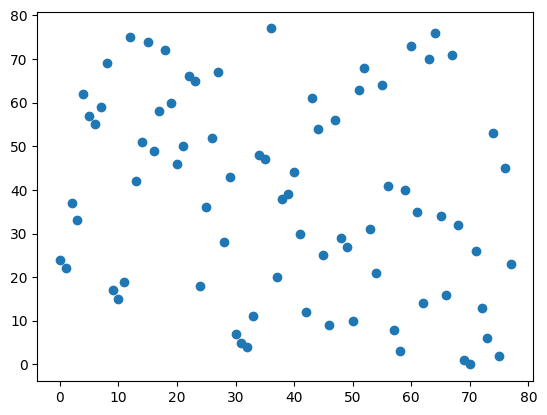

In [19]:
find_index = lambda query, lst: [set(pair[0]) for pair in lst].index(set(query))

y = []

for i in range(len(sorted_queries)):
    query = sorted_queries[i][0]
    weight_index = find_index(query, sorted_weights)
    y.append(weight_index)
    
plt.plot(list(range(len(sorted_queries))), y, 'o')
plt.show()

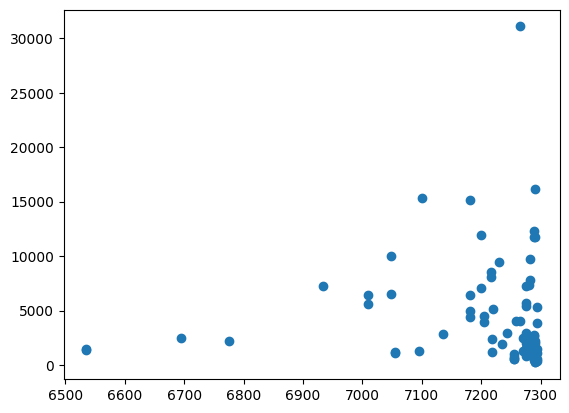

In [20]:
find_index = lambda query, lst: [set(pair[0]) for pair in lst].index(set(query))

x = []
y = []

for i in range(len(sorted_queries)):
    query = sorted_queries[i][0]
    canonical_query_amount = sorted_queries[i][1]
    x.append(canonical_query_amount)
    weight_index = find_index(query, sorted_weights)
    weight = sorted_weights[weight_index][1]
    y.append(weight)

plt.yscale("log")
plt.plot(x, y, 'o')
plt.show()